In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

R = np.random.RandomState(14)

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from scipy import stats
from tensorflow.keras.activations import relu
from sklearn.model_selection import train_test_split

import xgboost
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor
import lightgbm as lgbmm


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
train = pd.read_csv('dataset/TRAIN.csv', index_col = 'Customer ID')
test = pd.read_csv('dataset/TEST.csv', index_col = 'Customer ID')

In [4]:
train.head()

,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
Customer ID,,,,,,,,,,,,,,,,,,,,,,,
C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [5]:
train.shape, test.shape

((30000, 23), (20000, 22))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, C-36995 to C-33003
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         30000 non-null  object 
 1   Gender                       29947 non-null  object 
 2   Age                          30000 non-null  int64  
 3   Income (USD)                 25424 non-null  float64
 4   Income Stability             28317 non-null  object 
 5   Profession                   30000 non-null  object 
 6   Type of Employment           22730 non-null  object 
 7   Location                     30000 non-null  object 
 8   Loan Amount Request (USD)    30000 non-null  float64
 9   Current Loan Expenses (USD)  29828 non-null  float64
 10  Expense Type 1               30000 non-null  object 
 11  Expense Type 2               30000 non-null  object 
 12  Dependents                   27507 non-null  float64
 13  Credit Score 

# EDA:

### Target Variable -

In [7]:
train = train[train['Loan Sanction Amount (USD)'].notna()]

### Name - 

In [8]:
train['Name'].head()

Customer ID
C-36995     Frederica Shealy
C-33999    America Calderone
C-3770         Rosetta Verne
C-26480           Zoe Chitty
C-23459         Afton Venema
Name: Name, dtype: object

### Gender - 

In [9]:
train['Gender'].value_counts()

M    14890
F    14718
Name: Gender, dtype: int64

In [10]:
train['Gender'].isna().value_counts()

False    29608
True        52
Name: Gender, dtype: int64

There are just 53 NaNs so, it will be easy to fill those value by hand.

In [11]:
nan_values_in_gender = train[train['Gender'].isna()]
nan_values_in_gender

,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
Customer ID,,,,,,,,,,,,,,,,,,,,,,,
C-13881,Sherwood Abbott,NaN,19,5002.91,NaN,Commercial associate,Managers,Semi-Urban,263939.86,736.19,N,Y,1.0,NaN,1,Unpossessed,744,5002.91,4,Semi-Urban,1,490050.55,184757.90
C-36542,Stephaine Ferber,NaN,50,1880.45,Low,Working,Drivers,Rural,41182.62,333.09,Y,N,2.0,693.34,1,Active,691,1880.45,4,Rural,1,68239.88,28827.83
C-39265,Aleta Gregoire,NaN,61,2427.46,High,Pensioner,NaN,Semi-Urban,86585.93,400.69,N,Y,1.0,867.82,0,Active,571,2427.46,2,Urban,0,136287.92,69268.74
C-9424,Alva Beauchesne,NaN,18,3188.73,Low,Commercial associate,NaN,Urban,27444.59,136.24,N,N,1.0,797.76,0,Inactive,927,3188.73,4,Rural,1,40899.77,19211.21
C-38459,Silas Deford,NaN,65,2728.97,High,Pensioner,NaN,Semi-Urban,63132.91,420.87,N,Y,2.0,849.88,0,Inactive,963,2728.97,1,Rural,0,101911.82,44193.04
C-28882,Nana Mccleery,NaN,60,2648.28,High,Pensioner,NaN,Semi-Urban,106323.64,311.04,Y,Y,2.0,806.75,0,Unpossessed,632,2648.28,3,Urban,1,181045.39,79742.73
C-7517,Sherie Puente,NaN,34,1233.27,Low,Commercial associate,Core staff,Semi-Urban,144397.54,416.23,N,Y,2.0,846.37,0,Unpossessed,680,1233.27,1,Semi-Urban,1,192306.56,108298.16
C-9812,Vera Clubb,NaN,18,NaN,Low,Working,Sales staff,Semi-Urban,108606.43,460.91,N,Y,2.0,721.82,0,Active,408,NaN,1,Urban,1,134510.54,-999.00
C-11377,Adolfo Kinch,NaN,47,2592.45,Low,State servant,NaN,Semi-Urban,62085.35,497.68,Y,Y,1.0,771.33,0,Active,430,2592.45,4,Rural,1,105541.85,49668.28


In [12]:
boys_name = ['Sherwood Abbott', 'Silas Deford', 'Adolfo Kinch', 'Perry Howey', 'Horacio Dry', 'Gertrud Sathe', 'Willis Satcher',
            'Augustus Veasley', 'Adolfo Rounds', 'Claris Berman', 'Audry Duhart', 'Terrance Kennard', 'Paul Peele']

test_boys_name = ['Erich Solt', 'Mervin Kopec', 'Francis Abdalla', 'Sid Carraway']

train = train.assign(Gender = train['Name'].map(lambda x: 'M' if x in boys_name else 'F'))
test = test.assign(Gender = test['Name'].map(lambda x: 'M' if x in test_boys_name else 'F'))

### Age -

In [13]:
train.Age.max(), train.Age.min()

(65, 18)

In [14]:
# Creating a new column because young people usually don't get much loan

In [15]:
young = []
young_test = []

for x in train['Age']:
    if x < 26:
        young.append('Yes')
    else:
        young.append('No')

for x in test['Age']:
    if x < 26:
        young_test.append('Yes')
    else:
        young_test.append('No')

In [16]:
train['Is_young'] = young
test['Is_young'] = young_test

### Income -

In [17]:
train['Income (USD)'].head()

Customer ID
C-36995    1933.05
C-33999    4952.91
C-3770      988.19
C-26480        NaN
C-23459    2614.77
Name: Income (USD), dtype: float64

In [18]:
train['Income (USD)'].isna().value_counts()

False    25167
True      4493
Name: Income (USD), dtype: int64

In [19]:
# Randonly filling NaN values.

In [20]:
train['Income (USD)'] = train['Income (USD)'].replace(np.nan, -999)
test['Income (USD)'] = test['Income (USD)'].replace(np.nan, -999)

train['Income (USD)'] = train["Income (USD)"].mask(train["Income (USD)"].eq(-999), R.randint(1608, 2630, size=len(train)))
test['Income (USD)'] = test["Income (USD)"].mask(test["Income (USD)"].eq(-999), R.randint(1608, 2630, size=len(test)))

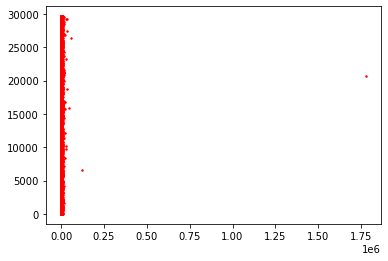

In [21]:
plt.scatter(train['Income (USD)'], np.arange(0, train.shape[0]), color = 'Red', s = 2)

In [22]:
train = train[(np.abs(stats.zscore(train['Income (USD)'])) < 3)]

### Income Stability -

In [23]:
train['Income Stability'] = train['Income Stability'].fillna(False)
test['Income Stability'] = test['Income Stability'].fillna(False)

In [24]:
train['Income Stability'].value_counts()

Low      25454
High      2544
False     1658
Name: Income Stability, dtype: int64

### Profession - 

In [25]:
train['Profession'].value_counts()

Working                 16736
Commercial associate     7862
Pensioner                2718
State servant            2334
Businessman                 2
Unemployed                  2
Maternity leave             1
Student                     1
Name: Profession, dtype: int64

In [26]:
train['Profession'] = train['Profession'].replace(['Unemployed', 'Student', 'Maternity leave'], 'Other')
test['Profession'] = test['Profession'].replace(['Unemployed', 'Student', 'Maternity leave'], 'Other')

### Type of Employment - 

In [27]:
train['Type of Employment'].value_counts()

Laborers                 5515
Sales staff              3698
Core staff               3188
Managers                 2463
Drivers                  1588
Accountants              1363
High skill tech staff    1297
Medicine staff            854
Security staff            574
Cooking staff             561
Cleaning staff            338
Private service staff     337
Secretaries               158
Low-skill Laborers        154
Waiters/barmen staff      148
Realty agents              85
IT staff                   77
HR staff                   71
Name: Type of Employment, dtype: int64

In [28]:
# Let the random state decide which value is best to fill here.

In [29]:
common_emp = ['Laborers', 'Sales staff', 'Core staff', 'Managers', 'Accountants', 'Drivers', 'High skill tech staff']

train['Type of Employment'] = train['Type of Employment'].fillna(R.choice(common_emp))
test['Type of Employment'] = test['Type of Employment'].fillna(R.choice(common_emp))

### Location - 

In [30]:
test['Location'].isna().value_counts()

False    20000
Name: Location, dtype: int64

### Loan Amount Request - 

In [31]:
test['Loan Amount Request (USD)'] = test['Loan Amount Request (USD)'].fillna(30000)

### Current Loan Expenses -

In [32]:
train['Current Loan Expenses (USD)'].isna().value_counts()

False    29489
True       167
Name: Current Loan Expenses (USD), dtype: int64

In [33]:
train['Current Loan Expenses (USD)'] = train['Current Loan Expenses (USD)'].replace(np.nan, -999)
test['Current Loan Expenses (USD)'] = test['Current Loan Expenses (USD)'].replace(np.nan, -999)

train['Current Loan Expenses (USD)'] = train["Current Loan Expenses (USD)"].mask(train["Current Loan Expenses (USD)"].eq(-999), R.randint(200, 500, size=len(train)))
test['Current Loan Expenses (USD)'] = test["Current Loan Expenses (USD)"].mask(test["Current Loan Expenses (USD)"].eq(-999), R.randint(200, 500, size=len(test)))

### Expense 1 and 2 -

In [34]:
both = []
both_test = []

for x, y in zip(train['Expense Type 1'], train['Expense Type 2']):
    if x == y == 'Y':
        both.append('Yes')
        
    else:
        both.append('No')
        
for x, y in zip(test['Expense Type 1'], test['Expense Type 2']):
    if x == y == 'N':
        both_test.append('Yes')
        
    else:
        both_test.append('No')

In [35]:
train['has_both_expenses'] = both
test['has_both_expenses'] = both_test

### Dependents - 

In [36]:
train['Dependents'].isna().value_counts()

False    27211
True      2445
Name: Dependents, dtype: int64

In [37]:
dependent = [1.0, 2.0, 3.0, 4.0]

train['Dependents'] = train['Dependents'].fillna(R.choice(dependent))
test['Dependents'] = test['Dependents'].fillna(R.choice(dependent))

### Credit Score - 

In [38]:
train['Credit Score'].max(), train['Credit Score'].min()

(896.26, 580.0)

In [39]:
train[train['Credit Score'] > 850].shape

(1749, 25)

In [40]:
# Credit Score can't be above 850 (That's the rule)
# and there are 1773 people having score above 850. How ?
# Also, nobody has a poor credit score i.e. below 580.
# Maybe orgaranizers have subtrated 46.2599999 from each of those values.

In [41]:
train['Credit Score'] = train['Credit Score'] - 46.2599999
test['Credit Score'] = test['Credit Score'] - 46.2599999

In [42]:
train['Credit Score'].max(), train['Credit Score'].min()

(850.0000001, 533.7400001)

In [43]:
train['Credit Score'] = train['Credit Score'].replace(np.nan, -999)
test['Credit Score'] = test['Credit Score'].replace(np.nan, -999)

train['Credit Score'] = train["Credit Score"].mask(train["Credit Score"].eq(-999), R.randint(533, 850, size=len(train)))
test['Credit Score'] = test["Credit Score"].mask(test["Credit Score"].eq(-999), R.randint(533, 850, size=len(test)))

In [44]:
score = []
score_test = []

for x in train['Credit Score']:
    if x >= 770:
        score.append('Excellent')
        
    elif 770 > x >= 580:
        score.append('Fair')
    
    elif x < 580:
        score.append('Bad')
        
for x in test['Credit Score']:
    if x >= 770:
        score_test.append('Excellent')
        
    elif 770 > x >= 580:
        score_test.append('Fair')
        
    elif x < 580:
        score_test.append('Bad')

In [45]:
train['credit_score_level'] = score
test['credit_score_level'] = score_test

### No. of Defaults - 

In [46]:
test['No. of Defaults'].value_counts()

0    16210
1     3790
Name: No. of Defaults, dtype: int64

In [47]:
# It looks biased

### Has Active Credit Card -

In [48]:
train['Has Active Credit Card'].value_counts()

Active         9668
Inactive       9358
Unpossessed    9085
Name: Has Active Credit Card, dtype: int64

In [49]:
train['Has Active Credit Card'].isna().value_counts()

False    28111
True      1545
Name: Has Active Credit Card, dtype: int64

In [50]:
list_cc = ['Active', 'Inactive', 'Unpossessed']

train['Has Active Credit Card'] = train['Has Active Credit Card'].fillna(R.choice(list_cc))
test['Has Active Credit Card'] = test['Has Active Credit Card'].fillna(R.choice(list_cc))

### Property Age -

In [51]:
train['Property Age'].isna().value_counts()

False    24896
True      4760
Name: Property Age, dtype: int64

In [52]:
train['Property Age'] = train['Property Age'].replace(np.nan, -999)
test['Property Age'] = test['Property Age'].replace(np.nan, -999)

train['Property Age'] = train["Property Age"].mask(train["Property Age"].eq(-999), R.randint(1000, 3000, size=len(train)))
test['Property Age'] = test["Property Age"].mask(test["Property Age"].eq(-999), R.randint(1000, 3000, size=len(test)))

### Property Location - 

In [53]:
train['Property Location'].value_counts()

Semi-Urban    10253
Rural          9927
Urban          9129
Name: Property Location, dtype: int64

In [54]:
list_pl = ['Semi-Urban', 'Rural', 'Urban']

train['Property Location'] = train['Property Location'].fillna(R.choice(list_pl))
test['Property Location'] = test['Property Location'].fillna(R.choice(list_pl))

### Co-Applicant - 

In [55]:
train['Co-Applicant'].value_counts()

 1      25200
 0       4291
-999      165
Name: Co-Applicant, dtype: int64

In [56]:
train['Co-Applicant'] = train['Co-Applicant'].replace(-999, 0)
test['Co-Applicant'] = test['Co-Applicant'].replace('?', '0')

test['Co-Applicant'] = test['Co-Applicant'].astype('int64')

### Property Price - 

In [57]:
Q1 = int(train['Property Price'].quantile(0.25))
Q3 = int(train['Property Price'].quantile(0.75))

In [58]:
test['Property Price'] = test['Property Price'].replace('?', -999)

train['Property Price'] = train["Property Price"].mask(train["Property Price"].eq(-999), R.randint(Q1, Q3, size=len(train)))
test['Property Price'] = test["Property Price"].mask(test["Property Price"].eq(-999), R.randint(Q1, Q3, size=len(test)))

test['Property Price'] = test['Property Price'].astype('float64')
train['Property Price'] = train['Property Price'].astype('float64')

# Label and One-Hot-Encoding 

In [59]:
del train['Name']
del test['Name']

In [60]:
# Label Encoding -

train[['Profession', 'Type of Employment', 'Location', 'Property Location', 'Has Active Credit Card']] = train[['Profession', 'Type of Employment', 'Location', 'Property Location', 'Has Active Credit Card']].apply(LabelEncoder().fit_transform)
test[['Profession', 'Type of Employment', 'Location', 'Property Location', 'Has Active Credit Card']] = test[['Profession', 'Type of Employment', 'Location', 'Property Location', 'Has Active Credit Card']].apply(LabelEncoder().fit_transform)

In [61]:
# One hot encoding - 

train = pd.get_dummies(train, dtype = 'int64')
test = pd.get_dummies(test, dtype = 'int64')

# Voting Regressor

In [62]:
train_y = train['Loan Sanction Amount (USD)']
train_x = train.loc[:, train.columns != 'Loan Sanction Amount (USD)']

In [62]:
score_r2 = []
pred_list = []
fold = KFold(n_splits = 10, shuffle = True, random_state = 42)

for train_index, test_index in fold.split(train_x):
    X_train, X_test = train_x.iloc[train_index], train_x.iloc[test_index]
    y_train, y_test = train_y[train_index], train_y[test_index]
    
    xgb = XGBRegressor(n_estimators = 106, learning_rate = 0.3, max_depth = 5, n_jobs = -1, random_state = 69)
    lgb = LGBMRegressor(max_depth = 5, n_estimators = 107, random_state = 69)
    cr = CatBoostRegressor(iterations = 1101, reg_lambda = 2, random_state = 69)
    
    model = VotingRegressor(estimators = [('xgb', xgb), ('lgb', lgb), ('cr', cr)], verbose = True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print('R2 Score:', r2_score(y_pred, y_test))
    
    score_r2.append(r2_score(y_pred, y_test))
    predict = model.predict(test)
    pred_list.append(predict)

[Voting] ...................... (1 of 3) Processing xgb, total=   3.7s
[Voting] ...................... (2 of 3) Processing lgb, total=   0.3s
0:	learn: 47339.1627554	total: 156ms	remaining: 2m 51s
1:	learn: 46427.5253648	total: 162ms	remaining: 1m 29s
2:	learn: 45553.8136470	total: 169ms	remaining: 1m 1s
3:	learn: 44685.3219165	total: 184ms	remaining: 50.5s
4:	learn: 43853.1008030	total: 191ms	remaining: 41.8s
5:	learn: 43050.2266651	total: 197ms	remaining: 36s
6:	learn: 42282.0352502	total: 204ms	remaining: 31.8s
7:	learn: 41545.3888127	total: 214ms	remaining: 29.3s
8:	learn: 40840.7546314	total: 244ms	remaining: 29.7s
9:	learn: 40184.1113085	total: 251ms	remaining: 27.4s
10:	learn: 39528.6374101	total: 257ms	remaining: 25.5s
11:	learn: 38892.2849115	total: 274ms	remaining: 24.8s
12:	learn: 38301.0842113	total: 289ms	remaining: 24.2s
13:	learn: 37733.8932303	total: 304ms	remaining: 23.6s
14:	learn: 37181.2265836	total: 310ms	remaining: 22.4s
15:	learn: 36653.8696992	total: 318ms	remai

162:	learn: 23616.0072306	total: 1.69s	remaining: 9.7s
163:	learn: 23609.9751961	total: 1.69s	remaining: 9.67s
164:	learn: 23605.8144758	total: 1.7s	remaining: 9.64s
165:	learn: 23602.3901368	total: 1.72s	remaining: 9.67s
166:	learn: 23595.6904410	total: 1.72s	remaining: 9.63s
167:	learn: 23583.3625509	total: 1.73s	remaining: 9.6s
168:	learn: 23578.2707788	total: 1.73s	remaining: 9.57s
169:	learn: 23571.1437551	total: 1.74s	remaining: 9.53s
170:	learn: 23563.7560321	total: 1.75s	remaining: 9.49s
171:	learn: 23559.6936490	total: 1.76s	remaining: 9.51s
172:	learn: 23554.5876686	total: 1.76s	remaining: 9.47s
173:	learn: 23545.7303743	total: 1.77s	remaining: 9.44s
174:	learn: 23534.9158007	total: 1.78s	remaining: 9.4s
175:	learn: 23526.0898107	total: 1.78s	remaining: 9.37s
176:	learn: 23517.4560059	total: 1.79s	remaining: 9.34s
177:	learn: 23510.4325146	total: 1.79s	remaining: 9.3s
178:	learn: 23504.2582829	total: 1.8s	remaining: 9.3s
179:	learn: 23501.8234420	total: 1.81s	remaining: 9.26s

311:	learn: 22827.1306104	total: 3.02s	remaining: 7.63s
312:	learn: 22824.9587690	total: 3.02s	remaining: 7.62s
313:	learn: 22819.4888235	total: 3.03s	remaining: 7.6s
314:	learn: 22812.7070647	total: 3.04s	remaining: 7.59s
315:	learn: 22808.7382083	total: 3.05s	remaining: 7.58s
316:	learn: 22801.2900759	total: 3.06s	remaining: 7.56s
317:	learn: 22797.6303525	total: 3.06s	remaining: 7.55s
318:	learn: 22792.7001492	total: 3.08s	remaining: 7.55s
319:	learn: 22789.9553513	total: 3.09s	remaining: 7.54s
320:	learn: 22787.2224818	total: 3.11s	remaining: 7.56s
321:	learn: 22781.3861479	total: 3.12s	remaining: 7.54s
322:	learn: 22775.1816853	total: 3.12s	remaining: 7.52s
323:	learn: 22772.6859590	total: 3.14s	remaining: 7.54s
324:	learn: 22768.8584838	total: 3.15s	remaining: 7.52s
325:	learn: 22764.8709449	total: 3.16s	remaining: 7.5s
326:	learn: 22762.1939759	total: 3.18s	remaining: 7.52s
327:	learn: 22756.6162710	total: 3.18s	remaining: 7.5s
328:	learn: 22752.6312027	total: 3.21s	remaining: 7

468:	learn: 22162.0008746	total: 4.54s	remaining: 6.12s
469:	learn: 22159.5140462	total: 4.55s	remaining: 6.1s
470:	learn: 22157.1548913	total: 4.57s	remaining: 6.11s
471:	learn: 22154.1572398	total: 4.57s	remaining: 6.09s
472:	learn: 22150.0838185	total: 4.58s	remaining: 6.08s
473:	learn: 22146.2028384	total: 4.58s	remaining: 6.06s
474:	learn: 22142.2975490	total: 4.59s	remaining: 6.04s
475:	learn: 22139.8242346	total: 4.59s	remaining: 6.03s
476:	learn: 22137.4905276	total: 4.6s	remaining: 6.01s
477:	learn: 22135.4635507	total: 4.6s	remaining: 6s
478:	learn: 22132.4010934	total: 4.61s	remaining: 5.98s
479:	learn: 22127.0744260	total: 4.61s	remaining: 5.97s
480:	learn: 22121.8955003	total: 4.62s	remaining: 5.96s
481:	learn: 22117.1223424	total: 4.63s	remaining: 5.95s
482:	learn: 22113.3685294	total: 4.63s	remaining: 5.93s
483:	learn: 22109.4600833	total: 4.64s	remaining: 5.91s
484:	learn: 22106.3270669	total: 4.64s	remaining: 5.9s
485:	learn: 22101.8766872	total: 4.66s	remaining: 5.89s

622:	learn: 21611.5358231	total: 5.86s	remaining: 4.49s
623:	learn: 21608.1433502	total: 5.87s	remaining: 4.49s
624:	learn: 21603.9182058	total: 5.88s	remaining: 4.47s
625:	learn: 21600.1385508	total: 5.88s	remaining: 4.46s
626:	learn: 21596.4555794	total: 5.89s	remaining: 4.45s
627:	learn: 21592.3213646	total: 5.9s	remaining: 4.45s
628:	learn: 21588.8058367	total: 5.92s	remaining: 4.44s
629:	learn: 21583.9745975	total: 5.92s	remaining: 4.43s
630:	learn: 21581.2312265	total: 5.93s	remaining: 4.42s
631:	learn: 21578.6915622	total: 5.94s	remaining: 4.41s
632:	learn: 21576.7690129	total: 5.94s	remaining: 4.39s
633:	learn: 21573.7016260	total: 5.96s	remaining: 4.39s
634:	learn: 21569.2851037	total: 5.98s	remaining: 4.39s
635:	learn: 21567.5004633	total: 5.98s	remaining: 4.38s
636:	learn: 21564.6451829	total: 5.99s	remaining: 4.36s
637:	learn: 21562.9054959	total: 6.01s	remaining: 4.36s
638:	learn: 21559.3263244	total: 6.02s	remaining: 4.35s
639:	learn: 21554.5826361	total: 6.03s	remaining:

781:	learn: 21113.3762641	total: 7.2s	remaining: 2.94s
782:	learn: 21111.1315919	total: 7.21s	remaining: 2.93s
783:	learn: 21107.6147641	total: 7.23s	remaining: 2.92s
784:	learn: 21105.2419280	total: 7.23s	remaining: 2.91s
785:	learn: 21100.4988930	total: 7.24s	remaining: 2.9s
786:	learn: 21097.6274557	total: 7.25s	remaining: 2.89s
787:	learn: 21096.3428516	total: 7.25s	remaining: 2.88s
788:	learn: 21094.6106252	total: 7.27s	remaining: 2.88s
789:	learn: 21090.5024946	total: 7.28s	remaining: 2.87s
790:	learn: 21088.3910835	total: 7.29s	remaining: 2.85s
791:	learn: 21085.8838668	total: 7.3s	remaining: 2.85s
792:	learn: 21083.3628936	total: 7.31s	remaining: 2.84s
793:	learn: 21081.5560062	total: 7.31s	remaining: 2.83s
794:	learn: 21079.5863559	total: 7.32s	remaining: 2.82s
795:	learn: 21078.0130069	total: 7.33s	remaining: 2.81s
796:	learn: 21076.2395733	total: 7.33s	remaining: 2.8s
797:	learn: 21074.8529729	total: 7.34s	remaining: 2.79s
798:	learn: 21069.8162281	total: 7.34s	remaining: 2.

946:	learn: 20651.2890689	total: 8.31s	remaining: 1.35s
947:	learn: 20648.8103479	total: 8.32s	remaining: 1.34s
948:	learn: 20646.7831592	total: 8.33s	remaining: 1.33s
949:	learn: 20644.0155242	total: 8.34s	remaining: 1.32s
950:	learn: 20643.3589209	total: 8.35s	remaining: 1.32s
951:	learn: 20639.6301782	total: 8.37s	remaining: 1.31s
952:	learn: 20637.6797268	total: 8.38s	remaining: 1.3s
953:	learn: 20636.1908012	total: 8.39s	remaining: 1.29s
954:	learn: 20634.3560968	total: 8.39s	remaining: 1.28s
955:	learn: 20631.6015224	total: 8.41s	remaining: 1.28s
956:	learn: 20627.5994811	total: 8.42s	remaining: 1.27s
957:	learn: 20625.1497030	total: 8.43s	remaining: 1.26s
958:	learn: 20622.5162169	total: 8.45s	remaining: 1.25s
959:	learn: 20620.2824095	total: 8.45s	remaining: 1.24s
960:	learn: 20617.6386653	total: 8.47s	remaining: 1.23s
961:	learn: 20615.2500903	total: 8.48s	remaining: 1.23s
962:	learn: 20611.9110599	total: 8.49s	remaining: 1.22s
963:	learn: 20607.0508908	total: 8.5s	remaining: 

[Voting] ...................... (1 of 3) Processing xgb, total=   1.4s
[Voting] ...................... (2 of 3) Processing lgb, total=   0.1s
0:	learn: 47199.7102151	total: 5.41ms	remaining: 5.95s
1:	learn: 46281.6057561	total: 12.3ms	remaining: 6.78s
2:	learn: 45382.7553273	total: 19.4ms	remaining: 7.09s
3:	learn: 44531.2251511	total: 25.4ms	remaining: 6.96s
4:	learn: 43708.7886643	total: 31.4ms	remaining: 6.88s
5:	learn: 42943.8170563	total: 37.2ms	remaining: 6.8s
6:	learn: 42183.6882544	total: 43ms	remaining: 6.72s
7:	learn: 41452.5328099	total: 48.8ms	remaining: 6.66s
8:	learn: 40743.5314338	total: 54.7ms	remaining: 6.63s
9:	learn: 40094.0199009	total: 60.9ms	remaining: 6.64s
10:	learn: 39465.7658414	total: 66.9ms	remaining: 6.63s
11:	learn: 38847.1941102	total: 72.7ms	remaining: 6.59s
12:	learn: 38238.4662505	total: 78ms	remaining: 6.53s
13:	learn: 37667.7026428	total: 83.6ms	remaining: 6.49s
14:	learn: 37111.8478440	total: 89.3ms	remaining: 6.47s
15:	learn: 36574.8625914	total: 9

167:	learn: 23617.0402201	total: 1.1s	remaining: 6.12s
168:	learn: 23612.4370310	total: 1.11s	remaining: 6.11s
169:	learn: 23606.3241982	total: 1.12s	remaining: 6.11s
170:	learn: 23597.4485424	total: 1.12s	remaining: 6.1s
171:	learn: 23592.2377019	total: 1.13s	remaining: 6.09s
172:	learn: 23586.2846954	total: 1.13s	remaining: 6.07s
173:	learn: 23579.1580306	total: 1.14s	remaining: 6.06s
174:	learn: 23569.7530386	total: 1.15s	remaining: 6.06s
175:	learn: 23561.9233621	total: 1.15s	remaining: 6.05s
176:	learn: 23556.8343327	total: 1.16s	remaining: 6.06s
177:	learn: 23553.3445710	total: 1.17s	remaining: 6.05s
178:	learn: 23550.1341122	total: 1.17s	remaining: 6.04s
179:	learn: 23547.2752315	total: 1.18s	remaining: 6.03s
180:	learn: 23538.4994449	total: 1.18s	remaining: 6.01s
181:	learn: 23535.0373037	total: 1.19s	remaining: 6s
182:	learn: 23529.1625901	total: 1.19s	remaining: 5.99s
183:	learn: 23525.2096266	total: 1.2s	remaining: 5.98s
184:	learn: 23517.7121809	total: 1.2s	remaining: 5.96s

320:	learn: 22869.0884002	total: 2.03s	remaining: 4.93s
321:	learn: 22863.7833101	total: 2.03s	remaining: 4.92s
322:	learn: 22859.9463889	total: 2.04s	remaining: 4.91s
323:	learn: 22855.6178163	total: 2.04s	remaining: 4.9s
324:	learn: 22851.4344482	total: 2.05s	remaining: 4.89s
325:	learn: 22846.8433109	total: 2.06s	remaining: 4.89s
326:	learn: 22844.0234459	total: 2.06s	remaining: 4.88s
327:	learn: 22839.8690545	total: 2.07s	remaining: 4.87s
328:	learn: 22837.2026172	total: 2.07s	remaining: 4.86s
329:	learn: 22833.6022081	total: 2.08s	remaining: 4.85s
330:	learn: 22825.2053365	total: 2.08s	remaining: 4.84s
331:	learn: 22817.8683041	total: 2.09s	remaining: 4.84s
332:	learn: 22815.7906642	total: 2.09s	remaining: 4.83s
333:	learn: 22809.3613406	total: 2.1s	remaining: 4.82s
334:	learn: 22805.9664771	total: 2.1s	remaining: 4.81s
335:	learn: 22799.5797378	total: 2.11s	remaining: 4.8s
336:	learn: 22794.0629517	total: 2.11s	remaining: 4.79s
337:	learn: 22788.1000763	total: 2.12s	remaining: 4.

467:	learn: 22241.5595595	total: 2.94s	remaining: 3.97s
468:	learn: 22239.1961075	total: 2.95s	remaining: 3.98s
469:	learn: 22233.4610685	total: 2.96s	remaining: 3.97s
470:	learn: 22229.2448829	total: 2.96s	remaining: 3.96s
471:	learn: 22224.3131533	total: 2.97s	remaining: 3.95s
472:	learn: 22218.4826726	total: 2.97s	remaining: 3.95s
473:	learn: 22216.4707301	total: 2.98s	remaining: 3.94s
474:	learn: 22213.6160992	total: 2.98s	remaining: 3.93s
475:	learn: 22210.5982920	total: 2.99s	remaining: 3.92s
476:	learn: 22207.6293054	total: 2.99s	remaining: 3.92s
477:	learn: 22203.0726122	total: 3.01s	remaining: 3.92s
478:	learn: 22196.4352122	total: 3.02s	remaining: 3.92s
479:	learn: 22189.1760994	total: 3.02s	remaining: 3.91s
480:	learn: 22184.3175531	total: 3.03s	remaining: 3.9s
481:	learn: 22178.2779909	total: 3.03s	remaining: 3.89s
482:	learn: 22174.5192411	total: 3.04s	remaining: 3.89s
483:	learn: 22170.9925799	total: 3.04s	remaining: 3.88s
484:	learn: 22165.0334638	total: 3.05s	remaining:

638:	learn: 21633.8291339	total: 4.07s	remaining: 2.94s
639:	learn: 21631.2134549	total: 4.08s	remaining: 2.94s
640:	learn: 21627.6371829	total: 4.08s	remaining: 2.93s
641:	learn: 21624.5189899	total: 4.09s	remaining: 2.92s
642:	learn: 21618.0413728	total: 4.1s	remaining: 2.92s
643:	learn: 21614.7605996	total: 4.11s	remaining: 2.92s
644:	learn: 21611.3782119	total: 4.12s	remaining: 2.91s
645:	learn: 21606.9531586	total: 4.12s	remaining: 2.9s
646:	learn: 21603.7125001	total: 4.13s	remaining: 2.9s
647:	learn: 21602.1048506	total: 4.13s	remaining: 2.89s
648:	learn: 21600.4660625	total: 4.14s	remaining: 2.88s
649:	learn: 21597.9463829	total: 4.14s	remaining: 2.88s
650:	learn: 21597.1168928	total: 4.15s	remaining: 2.87s
651:	learn: 21592.8148232	total: 4.17s	remaining: 2.87s
652:	learn: 21590.0825767	total: 4.17s	remaining: 2.86s
653:	learn: 21588.3902833	total: 4.18s	remaining: 2.86s
654:	learn: 21584.5696855	total: 4.19s	remaining: 2.85s
655:	learn: 21580.5088690	total: 4.19s	remaining: 2

801:	learn: 21107.1315546	total: 5.15s	remaining: 1.92s
802:	learn: 21105.8209375	total: 5.16s	remaining: 1.92s
803:	learn: 21102.1936754	total: 5.17s	remaining: 1.91s
804:	learn: 21100.3829071	total: 5.18s	remaining: 1.9s
805:	learn: 21097.7694621	total: 5.19s	remaining: 1.9s
806:	learn: 21095.3430081	total: 5.2s	remaining: 1.89s
807:	learn: 21093.0342476	total: 5.21s	remaining: 1.89s
808:	learn: 21090.2057347	total: 5.22s	remaining: 1.89s
809:	learn: 21088.7337847	total: 5.23s	remaining: 1.88s
810:	learn: 21085.2786793	total: 5.24s	remaining: 1.87s
811:	learn: 21083.0154384	total: 5.24s	remaining: 1.86s
812:	learn: 21081.7280266	total: 5.25s	remaining: 1.86s
813:	learn: 21077.9531169	total: 5.25s	remaining: 1.85s
814:	learn: 21075.0845802	total: 5.26s	remaining: 1.84s
815:	learn: 21073.6827707	total: 5.26s	remaining: 1.84s
816:	learn: 21072.0188977	total: 5.27s	remaining: 1.83s
817:	learn: 21069.1340189	total: 5.27s	remaining: 1.82s
818:	learn: 21067.5911244	total: 5.28s	remaining: 1

951:	learn: 20702.5385564	total: 6.26s	remaining: 980ms
952:	learn: 20699.3726366	total: 6.27s	remaining: 973ms
953:	learn: 20696.4379598	total: 6.27s	remaining: 967ms
954:	learn: 20693.8351444	total: 6.28s	remaining: 960ms
955:	learn: 20691.2630941	total: 6.29s	remaining: 953ms
956:	learn: 20686.6508513	total: 6.29s	remaining: 947ms
957:	learn: 20684.5886552	total: 6.3s	remaining: 940ms
958:	learn: 20681.5082825	total: 6.3s	remaining: 933ms
959:	learn: 20679.8111208	total: 6.31s	remaining: 927ms
960:	learn: 20676.5966730	total: 6.33s	remaining: 922ms
961:	learn: 20673.9001695	total: 6.34s	remaining: 916ms
962:	learn: 20672.0875993	total: 6.34s	remaining: 909ms
963:	learn: 20667.4699171	total: 6.35s	remaining: 902ms
964:	learn: 20666.0400226	total: 6.36s	remaining: 896ms
965:	learn: 20662.7162622	total: 6.36s	remaining: 889ms
966:	learn: 20660.6603682	total: 6.37s	remaining: 882ms
967:	learn: 20657.7280658	total: 6.37s	remaining: 876ms
968:	learn: 20654.1110236	total: 6.38s	remaining: 

1096:	learn: 20312.4298822	total: 7.43s	remaining: 27.1ms
1097:	learn: 20310.4996129	total: 7.44s	remaining: 20.3ms
1098:	learn: 20308.0303611	total: 7.45s	remaining: 13.6ms
1099:	learn: 20306.1128147	total: 7.46s	remaining: 6.78ms
1100:	learn: 20304.2432439	total: 7.46s	remaining: 0us
[Voting] ....................... (3 of 3) Processing cr, total=   7.8s
R2 Score: 0.6900035697510143
[Voting] ...................... (1 of 3) Processing xgb, total=   1.7s
[Voting] ...................... (2 of 3) Processing lgb, total=   0.1s
0:	learn: 47205.2319356	total: 5.22ms	remaining: 5.74s
1:	learn: 46290.9533025	total: 12.4ms	remaining: 6.82s
2:	learn: 45421.2902085	total: 19.3ms	remaining: 7.08s
3:	learn: 44555.9003401	total: 26.9ms	remaining: 7.37s
4:	learn: 43726.0623030	total: 32.8ms	remaining: 7.2s
5:	learn: 42936.0975625	total: 38.3ms	remaining: 7s
6:	learn: 42171.8373391	total: 44.2ms	remaining: 6.9s
7:	learn: 41431.4505575	total: 49.8ms	remaining: 6.8s
8:	learn: 40722.4241476	total: 55.6ms

147:	learn: 23632.7970345	total: 1.48s	remaining: 9.53s
148:	learn: 23625.7602738	total: 1.49s	remaining: 9.5s
149:	learn: 23614.6839629	total: 1.52s	remaining: 9.62s
150:	learn: 23607.7859359	total: 1.52s	remaining: 9.58s
151:	learn: 23602.4404026	total: 1.53s	remaining: 9.54s
152:	learn: 23591.7652565	total: 1.53s	remaining: 9.5s
153:	learn: 23585.1019460	total: 1.54s	remaining: 9.46s
154:	learn: 23577.7775365	total: 1.54s	remaining: 9.43s
155:	learn: 23570.8218828	total: 1.55s	remaining: 9.39s
156:	learn: 23560.4659951	total: 1.55s	remaining: 9.35s
157:	learn: 23553.4009282	total: 1.56s	remaining: 9.31s
158:	learn: 23548.4817590	total: 1.58s	remaining: 9.35s
159:	learn: 23540.6132713	total: 1.58s	remaining: 9.31s
160:	learn: 23536.4104702	total: 1.59s	remaining: 9.28s
161:	learn: 23526.5414485	total: 1.61s	remaining: 9.32s
162:	learn: 23519.8776706	total: 1.62s	remaining: 9.34s
163:	learn: 23516.2226525	total: 1.63s	remaining: 9.3s
164:	learn: 23508.3455993	total: 1.63s	remaining: 9

300:	learn: 22823.8513658	total: 2.81s	remaining: 7.46s
301:	learn: 22820.3031622	total: 2.81s	remaining: 7.44s
302:	learn: 22815.7805429	total: 2.82s	remaining: 7.42s
303:	learn: 22812.4831882	total: 2.82s	remaining: 7.41s
304:	learn: 22807.6632900	total: 2.83s	remaining: 7.39s
305:	learn: 22804.3020022	total: 2.85s	remaining: 7.4s
306:	learn: 22801.4465755	total: 2.85s	remaining: 7.38s
307:	learn: 22795.3960728	total: 2.86s	remaining: 7.37s
308:	learn: 22792.0332413	total: 2.87s	remaining: 7.35s
309:	learn: 22788.7022587	total: 2.88s	remaining: 7.34s
310:	learn: 22784.1442878	total: 2.89s	remaining: 7.35s
311:	learn: 22780.5801823	total: 2.91s	remaining: 7.36s
312:	learn: 22777.5942784	total: 2.92s	remaining: 7.36s
313:	learn: 22774.8454010	total: 2.93s	remaining: 7.34s
314:	learn: 22769.8810871	total: 2.94s	remaining: 7.33s
315:	learn: 22765.8563401	total: 2.94s	remaining: 7.31s
316:	learn: 22762.4483492	total: 2.95s	remaining: 7.29s
317:	learn: 22756.6090431	total: 2.97s	remaining:

451:	learn: 22186.2133273	total: 4.17s	remaining: 5.99s
452:	learn: 22182.3717154	total: 4.18s	remaining: 5.98s
453:	learn: 22178.9231111	total: 4.19s	remaining: 5.97s
454:	learn: 22175.5162230	total: 4.2s	remaining: 5.96s
455:	learn: 22173.2836851	total: 4.2s	remaining: 5.95s
456:	learn: 22168.7617569	total: 4.21s	remaining: 5.93s
457:	learn: 22161.0712014	total: 4.21s	remaining: 5.92s
458:	learn: 22157.4153389	total: 4.22s	remaining: 5.9s
459:	learn: 22153.5288371	total: 4.23s	remaining: 5.89s
460:	learn: 22151.2695343	total: 4.23s	remaining: 5.88s
461:	learn: 22146.9561954	total: 4.25s	remaining: 5.88s
462:	learn: 22143.9959281	total: 4.27s	remaining: 5.88s
463:	learn: 22140.5387837	total: 4.27s	remaining: 5.86s
464:	learn: 22137.0939911	total: 4.28s	remaining: 5.85s
465:	learn: 22134.4887410	total: 4.28s	remaining: 5.83s
466:	learn: 22126.6477733	total: 4.29s	remaining: 5.82s
467:	learn: 22123.9460865	total: 4.29s	remaining: 5.81s
468:	learn: 22120.0245904	total: 4.3s	remaining: 5.

605:	learn: 21622.5661047	total: 5.54s	remaining: 4.52s
606:	learn: 21621.1172375	total: 5.54s	remaining: 4.51s
607:	learn: 21618.7690505	total: 5.55s	remaining: 4.5s
608:	learn: 21614.9532735	total: 5.56s	remaining: 4.49s
609:	learn: 21613.2711449	total: 5.57s	remaining: 4.48s
610:	learn: 21610.8197974	total: 5.59s	remaining: 4.48s
611:	learn: 21606.7066193	total: 5.6s	remaining: 4.47s
612:	learn: 21601.3360877	total: 5.61s	remaining: 4.46s
613:	learn: 21597.6618015	total: 5.62s	remaining: 4.46s
614:	learn: 21592.8497176	total: 5.62s	remaining: 4.44s
615:	learn: 21590.3995042	total: 5.63s	remaining: 4.43s
616:	learn: 21585.8612037	total: 5.64s	remaining: 4.42s
617:	learn: 21582.8227401	total: 5.65s	remaining: 4.42s
618:	learn: 21581.0036594	total: 5.66s	remaining: 4.4s
619:	learn: 21579.5533419	total: 5.68s	remaining: 4.41s
620:	learn: 21577.8252086	total: 5.69s	remaining: 4.4s
621:	learn: 21574.5522426	total: 5.69s	remaining: 4.38s
622:	learn: 21573.1944427	total: 5.71s	remaining: 4.

762:	learn: 21144.3704802	total: 7.29s	remaining: 3.23s
763:	learn: 21140.9045992	total: 7.3s	remaining: 3.22s
764:	learn: 21136.9163076	total: 7.31s	remaining: 3.21s
765:	learn: 21135.6186992	total: 7.33s	remaining: 3.2s
766:	learn: 21132.8824687	total: 7.33s	remaining: 3.19s
767:	learn: 21129.9048217	total: 7.34s	remaining: 3.18s
768:	learn: 21128.1975170	total: 7.35s	remaining: 3.17s
769:	learn: 21123.3148931	total: 7.35s	remaining: 3.16s
770:	learn: 21118.4708425	total: 7.36s	remaining: 3.15s
771:	learn: 21116.4688416	total: 7.36s	remaining: 3.14s
772:	learn: 21113.6991361	total: 7.37s	remaining: 3.13s
773:	learn: 21110.6831408	total: 7.37s	remaining: 3.12s
774:	learn: 21108.7226942	total: 7.38s	remaining: 3.11s
775:	learn: 21107.2632124	total: 7.39s	remaining: 3.1s
776:	learn: 21103.5210200	total: 7.4s	remaining: 3.08s
777:	learn: 21100.3800648	total: 7.4s	remaining: 3.07s
778:	learn: 21097.5250144	total: 7.41s	remaining: 3.06s
779:	learn: 21096.0118184	total: 7.41s	remaining: 3.0

918:	learn: 20708.3408200	total: 8.62s	remaining: 1.71s
919:	learn: 20706.6668535	total: 8.62s	remaining: 1.7s
920:	learn: 20704.7744215	total: 8.63s	remaining: 1.69s
921:	learn: 20703.1880132	total: 8.64s	remaining: 1.68s
922:	learn: 20699.9597109	total: 8.64s	remaining: 1.67s
923:	learn: 20696.7932505	total: 8.65s	remaining: 1.66s
924:	learn: 20692.6750727	total: 8.66s	remaining: 1.65s
925:	learn: 20690.9285358	total: 8.66s	remaining: 1.64s
926:	learn: 20689.1749273	total: 8.67s	remaining: 1.63s
927:	learn: 20686.2730524	total: 8.7s	remaining: 1.62s
928:	learn: 20683.3416127	total: 8.71s	remaining: 1.61s
929:	learn: 20681.9064669	total: 8.73s	remaining: 1.6s
930:	learn: 20679.3819214	total: 8.74s	remaining: 1.6s
931:	learn: 20674.9614860	total: 8.75s	remaining: 1.59s
932:	learn: 20673.0971691	total: 8.75s	remaining: 1.58s
933:	learn: 20670.7497037	total: 8.76s	remaining: 1.57s
934:	learn: 20666.8270562	total: 8.77s	remaining: 1.56s
935:	learn: 20664.6981553	total: 8.77s	remaining: 1.

1069:	learn: 20341.5442283	total: 9.93s	remaining: 288ms
1070:	learn: 20340.3284934	total: 9.93s	remaining: 278ms
1071:	learn: 20337.8814725	total: 9.94s	remaining: 269ms
1072:	learn: 20335.8785114	total: 9.95s	remaining: 260ms
1073:	learn: 20333.3357953	total: 9.95s	remaining: 250ms
1074:	learn: 20330.9007762	total: 9.96s	remaining: 241ms
1075:	learn: 20327.7598636	total: 9.96s	remaining: 231ms
1076:	learn: 20326.2744961	total: 9.97s	remaining: 222ms
1077:	learn: 20324.7579992	total: 9.98s	remaining: 213ms
1078:	learn: 20323.8491455	total: 9.99s	remaining: 204ms
1079:	learn: 20319.2769375	total: 10s	remaining: 194ms
1080:	learn: 20318.2382411	total: 10s	remaining: 185ms
1081:	learn: 20315.8508922	total: 10s	remaining: 176ms
1082:	learn: 20312.6142903	total: 10s	remaining: 167ms
1083:	learn: 20310.4436426	total: 10s	remaining: 157ms
1084:	learn: 20308.1725823	total: 10s	remaining: 148ms
1085:	learn: 20305.1130307	total: 10.1s	remaining: 139ms
1086:	learn: 20303.0647841	total: 10.1s	rem

130:	learn: 24039.8201840	total: 941ms	remaining: 6.97s
131:	learn: 24031.8998327	total: 949ms	remaining: 6.96s
132:	learn: 24022.8200415	total: 956ms	remaining: 6.96s
133:	learn: 24008.5593386	total: 963ms	remaining: 6.95s
134:	learn: 24000.5128600	total: 979ms	remaining: 7s
135:	learn: 23988.1453885	total: 987ms	remaining: 7s
136:	learn: 23974.7815516	total: 1.01s	remaining: 7.1s
137:	learn: 23966.2371192	total: 1.01s	remaining: 7.08s
138:	learn: 23952.7021769	total: 1.02s	remaining: 7.07s
139:	learn: 23941.5089561	total: 1.03s	remaining: 7.05s
140:	learn: 23933.9105267	total: 1.03s	remaining: 7.03s
141:	learn: 23920.4873870	total: 1.04s	remaining: 7.01s
142:	learn: 23914.5373521	total: 1.04s	remaining: 6.99s
143:	learn: 23901.5040496	total: 1.05s	remaining: 7.02s
144:	learn: 23894.8734630	total: 1.06s	remaining: 7.01s
145:	learn: 23882.4966469	total: 1.07s	remaining: 7s
146:	learn: 23876.1207638	total: 1.08s	remaining: 7.04s
147:	learn: 23866.8886184	total: 1.09s	remaining: 7.03s
14

290:	learn: 23091.1010899	total: 2.44s	remaining: 6.8s
291:	learn: 23086.7266771	total: 2.45s	remaining: 6.79s
292:	learn: 23083.0647847	total: 2.46s	remaining: 6.78s
293:	learn: 23079.7234607	total: 2.46s	remaining: 6.76s
294:	learn: 23075.1800932	total: 2.47s	remaining: 6.76s
295:	learn: 23067.3934309	total: 2.48s	remaining: 6.75s
296:	learn: 23063.4107552	total: 2.49s	remaining: 6.73s
297:	learn: 23058.1474564	total: 2.51s	remaining: 6.75s
298:	learn: 23054.2049822	total: 2.51s	remaining: 6.74s
299:	learn: 23050.9317096	total: 2.52s	remaining: 6.73s
300:	learn: 23049.4432857	total: 2.52s	remaining: 6.71s
301:	learn: 23046.6109029	total: 2.53s	remaining: 6.7s
302:	learn: 23041.8677235	total: 2.54s	remaining: 6.68s
303:	learn: 23040.2574105	total: 2.55s	remaining: 6.69s
304:	learn: 23032.6186432	total: 2.56s	remaining: 6.67s
305:	learn: 23028.3994601	total: 2.56s	remaining: 6.66s
306:	learn: 23026.2221722	total: 2.57s	remaining: 6.64s
307:	learn: 23018.6226362	total: 2.57s	remaining: 

459:	learn: 22377.8918508	total: 3.81s	remaining: 5.31s
460:	learn: 22375.2433295	total: 3.81s	remaining: 5.3s
461:	learn: 22371.0066994	total: 3.82s	remaining: 5.29s
462:	learn: 22367.5100395	total: 3.83s	remaining: 5.27s
463:	learn: 22362.4435233	total: 3.83s	remaining: 5.26s
464:	learn: 22360.0642271	total: 3.84s	remaining: 5.25s
465:	learn: 22357.4872966	total: 3.85s	remaining: 5.25s
466:	learn: 22355.2931154	total: 3.85s	remaining: 5.23s
467:	learn: 22348.8836338	total: 3.86s	remaining: 5.22s
468:	learn: 22345.9486626	total: 3.87s	remaining: 5.21s
469:	learn: 22341.1346141	total: 3.88s	remaining: 5.21s
470:	learn: 22336.5087119	total: 3.9s	remaining: 5.21s
471:	learn: 22334.3141720	total: 3.9s	remaining: 5.2s
472:	learn: 22331.5691064	total: 3.91s	remaining: 5.19s
473:	learn: 22329.4132160	total: 3.91s	remaining: 5.17s
474:	learn: 22325.8663877	total: 3.92s	remaining: 5.16s
475:	learn: 22322.0081141	total: 3.92s	remaining: 5.15s
476:	learn: 22319.2640322	total: 3.93s	remaining: 5.

615:	learn: 21849.5216081	total: 5.1s	remaining: 4.01s
616:	learn: 21847.3003612	total: 5.1s	remaining: 4s
617:	learn: 21846.1008788	total: 5.11s	remaining: 3.99s
618:	learn: 21842.9950364	total: 5.12s	remaining: 3.98s
619:	learn: 21840.5378099	total: 5.12s	remaining: 3.98s
620:	learn: 21837.1611745	total: 5.13s	remaining: 3.96s
621:	learn: 21834.8285017	total: 5.13s	remaining: 3.95s
622:	learn: 21832.9139630	total: 5.15s	remaining: 3.95s
623:	learn: 21827.9787195	total: 5.15s	remaining: 3.94s
624:	learn: 21825.0191415	total: 5.16s	remaining: 3.93s
625:	learn: 21819.1865157	total: 5.16s	remaining: 3.92s
626:	learn: 21815.6518703	total: 5.17s	remaining: 3.91s
627:	learn: 21812.1819512	total: 5.18s	remaining: 3.9s
628:	learn: 21809.3242113	total: 5.18s	remaining: 3.89s
629:	learn: 21806.8588801	total: 5.19s	remaining: 3.88s
630:	learn: 21804.3571294	total: 5.19s	remaining: 3.87s
631:	learn: 21800.7403255	total: 5.2s	remaining: 3.86s
632:	learn: 21797.9380092	total: 5.2s	remaining: 3.85s


776:	learn: 21338.7185682	total: 6.24s	remaining: 2.6s
777:	learn: 21336.0114098	total: 6.24s	remaining: 2.59s
778:	learn: 21331.9393498	total: 6.25s	remaining: 2.58s
779:	learn: 21330.2646439	total: 6.26s	remaining: 2.57s
780:	learn: 21326.8553800	total: 6.26s	remaining: 2.56s
781:	learn: 21323.7479629	total: 6.27s	remaining: 2.56s
782:	learn: 21319.3759616	total: 6.28s	remaining: 2.55s
783:	learn: 21316.8004029	total: 6.28s	remaining: 2.54s
784:	learn: 21313.9433543	total: 6.3s	remaining: 2.54s
785:	learn: 21309.3523999	total: 6.31s	remaining: 2.53s
786:	learn: 21305.1356528	total: 6.31s	remaining: 2.52s
787:	learn: 21300.7635951	total: 6.32s	remaining: 2.51s
788:	learn: 21298.0411389	total: 6.32s	remaining: 2.5s
789:	learn: 21294.6686883	total: 6.33s	remaining: 2.49s
790:	learn: 21291.8056706	total: 6.33s	remaining: 2.48s
791:	learn: 21286.6655605	total: 6.34s	remaining: 2.47s
792:	learn: 21283.9349386	total: 6.34s	remaining: 2.46s
793:	learn: 21280.6940176	total: 6.35s	remaining: 2

931:	learn: 20906.9804451	total: 7.35s	remaining: 1.33s
932:	learn: 20903.7307805	total: 7.36s	remaining: 1.32s
933:	learn: 20897.2890199	total: 7.37s	remaining: 1.32s
934:	learn: 20895.9618297	total: 7.37s	remaining: 1.31s
935:	learn: 20895.2683327	total: 7.38s	remaining: 1.3s
936:	learn: 20891.0298100	total: 7.38s	remaining: 1.29s
937:	learn: 20888.3927754	total: 7.39s	remaining: 1.28s
938:	learn: 20887.0212813	total: 7.39s	remaining: 1.27s
939:	learn: 20883.9154289	total: 7.4s	remaining: 1.27s
940:	learn: 20880.1816781	total: 7.41s	remaining: 1.26s
941:	learn: 20876.3111448	total: 7.41s	remaining: 1.25s
942:	learn: 20871.7511341	total: 7.42s	remaining: 1.24s
943:	learn: 20870.3134343	total: 7.42s	remaining: 1.23s
944:	learn: 20866.7803508	total: 7.43s	remaining: 1.23s
945:	learn: 20863.8807546	total: 7.43s	remaining: 1.22s
946:	learn: 20861.0723794	total: 7.44s	remaining: 1.21s
947:	learn: 20856.9516240	total: 7.44s	remaining: 1.2s
948:	learn: 20855.7366357	total: 7.45s	remaining: 1

1100:	learn: 20472.9013709	total: 8.44s	remaining: 0us
[Voting] ....................... (3 of 3) Processing cr, total=   8.8s
R2 Score: 0.71692366304338
[Voting] ...................... (1 of 3) Processing xgb, total=   1.4s
[Voting] ...................... (2 of 3) Processing lgb, total=   0.1s
0:	learn: 47504.7517044	total: 5.25ms	remaining: 5.78s
1:	learn: 46590.1731681	total: 12ms	remaining: 6.61s
2:	learn: 45705.8133248	total: 19ms	remaining: 6.95s
3:	learn: 44836.6417741	total: 24.9ms	remaining: 6.82s
4:	learn: 43999.1403602	total: 30.9ms	remaining: 6.78s
5:	learn: 43206.4548956	total: 36.5ms	remaining: 6.66s
6:	learn: 42429.8969250	total: 42.4ms	remaining: 6.62s
7:	learn: 41685.8996579	total: 48ms	remaining: 6.56s
8:	learn: 40972.7304826	total: 53.8ms	remaining: 6.52s
9:	learn: 40319.1834926	total: 60ms	remaining: 6.55s
10:	learn: 39658.2576525	total: 65.8ms	remaining: 6.52s
11:	learn: 39018.5479891	total: 75.2ms	remaining: 6.82s
12:	learn: 38416.1283551	total: 80.5ms	remaining: 6

144:	learn: 23681.8418384	total: 929ms	remaining: 6.13s
145:	learn: 23669.8565818	total: 935ms	remaining: 6.12s
146:	learn: 23663.6514696	total: 953ms	remaining: 6.18s
147:	learn: 23653.0243167	total: 958ms	remaining: 6.17s
148:	learn: 23644.8058064	total: 964ms	remaining: 6.16s
149:	learn: 23635.1138096	total: 969ms	remaining: 6.14s
150:	learn: 23628.5599548	total: 975ms	remaining: 6.13s
151:	learn: 23623.4712253	total: 980ms	remaining: 6.12s
152:	learn: 23618.6772253	total: 986ms	remaining: 6.11s
153:	learn: 23611.0305915	total: 996ms	remaining: 6.13s
154:	learn: 23604.4127281	total: 1s	remaining: 6.11s
155:	learn: 23598.1877835	total: 1.01s	remaining: 6.1s
156:	learn: 23588.1983897	total: 1.01s	remaining: 6.09s
157:	learn: 23580.4893224	total: 1.02s	remaining: 6.07s
158:	learn: 23571.4657944	total: 1.02s	remaining: 6.06s
159:	learn: 23564.7073294	total: 1.03s	remaining: 6.05s
160:	learn: 23561.0230432	total: 1.03s	remaining: 6.04s
161:	learn: 23556.0683629	total: 1.04s	remaining: 6.

309:	learn: 22812.3576637	total: 2.03s	remaining: 5.18s
310:	learn: 22809.9962471	total: 2.04s	remaining: 5.17s
311:	learn: 22802.8309414	total: 2.04s	remaining: 5.17s
312:	learn: 22799.4031718	total: 2.05s	remaining: 5.16s
313:	learn: 22795.3860627	total: 2.05s	remaining: 5.15s
314:	learn: 22790.2827736	total: 2.06s	remaining: 5.14s
315:	learn: 22785.4530706	total: 2.06s	remaining: 5.13s
316:	learn: 22782.7197996	total: 2.07s	remaining: 5.12s
317:	learn: 22778.2178904	total: 2.08s	remaining: 5.12s
318:	learn: 22772.2922585	total: 2.08s	remaining: 5.11s
319:	learn: 22770.4504378	total: 2.09s	remaining: 5.1s
320:	learn: 22767.3462402	total: 2.09s	remaining: 5.09s
321:	learn: 22763.0674688	total: 2.1s	remaining: 5.08s
322:	learn: 22759.4785199	total: 2.1s	remaining: 5.07s
323:	learn: 22755.7823925	total: 2.11s	remaining: 5.06s
324:	learn: 22750.6654422	total: 2.12s	remaining: 5.05s
325:	learn: 22748.7466037	total: 2.12s	remaining: 5.04s
326:	learn: 22746.3246426	total: 2.13s	remaining: 5

456:	learn: 22188.4456293	total: 2.95s	remaining: 4.16s
457:	learn: 22186.1244004	total: 2.96s	remaining: 4.15s
458:	learn: 22182.8833634	total: 2.96s	remaining: 4.14s
459:	learn: 22177.3395698	total: 2.98s	remaining: 4.15s
460:	learn: 22174.7785883	total: 2.99s	remaining: 4.16s
461:	learn: 22171.9869305	total: 3s	remaining: 4.15s
462:	learn: 22168.0154738	total: 3s	remaining: 4.14s
463:	learn: 22165.0578815	total: 3.02s	remaining: 4.15s
464:	learn: 22159.7774312	total: 3.03s	remaining: 4.14s
465:	learn: 22157.1787037	total: 3.04s	remaining: 4.14s
466:	learn: 22154.5021296	total: 3.04s	remaining: 4.13s
467:	learn: 22151.7820140	total: 3.05s	remaining: 4.12s
468:	learn: 22149.0125898	total: 3.05s	remaining: 4.12s
469:	learn: 22146.1569692	total: 3.06s	remaining: 4.11s
470:	learn: 22143.2570316	total: 3.06s	remaining: 4.1s
471:	learn: 22139.3115033	total: 3.07s	remaining: 4.09s
472:	learn: 22136.7742120	total: 3.08s	remaining: 4.08s
473:	learn: 22132.4244481	total: 3.08s	remaining: 4.08s

619:	learn: 21585.3768910	total: 4.07s	remaining: 3.15s
620:	learn: 21583.2099772	total: 4.07s	remaining: 3.15s
621:	learn: 21579.1804685	total: 4.08s	remaining: 3.14s
622:	learn: 21575.4311130	total: 4.09s	remaining: 3.13s
623:	learn: 21573.2921446	total: 4.11s	remaining: 3.14s
624:	learn: 21568.4711840	total: 4.11s	remaining: 3.13s
625:	learn: 21565.2701022	total: 4.12s	remaining: 3.12s
626:	learn: 21563.9232849	total: 4.12s	remaining: 3.12s
627:	learn: 21561.6338172	total: 4.13s	remaining: 3.11s
628:	learn: 21558.3854155	total: 4.13s	remaining: 3.1s
629:	learn: 21557.0015895	total: 4.14s	remaining: 3.09s
630:	learn: 21551.6232317	total: 4.14s	remaining: 3.09s
631:	learn: 21549.5076929	total: 4.15s	remaining: 3.08s
632:	learn: 21545.2759922	total: 4.15s	remaining: 3.07s
633:	learn: 21541.1981690	total: 4.16s	remaining: 3.06s
634:	learn: 21535.3060127	total: 4.17s	remaining: 3.06s
635:	learn: 21531.6026798	total: 4.17s	remaining: 3.05s
636:	learn: 21527.0926540	total: 4.17s	remaining:

785:	learn: 21082.1592688	total: 5.14s	remaining: 2.06s
786:	learn: 21079.2104742	total: 5.15s	remaining: 2.05s
787:	learn: 21076.8588832	total: 5.15s	remaining: 2.05s
788:	learn: 21075.1594202	total: 5.16s	remaining: 2.04s
789:	learn: 21073.1627219	total: 5.16s	remaining: 2.03s
790:	learn: 21069.7995669	total: 5.17s	remaining: 2.02s
791:	learn: 21066.8986796	total: 5.17s	remaining: 2.02s
792:	learn: 21062.8671404	total: 5.18s	remaining: 2.01s
793:	learn: 21059.8754121	total: 5.18s	remaining: 2s
794:	learn: 21055.7180684	total: 5.19s	remaining: 2s
795:	learn: 21051.9620798	total: 5.2s	remaining: 1.99s
796:	learn: 21047.5058660	total: 5.2s	remaining: 1.98s
797:	learn: 21046.5462391	total: 5.21s	remaining: 1.98s
798:	learn: 21044.1094097	total: 5.21s	remaining: 1.97s
799:	learn: 21042.4248450	total: 5.22s	remaining: 1.96s
800:	learn: 21039.2430297	total: 5.22s	remaining: 1.96s
801:	learn: 21038.1909964	total: 5.23s	remaining: 1.95s
802:	learn: 21034.9961520	total: 5.24s	remaining: 1.94s


958:	learn: 20617.9096640	total: 6.24s	remaining: 924ms
959:	learn: 20615.6228890	total: 6.25s	remaining: 917ms
960:	learn: 20614.2270014	total: 6.25s	remaining: 911ms
961:	learn: 20611.2382418	total: 6.26s	remaining: 904ms
962:	learn: 20609.4735642	total: 6.26s	remaining: 898ms
963:	learn: 20608.0364300	total: 6.27s	remaining: 891ms
964:	learn: 20605.7165803	total: 6.28s	remaining: 885ms
965:	learn: 20603.4047014	total: 6.28s	remaining: 878ms
966:	learn: 20602.7710840	total: 6.29s	remaining: 871ms
967:	learn: 20598.6638883	total: 6.29s	remaining: 865ms
968:	learn: 20595.8790398	total: 6.3s	remaining: 858ms
969:	learn: 20592.0915592	total: 6.3s	remaining: 851ms
970:	learn: 20589.5455273	total: 6.31s	remaining: 845ms
971:	learn: 20586.2291899	total: 6.31s	remaining: 838ms
972:	learn: 20581.8062240	total: 6.35s	remaining: 835ms
973:	learn: 20576.5970016	total: 6.35s	remaining: 828ms
974:	learn: 20573.5086996	total: 6.36s	remaining: 822ms
975:	learn: 20569.1712951	total: 6.36s	remaining: 

[Voting] ...................... (1 of 3) Processing xgb, total=   1.6s
[Voting] ...................... (2 of 3) Processing lgb, total=   0.2s
0:	learn: 47284.4260134	total: 5.78ms	remaining: 6.36s
1:	learn: 46364.5642977	total: 12.3ms	remaining: 6.77s
2:	learn: 45456.8561451	total: 19.2ms	remaining: 7.04s
3:	learn: 44602.0500843	total: 25.3ms	remaining: 6.93s
4:	learn: 43774.2204291	total: 31ms	remaining: 6.79s
5:	learn: 42986.4579757	total: 36.7ms	remaining: 6.7s
6:	learn: 42218.8093373	total: 42.4ms	remaining: 6.63s
7:	learn: 41480.8576267	total: 48.1ms	remaining: 6.57s
8:	learn: 40765.9137860	total: 53.7ms	remaining: 6.52s
9:	learn: 40102.6127390	total: 59.5ms	remaining: 6.49s
10:	learn: 39447.8634726	total: 68.4ms	remaining: 6.77s
11:	learn: 38813.9117897	total: 74.1ms	remaining: 6.72s
12:	learn: 38219.9304497	total: 79.6ms	remaining: 6.66s
13:	learn: 37645.6023720	total: 85ms	remaining: 6.6s
14:	learn: 37082.4768822	total: 90.8ms	remaining: 6.58s
15:	learn: 36537.0381659	total: 96

165:	learn: 23436.2257276	total: 1.36s	remaining: 7.69s
166:	learn: 23433.4808451	total: 1.37s	remaining: 7.67s
167:	learn: 23421.6557824	total: 1.38s	remaining: 7.65s
168:	learn: 23416.8707881	total: 1.39s	remaining: 7.66s
169:	learn: 23410.3040552	total: 1.39s	remaining: 7.64s
170:	learn: 23406.5554738	total: 1.4s	remaining: 7.61s
171:	learn: 23401.0119772	total: 1.41s	remaining: 7.59s
172:	learn: 23390.9266917	total: 1.41s	remaining: 7.57s
173:	learn: 23381.5459366	total: 1.43s	remaining: 7.64s
174:	learn: 23371.1175234	total: 1.44s	remaining: 7.62s
175:	learn: 23363.5127935	total: 1.44s	remaining: 7.59s
176:	learn: 23352.6420759	total: 1.45s	remaining: 7.57s
177:	learn: 23349.4950237	total: 1.46s	remaining: 7.55s
178:	learn: 23345.4081494	total: 1.46s	remaining: 7.53s
179:	learn: 23339.6252963	total: 1.47s	remaining: 7.5s
180:	learn: 23331.0456156	total: 1.47s	remaining: 7.48s
181:	learn: 23327.7288343	total: 1.48s	remaining: 7.46s
182:	learn: 23321.6253388	total: 1.48s	remaining: 

331:	learn: 22641.9044805	total: 2.46s	remaining: 5.7s
332:	learn: 22637.7097349	total: 2.47s	remaining: 5.69s
333:	learn: 22635.4579348	total: 2.47s	remaining: 5.68s
334:	learn: 22631.6273691	total: 2.48s	remaining: 5.67s
335:	learn: 22627.0944087	total: 2.48s	remaining: 5.66s
336:	learn: 22623.2066344	total: 2.49s	remaining: 5.64s
337:	learn: 22618.5645908	total: 2.5s	remaining: 5.63s
338:	learn: 22613.3704074	total: 2.5s	remaining: 5.62s
339:	learn: 22609.1619855	total: 2.51s	remaining: 5.61s
340:	learn: 22602.7689707	total: 2.51s	remaining: 5.6s
341:	learn: 22598.1069837	total: 2.52s	remaining: 5.58s
342:	learn: 22594.1837852	total: 2.52s	remaining: 5.57s
343:	learn: 22589.1103927	total: 2.53s	remaining: 5.56s
344:	learn: 22585.9077203	total: 2.53s	remaining: 5.55s
345:	learn: 22583.1434492	total: 2.54s	remaining: 5.54s
346:	learn: 22579.6667586	total: 2.54s	remaining: 5.53s
347:	learn: 22578.0046639	total: 2.56s	remaining: 5.53s
348:	learn: 22572.7777426	total: 2.56s	remaining: 5.

505:	learn: 21912.4692106	total: 3.56s	remaining: 4.19s
506:	learn: 21910.0379099	total: 3.57s	remaining: 4.18s
507:	learn: 21907.3174979	total: 3.58s	remaining: 4.17s
508:	learn: 21902.2344097	total: 3.58s	remaining: 4.17s
509:	learn: 21898.0797506	total: 3.59s	remaining: 4.16s
510:	learn: 21894.6922784	total: 3.59s	remaining: 4.15s
511:	learn: 21891.4965659	total: 3.6s	remaining: 4.14s
512:	learn: 21886.9372459	total: 3.6s	remaining: 4.13s
513:	learn: 21881.2243987	total: 3.61s	remaining: 4.12s
514:	learn: 21876.3836679	total: 3.63s	remaining: 4.13s
515:	learn: 21874.1309684	total: 3.63s	remaining: 4.12s
516:	learn: 21870.5264676	total: 3.64s	remaining: 4.11s
517:	learn: 21865.2956111	total: 3.64s	remaining: 4.1s
518:	learn: 21863.0126006	total: 3.65s	remaining: 4.09s
519:	learn: 21860.6932332	total: 3.65s	remaining: 4.08s
520:	learn: 21857.2372654	total: 3.66s	remaining: 4.07s
521:	learn: 21854.6529498	total: 3.67s	remaining: 4.07s
522:	learn: 21852.8994779	total: 3.67s	remaining: 4

676:	learn: 21373.5535715	total: 4.67s	remaining: 2.92s
677:	learn: 21370.8280944	total: 4.68s	remaining: 2.92s
678:	learn: 21369.6210872	total: 4.68s	remaining: 2.91s
679:	learn: 21367.8504038	total: 4.69s	remaining: 2.9s
680:	learn: 21364.4344307	total: 4.7s	remaining: 2.9s
681:	learn: 21359.5836574	total: 4.7s	remaining: 2.89s
682:	learn: 21358.0335808	total: 4.71s	remaining: 2.88s
683:	learn: 21353.5390040	total: 4.71s	remaining: 2.87s
684:	learn: 21352.1562057	total: 4.72s	remaining: 2.86s
685:	learn: 21349.1905516	total: 4.72s	remaining: 2.86s
686:	learn: 21345.7909421	total: 4.73s	remaining: 2.85s
687:	learn: 21343.0609468	total: 4.73s	remaining: 2.84s
688:	learn: 21338.5671202	total: 4.74s	remaining: 2.83s
689:	learn: 21335.8071591	total: 4.75s	remaining: 2.83s
690:	learn: 21331.4484988	total: 4.75s	remaining: 2.82s
691:	learn: 21327.3268709	total: 4.76s	remaining: 2.81s
692:	learn: 21322.2123349	total: 4.76s	remaining: 2.81s
693:	learn: 21318.5919417	total: 4.77s	remaining: 2.

824:	learn: 20906.0849253	total: 5.6s	remaining: 1.87s
825:	learn: 20903.3616108	total: 5.6s	remaining: 1.86s
826:	learn: 20902.0385100	total: 5.62s	remaining: 1.86s
827:	learn: 20900.2383311	total: 5.63s	remaining: 1.85s
828:	learn: 20895.6951068	total: 5.63s	remaining: 1.85s
829:	learn: 20891.8637972	total: 5.64s	remaining: 1.84s
830:	learn: 20888.0146916	total: 5.64s	remaining: 1.83s
831:	learn: 20884.6339847	total: 5.65s	remaining: 1.83s
832:	learn: 20880.9482135	total: 5.66s	remaining: 1.82s
833:	learn: 20878.6982795	total: 5.66s	remaining: 1.81s
834:	learn: 20876.6881563	total: 5.67s	remaining: 1.8s
835:	learn: 20875.5088586	total: 5.67s	remaining: 1.8s
836:	learn: 20872.5889529	total: 5.68s	remaining: 1.79s
837:	learn: 20869.2856623	total: 5.68s	remaining: 1.78s
838:	learn: 20866.6616310	total: 5.69s	remaining: 1.78s
839:	learn: 20862.6729159	total: 5.7s	remaining: 1.77s
840:	learn: 20857.7046183	total: 5.7s	remaining: 1.76s
841:	learn: 20855.4644571	total: 5.71s	remaining: 1.75

994:	learn: 20426.9425892	total: 6.7s	remaining: 714ms
995:	learn: 20424.3299291	total: 6.71s	remaining: 707ms
996:	learn: 20422.6937022	total: 6.71s	remaining: 700ms
997:	learn: 20420.1599458	total: 6.72s	remaining: 694ms
998:	learn: 20418.0880854	total: 6.72s	remaining: 687ms
999:	learn: 20414.7421622	total: 6.73s	remaining: 680ms
1000:	learn: 20411.1272878	total: 6.74s	remaining: 673ms
1001:	learn: 20408.4508709	total: 6.74s	remaining: 666ms
1002:	learn: 20405.0606368	total: 6.75s	remaining: 659ms
1003:	learn: 20402.0982293	total: 6.75s	remaining: 652ms
1004:	learn: 20400.2988458	total: 6.76s	remaining: 646ms
1005:	learn: 20397.5296659	total: 6.76s	remaining: 639ms
1006:	learn: 20394.0813197	total: 6.77s	remaining: 632ms
1007:	learn: 20391.3033261	total: 6.77s	remaining: 625ms
1008:	learn: 20388.8858338	total: 6.78s	remaining: 618ms
1009:	learn: 20386.0633162	total: 6.79s	remaining: 611ms
1010:	learn: 20384.9896287	total: 6.8s	remaining: 605ms
1011:	learn: 20381.0179225	total: 6.8s	

52:	learn: 26609.0677577	total: 334ms	remaining: 6.6s
53:	learn: 26499.8441983	total: 340ms	remaining: 6.59s
54:	learn: 26385.3993030	total: 349ms	remaining: 6.63s
55:	learn: 26283.2966012	total: 354ms	remaining: 6.61s
56:	learn: 26192.9178695	total: 360ms	remaining: 6.59s
57:	learn: 26091.9578137	total: 366ms	remaining: 6.58s
58:	learn: 26010.6364365	total: 379ms	remaining: 6.7s
59:	learn: 25921.8262628	total: 385ms	remaining: 6.68s
60:	learn: 25857.1392020	total: 391ms	remaining: 6.66s
61:	learn: 25784.0754032	total: 396ms	remaining: 6.64s
62:	learn: 25721.0519812	total: 402ms	remaining: 6.62s
63:	learn: 25645.3129122	total: 409ms	remaining: 6.63s
64:	learn: 25587.4005707	total: 415ms	remaining: 6.61s
65:	learn: 25518.4869216	total: 424ms	remaining: 6.65s
66:	learn: 25462.7160302	total: 430ms	remaining: 6.63s
67:	learn: 25412.7228344	total: 435ms	remaining: 6.62s
68:	learn: 25360.7242222	total: 441ms	remaining: 6.59s
69:	learn: 25303.9743288	total: 446ms	remaining: 6.58s
70:	learn: 2

208:	learn: 23335.6645346	total: 1.42s	remaining: 6.06s
209:	learn: 23330.8230550	total: 1.43s	remaining: 6.05s
210:	learn: 23327.3081672	total: 1.43s	remaining: 6.04s
211:	learn: 23322.0668439	total: 1.45s	remaining: 6.07s
212:	learn: 23316.0700375	total: 1.45s	remaining: 6.06s
213:	learn: 23312.5713032	total: 1.46s	remaining: 6.05s
214:	learn: 23308.1301924	total: 1.47s	remaining: 6.04s
215:	learn: 23305.0144833	total: 1.48s	remaining: 6.05s
216:	learn: 23295.5702011	total: 1.48s	remaining: 6.03s
217:	learn: 23290.1714049	total: 1.49s	remaining: 6.02s
218:	learn: 23285.7623130	total: 1.49s	remaining: 6.01s
219:	learn: 23277.3932036	total: 1.5s	remaining: 6s
220:	learn: 23268.7834404	total: 1.5s	remaining: 5.98s
221:	learn: 23265.0223548	total: 1.51s	remaining: 5.97s
222:	learn: 23261.5625330	total: 1.51s	remaining: 5.96s
223:	learn: 23250.2936220	total: 1.52s	remaining: 5.95s
224:	learn: 23244.8186533	total: 1.52s	remaining: 5.93s
225:	learn: 23237.4474152	total: 1.53s	remaining: 5.9

365:	learn: 22587.4544348	total: 2.52s	remaining: 5.05s
366:	learn: 22583.7667162	total: 2.52s	remaining: 5.05s
367:	learn: 22578.3420527	total: 2.53s	remaining: 5.04s
368:	learn: 22574.0685712	total: 2.54s	remaining: 5.03s
369:	learn: 22566.1548953	total: 2.54s	remaining: 5.02s
370:	learn: 22562.9730143	total: 2.55s	remaining: 5.01s
371:	learn: 22557.5563065	total: 2.56s	remaining: 5.01s
372:	learn: 22551.1924035	total: 2.56s	remaining: 5s
373:	learn: 22547.8769120	total: 2.57s	remaining: 5s
374:	learn: 22544.2053498	total: 2.58s	remaining: 4.99s
375:	learn: 22541.3915856	total: 2.58s	remaining: 4.98s
376:	learn: 22539.0710284	total: 2.59s	remaining: 4.97s
377:	learn: 22529.7758613	total: 2.59s	remaining: 4.96s
378:	learn: 22526.9019589	total: 2.6s	remaining: 4.95s
379:	learn: 22523.6772842	total: 2.6s	remaining: 4.94s
380:	learn: 22519.1827065	total: 2.61s	remaining: 4.93s
381:	learn: 22516.2384130	total: 2.62s	remaining: 4.92s
382:	learn: 22511.5080511	total: 2.62s	remaining: 4.92s


524:	learn: 21954.0341917	total: 3.85s	remaining: 4.23s
525:	learn: 21951.8981797	total: 3.86s	remaining: 4.22s
526:	learn: 21948.8909457	total: 3.87s	remaining: 4.21s
527:	learn: 21945.5380966	total: 3.88s	remaining: 4.21s
528:	learn: 21941.0482419	total: 3.89s	remaining: 4.2s
529:	learn: 21939.1200661	total: 3.91s	remaining: 4.21s
530:	learn: 21933.9384384	total: 3.92s	remaining: 4.21s
531:	learn: 21930.3530669	total: 3.92s	remaining: 4.2s
532:	learn: 21926.1890236	total: 3.93s	remaining: 4.19s
533:	learn: 21918.7711882	total: 3.94s	remaining: 4.18s
534:	learn: 21915.6750343	total: 3.94s	remaining: 4.17s
535:	learn: 21912.8415499	total: 3.95s	remaining: 4.17s
536:	learn: 21909.6302911	total: 3.96s	remaining: 4.16s
537:	learn: 21907.6684877	total: 3.97s	remaining: 4.15s
538:	learn: 21906.3314202	total: 3.97s	remaining: 4.14s
539:	learn: 21901.1838471	total: 3.98s	remaining: 4.13s
540:	learn: 21899.9309698	total: 3.98s	remaining: 4.13s
541:	learn: 21896.5884553	total: 4s	remaining: 4.1

677:	learn: 21451.1264925	total: 5.35s	remaining: 3.34s
678:	learn: 21448.7961742	total: 5.36s	remaining: 3.33s
679:	learn: 21447.3836910	total: 5.37s	remaining: 3.32s
680:	learn: 21444.6541866	total: 5.37s	remaining: 3.31s
681:	learn: 21440.2379047	total: 5.39s	remaining: 3.31s
682:	learn: 21437.2611544	total: 5.4s	remaining: 3.3s
683:	learn: 21433.6675265	total: 5.41s	remaining: 3.3s
684:	learn: 21429.7714736	total: 5.42s	remaining: 3.29s
685:	learn: 21428.2815521	total: 5.44s	remaining: 3.29s
686:	learn: 21427.0309018	total: 5.45s	remaining: 3.28s
687:	learn: 21423.9143001	total: 5.45s	remaining: 3.27s
688:	learn: 21420.1275672	total: 5.46s	remaining: 3.26s
689:	learn: 21417.5505785	total: 5.47s	remaining: 3.26s
690:	learn: 21414.4986246	total: 5.47s	remaining: 3.25s
691:	learn: 21410.9635444	total: 5.48s	remaining: 3.24s
692:	learn: 21409.3324817	total: 5.49s	remaining: 3.23s
693:	learn: 21406.3182195	total: 5.5s	remaining: 3.22s
694:	learn: 21403.7730517	total: 5.5s	remaining: 3.2

831:	learn: 20992.5422076	total: 6.46s	remaining: 2.09s
832:	learn: 20987.6471030	total: 6.46s	remaining: 2.08s
833:	learn: 20982.1726337	total: 6.47s	remaining: 2.07s
834:	learn: 20978.3932850	total: 6.47s	remaining: 2.06s
835:	learn: 20975.2145560	total: 6.48s	remaining: 2.05s
836:	learn: 20971.6443691	total: 6.49s	remaining: 2.05s
837:	learn: 20969.5049636	total: 6.49s	remaining: 2.04s
838:	learn: 20967.6141358	total: 6.5s	remaining: 2.03s
839:	learn: 20966.6899396	total: 6.5s	remaining: 2.02s
840:	learn: 20965.0795176	total: 6.51s	remaining: 2.01s
841:	learn: 20963.5254127	total: 6.51s	remaining: 2s
842:	learn: 20960.9083511	total: 6.52s	remaining: 2s
843:	learn: 20958.2313154	total: 6.53s	remaining: 1.99s
844:	learn: 20955.6294487	total: 6.53s	remaining: 1.98s
845:	learn: 20952.2310149	total: 6.54s	remaining: 1.97s
846:	learn: 20947.9810735	total: 6.54s	remaining: 1.96s
847:	learn: 20946.1051607	total: 6.56s	remaining: 1.96s
848:	learn: 20939.4196347	total: 6.57s	remaining: 1.95s


1005:	learn: 20519.7581805	total: 7.79s	remaining: 736ms
1006:	learn: 20515.7150768	total: 7.8s	remaining: 728ms
1007:	learn: 20514.3790978	total: 7.84s	remaining: 723ms
1008:	learn: 20512.6532692	total: 7.85s	remaining: 715ms
1009:	learn: 20508.9470153	total: 7.85s	remaining: 708ms
1010:	learn: 20505.7189159	total: 7.86s	remaining: 700ms
1011:	learn: 20503.8399986	total: 7.87s	remaining: 692ms
1012:	learn: 20500.8881899	total: 7.87s	remaining: 684ms
1013:	learn: 20495.8357698	total: 7.88s	remaining: 676ms
1014:	learn: 20492.8014073	total: 7.88s	remaining: 668ms
1015:	learn: 20491.3930145	total: 7.89s	remaining: 660ms
1016:	learn: 20489.2507943	total: 7.89s	remaining: 652ms
1017:	learn: 20485.2563499	total: 7.9s	remaining: 644ms
1018:	learn: 20484.1911549	total: 7.9s	remaining: 636ms
1019:	learn: 20481.1384739	total: 7.91s	remaining: 628ms
1020:	learn: 20478.4373446	total: 7.91s	remaining: 620ms
1021:	learn: 20474.9812567	total: 7.92s	remaining: 612ms
1022:	learn: 20471.4098569	total: 

54:	learn: 26422.9770641	total: 384ms	remaining: 7.3s
55:	learn: 26313.3066010	total: 399ms	remaining: 7.45s
56:	learn: 26219.4062037	total: 405ms	remaining: 7.42s
57:	learn: 26140.3652740	total: 411ms	remaining: 7.39s
58:	learn: 26059.2411420	total: 417ms	remaining: 7.36s
59:	learn: 25966.5898161	total: 422ms	remaining: 7.32s
60:	learn: 25900.7729842	total: 428ms	remaining: 7.3s
61:	learn: 25818.1152517	total: 434ms	remaining: 7.27s
62:	learn: 25735.2608956	total: 439ms	remaining: 7.24s
63:	learn: 25661.7982463	total: 445ms	remaining: 7.21s
64:	learn: 25602.8080481	total: 451ms	remaining: 7.18s
65:	learn: 25533.1938291	total: 456ms	remaining: 7.16s
66:	learn: 25475.3554243	total: 462ms	remaining: 7.13s
67:	learn: 25427.3043598	total: 468ms	remaining: 7.11s
68:	learn: 25376.5933555	total: 473ms	remaining: 7.08s
69:	learn: 25321.5425822	total: 490ms	remaining: 7.21s
70:	learn: 25264.4216491	total: 495ms	remaining: 7.19s
71:	learn: 25215.7015796	total: 501ms	remaining: 7.16s
72:	learn: 2

216:	learn: 23307.4349166	total: 1.51s	remaining: 6.16s
217:	learn: 23300.7147104	total: 1.52s	remaining: 6.15s
218:	learn: 23296.8663604	total: 1.52s	remaining: 6.14s
219:	learn: 23290.6980693	total: 1.53s	remaining: 6.13s
220:	learn: 23285.9126145	total: 1.54s	remaining: 6.12s
221:	learn: 23279.7646626	total: 1.54s	remaining: 6.11s
222:	learn: 23274.0355259	total: 1.55s	remaining: 6.1s
223:	learn: 23270.8923521	total: 1.55s	remaining: 6.09s
224:	learn: 23267.4705617	total: 1.56s	remaining: 6.07s
225:	learn: 23264.4622723	total: 1.56s	remaining: 6.06s
226:	learn: 23256.7062367	total: 1.57s	remaining: 6.05s
227:	learn: 23253.7550602	total: 1.58s	remaining: 6.04s
228:	learn: 23248.4978160	total: 1.58s	remaining: 6.02s
229:	learn: 23244.7174179	total: 1.59s	remaining: 6.01s
230:	learn: 23241.0694787	total: 1.59s	remaining: 6s
231:	learn: 23233.1259320	total: 1.6s	remaining: 5.99s
232:	learn: 23225.1285002	total: 1.6s	remaining: 5.97s
233:	learn: 23215.4255586	total: 1.61s	remaining: 5.96

382:	learn: 22535.8918383	total: 2.6s	remaining: 4.87s
383:	learn: 22532.0882624	total: 2.6s	remaining: 4.87s
384:	learn: 22530.0845318	total: 2.61s	remaining: 4.86s
385:	learn: 22526.4369917	total: 2.62s	remaining: 4.85s
386:	learn: 22523.4516824	total: 2.62s	remaining: 4.84s
387:	learn: 22521.1883765	total: 2.64s	remaining: 4.85s
388:	learn: 22518.7764548	total: 2.65s	remaining: 4.84s
389:	learn: 22514.1750736	total: 2.65s	remaining: 4.84s
390:	learn: 22508.6259609	total: 2.66s	remaining: 4.83s
391:	learn: 22502.4385289	total: 2.67s	remaining: 4.82s
392:	learn: 22496.6449123	total: 2.67s	remaining: 4.81s
393:	learn: 22491.3071640	total: 2.68s	remaining: 4.8s
394:	learn: 22486.9562257	total: 2.68s	remaining: 4.79s
395:	learn: 22484.2001674	total: 2.69s	remaining: 4.79s
396:	learn: 22480.9172067	total: 2.69s	remaining: 4.78s
397:	learn: 22476.8715382	total: 2.7s	remaining: 4.77s
398:	learn: 22472.3924838	total: 2.71s	remaining: 4.76s
399:	learn: 22467.4521606	total: 2.72s	remaining: 4.

547:	learn: 21929.9837695	total: 3.68s	remaining: 3.72s
548:	learn: 21927.0249618	total: 3.69s	remaining: 3.71s
549:	learn: 21921.0308021	total: 3.69s	remaining: 3.7s
550:	learn: 21916.7343518	total: 3.7s	remaining: 3.69s
551:	learn: 21915.0671332	total: 3.71s	remaining: 3.69s
552:	learn: 21908.9298744	total: 3.71s	remaining: 3.68s
553:	learn: 21904.7973575	total: 3.72s	remaining: 3.67s
554:	learn: 21899.7653001	total: 3.72s	remaining: 3.66s
555:	learn: 21896.9291675	total: 3.73s	remaining: 3.65s
556:	learn: 21893.9252509	total: 3.73s	remaining: 3.65s
557:	learn: 21888.8976701	total: 3.74s	remaining: 3.64s
558:	learn: 21884.5114907	total: 3.75s	remaining: 3.63s
559:	learn: 21879.6406048	total: 3.75s	remaining: 3.63s
560:	learn: 21875.4297538	total: 3.76s	remaining: 3.62s
561:	learn: 21871.4820746	total: 3.76s	remaining: 3.61s
562:	learn: 21867.7151953	total: 3.77s	remaining: 3.6s
563:	learn: 21861.6508897	total: 3.77s	remaining: 3.59s
564:	learn: 21859.7683655	total: 3.78s	remaining: 3

706:	learn: 21375.8992602	total: 4.78s	remaining: 2.67s
707:	learn: 21373.3386326	total: 4.79s	remaining: 2.66s
708:	learn: 21370.0156561	total: 4.8s	remaining: 2.65s
709:	learn: 21368.5843458	total: 4.8s	remaining: 2.65s
710:	learn: 21365.6046520	total: 4.81s	remaining: 2.64s
711:	learn: 21364.1038875	total: 4.82s	remaining: 2.63s
712:	learn: 21362.8260212	total: 4.82s	remaining: 2.62s
713:	learn: 21356.8371062	total: 4.83s	remaining: 2.62s
714:	learn: 21353.4827253	total: 4.83s	remaining: 2.61s
715:	learn: 21349.2183633	total: 4.84s	remaining: 2.6s
716:	learn: 21347.8006607	total: 4.85s	remaining: 2.6s
717:	learn: 21345.6644567	total: 4.85s	remaining: 2.59s
718:	learn: 21340.4114685	total: 4.86s	remaining: 2.58s
719:	learn: 21337.5297459	total: 4.86s	remaining: 2.57s
720:	learn: 21334.1411996	total: 4.87s	remaining: 2.57s
721:	learn: 21330.7954887	total: 4.87s	remaining: 2.56s
722:	learn: 21328.5584076	total: 4.88s	remaining: 2.55s
723:	learn: 21327.0068125	total: 4.88s	remaining: 2.

874:	learn: 20854.0745152	total: 5.88s	remaining: 1.52s
875:	learn: 20852.1938298	total: 5.89s	remaining: 1.51s
876:	learn: 20850.9180726	total: 5.89s	remaining: 1.5s
877:	learn: 20850.4245900	total: 5.92s	remaining: 1.5s
878:	learn: 20845.9191040	total: 5.93s	remaining: 1.5s
879:	learn: 20843.4258854	total: 5.94s	remaining: 1.49s
880:	learn: 20839.1830202	total: 5.94s	remaining: 1.48s
881:	learn: 20837.0330820	total: 5.95s	remaining: 1.48s
882:	learn: 20835.6404122	total: 5.95s	remaining: 1.47s
883:	learn: 20833.5257691	total: 5.96s	remaining: 1.46s
884:	learn: 20831.9997927	total: 5.96s	remaining: 1.46s
885:	learn: 20829.7830673	total: 5.97s	remaining: 1.45s
886:	learn: 20825.6971027	total: 5.98s	remaining: 1.44s
887:	learn: 20822.5555695	total: 5.98s	remaining: 1.44s
888:	learn: 20820.2989518	total: 5.99s	remaining: 1.43s
889:	learn: 20816.3833419	total: 5.99s	remaining: 1.42s
890:	learn: 20814.9236456	total: 6s	remaining: 1.41s
891:	learn: 20810.8797866	total: 6s	remaining: 1.41s
8

1041:	learn: 20410.4971042	total: 6.98s	remaining: 395ms
1042:	learn: 20407.0448241	total: 6.99s	remaining: 389ms
1043:	learn: 20404.9167347	total: 7.01s	remaining: 383ms
1044:	learn: 20401.7589664	total: 7.01s	remaining: 376ms
1045:	learn: 20398.4311061	total: 7.02s	remaining: 369ms
1046:	learn: 20395.9041553	total: 7.02s	remaining: 362ms
1047:	learn: 20392.8318372	total: 7.03s	remaining: 355ms
1048:	learn: 20390.9779779	total: 7.03s	remaining: 349ms
1049:	learn: 20388.0825460	total: 7.04s	remaining: 342ms
1050:	learn: 20386.4935628	total: 7.04s	remaining: 335ms
1051:	learn: 20382.8771044	total: 7.05s	remaining: 328ms
1052:	learn: 20379.6088894	total: 7.06s	remaining: 322ms
1053:	learn: 20378.8458977	total: 7.06s	remaining: 315ms
1054:	learn: 20376.5070910	total: 7.07s	remaining: 308ms
1055:	learn: 20372.8684743	total: 7.07s	remaining: 301ms
1056:	learn: 20370.7529293	total: 7.08s	remaining: 295ms
1057:	learn: 20366.2738894	total: 7.09s	remaining: 288ms
1058:	learn: 20361.7701222	tota

97:	learn: 24326.4616763	total: 899ms	remaining: 9.2s
98:	learn: 24308.8807717	total: 906ms	remaining: 9.17s
99:	learn: 24290.7028977	total: 918ms	remaining: 9.19s
100:	learn: 24269.5615097	total: 925ms	remaining: 9.16s
101:	learn: 24255.8850050	total: 931ms	remaining: 9.12s
102:	learn: 24232.1648503	total: 938ms	remaining: 9.09s
103:	learn: 24217.5701717	total: 944ms	remaining: 9.04s
104:	learn: 24195.3676866	total: 966ms	remaining: 9.17s
105:	learn: 24185.1558099	total: 972ms	remaining: 9.13s
106:	learn: 24169.6250196	total: 979ms	remaining: 9.1s
107:	learn: 24156.7181391	total: 986ms	remaining: 9.06s
108:	learn: 24145.1034507	total: 992ms	remaining: 9.03s
109:	learn: 24133.0574205	total: 999ms	remaining: 9s
110:	learn: 24114.1462899	total: 1s	remaining: 8.96s
111:	learn: 24100.1815307	total: 1.01s	remaining: 8.93s
112:	learn: 24080.2440912	total: 1.02s	remaining: 8.9s
113:	learn: 24071.0222819	total: 1.03s	remaining: 8.89s
114:	learn: 24057.4356813	total: 1.03s	remaining: 8.86s
115:

277:	learn: 23036.8887671	total: 2.19s	remaining: 6.5s
278:	learn: 23033.1289654	total: 2.2s	remaining: 6.48s
279:	learn: 23027.8601916	total: 2.21s	remaining: 6.47s
280:	learn: 23019.7338126	total: 2.21s	remaining: 6.46s
281:	learn: 23017.3223998	total: 2.22s	remaining: 6.44s
282:	learn: 23014.8502815	total: 2.22s	remaining: 6.43s
283:	learn: 23012.2575746	total: 2.24s	remaining: 6.44s
284:	learn: 23005.8478013	total: 2.25s	remaining: 6.46s
285:	learn: 22999.8694955	total: 2.26s	remaining: 6.44s
286:	learn: 22994.3118711	total: 2.27s	remaining: 6.42s
287:	learn: 22989.0939794	total: 2.27s	remaining: 6.41s
288:	learn: 22983.0528362	total: 2.27s	remaining: 6.39s
289:	learn: 22978.2113395	total: 2.28s	remaining: 6.38s
290:	learn: 22975.7651064	total: 2.3s	remaining: 6.4s
291:	learn: 22973.0457121	total: 2.3s	remaining: 6.38s
292:	learn: 22968.8626601	total: 2.31s	remaining: 6.37s
293:	learn: 22965.8496098	total: 2.31s	remaining: 6.36s
294:	learn: 22960.6456323	total: 2.32s	remaining: 6.3

446:	learn: 22311.5071168	total: 3.53s	remaining: 5.16s
447:	learn: 22308.0409025	total: 3.54s	remaining: 5.15s
448:	learn: 22301.0748841	total: 3.54s	remaining: 5.14s
449:	learn: 22296.3754116	total: 3.55s	remaining: 5.13s
450:	learn: 22291.4726668	total: 3.56s	remaining: 5.13s
451:	learn: 22289.4181081	total: 3.56s	remaining: 5.12s
452:	learn: 22287.1814887	total: 3.57s	remaining: 5.11s
453:	learn: 22282.0133602	total: 3.58s	remaining: 5.1s
454:	learn: 22278.4283023	total: 3.58s	remaining: 5.09s
455:	learn: 22274.6324469	total: 3.59s	remaining: 5.08s
456:	learn: 22272.6895971	total: 3.59s	remaining: 5.06s
457:	learn: 22270.7558308	total: 3.6s	remaining: 5.06s
458:	learn: 22267.1027477	total: 3.61s	remaining: 5.05s
459:	learn: 22263.1012255	total: 3.62s	remaining: 5.04s
460:	learn: 22260.0725631	total: 3.62s	remaining: 5.03s
461:	learn: 22254.9201594	total: 3.63s	remaining: 5.01s
462:	learn: 22249.9333493	total: 3.63s	remaining: 5s
463:	learn: 22242.7876948	total: 3.64s	remaining: 4.9

618:	learn: 21705.7018287	total: 4.63s	remaining: 3.6s
619:	learn: 21701.1229981	total: 4.63s	remaining: 3.59s
620:	learn: 21697.9754611	total: 4.64s	remaining: 3.58s
621:	learn: 21695.4003512	total: 4.66s	remaining: 3.59s
622:	learn: 21691.5609162	total: 4.67s	remaining: 3.58s
623:	learn: 21686.9053232	total: 4.67s	remaining: 3.57s
624:	learn: 21680.8859667	total: 4.68s	remaining: 3.56s
625:	learn: 21674.2080384	total: 4.68s	remaining: 3.55s
626:	learn: 21669.8634414	total: 4.69s	remaining: 3.54s
627:	learn: 21668.5554229	total: 4.69s	remaining: 3.54s
628:	learn: 21665.6507984	total: 4.7s	remaining: 3.53s
629:	learn: 21661.6357379	total: 4.72s	remaining: 3.53s
630:	learn: 21658.8009247	total: 4.74s	remaining: 3.53s
631:	learn: 21655.6713883	total: 4.75s	remaining: 3.52s
632:	learn: 21653.0006632	total: 4.75s	remaining: 3.51s
633:	learn: 21650.3211297	total: 4.76s	remaining: 3.5s
634:	learn: 21647.0075159	total: 4.78s	remaining: 3.51s
635:	learn: 21643.2418023	total: 4.79s	remaining: 3

782:	learn: 21197.5229384	total: 5.72s	remaining: 2.32s
783:	learn: 21195.4407528	total: 5.72s	remaining: 2.31s
784:	learn: 21192.9752668	total: 5.73s	remaining: 2.31s
785:	learn: 21190.9745802	total: 5.74s	remaining: 2.3s
786:	learn: 21188.5399084	total: 5.74s	remaining: 2.29s
787:	learn: 21186.4783470	total: 5.75s	remaining: 2.28s
788:	learn: 21183.6629633	total: 5.75s	remaining: 2.27s
789:	learn: 21179.7158874	total: 5.76s	remaining: 2.27s
790:	learn: 21175.9821130	total: 5.76s	remaining: 2.26s
791:	learn: 21172.6764100	total: 5.77s	remaining: 2.25s
792:	learn: 21169.6506149	total: 5.77s	remaining: 2.24s
793:	learn: 21168.2788801	total: 5.78s	remaining: 2.24s
794:	learn: 21166.9036401	total: 5.79s	remaining: 2.23s
795:	learn: 21163.3833910	total: 5.79s	remaining: 2.22s
796:	learn: 21162.0427656	total: 5.8s	remaining: 2.21s
797:	learn: 21157.6403329	total: 5.8s	remaining: 2.2s
798:	learn: 21155.8421980	total: 5.81s	remaining: 2.2s
799:	learn: 21153.0419809	total: 5.82s	remaining: 2.1

955:	learn: 20725.1082358	total: 6.8s	remaining: 1.03s
956:	learn: 20721.8766430	total: 6.81s	remaining: 1.02s
957:	learn: 20720.6778903	total: 6.81s	remaining: 1.02s
958:	learn: 20718.4751448	total: 6.82s	remaining: 1.01s
959:	learn: 20716.8624876	total: 6.82s	remaining: 1s
960:	learn: 20713.4056839	total: 6.83s	remaining: 995ms
961:	learn: 20712.1626168	total: 6.83s	remaining: 988ms
962:	learn: 20709.8660813	total: 6.84s	remaining: 981ms
963:	learn: 20708.1915310	total: 6.85s	remaining: 974ms
964:	learn: 20706.9607505	total: 6.86s	remaining: 966ms
965:	learn: 20704.3523530	total: 6.86s	remaining: 959ms
966:	learn: 20703.2515975	total: 6.87s	remaining: 952ms
967:	learn: 20698.9090758	total: 6.87s	remaining: 944ms
968:	learn: 20696.0360231	total: 6.89s	remaining: 939ms
969:	learn: 20693.4856725	total: 6.9s	remaining: 931ms
970:	learn: 20689.2982800	total: 6.9s	remaining: 924ms
971:	learn: 20687.7215215	total: 6.91s	remaining: 917ms
972:	learn: 20686.7765712	total: 6.91s	remaining: 909m

1100:	learn: 20367.9049295	total: 7.73s	remaining: 0us
[Voting] ....................... (3 of 3) Processing cr, total=   8.1s
R2 Score: 0.6769717225530703
[Voting] ...................... (1 of 3) Processing xgb, total=   1.4s
[Voting] ...................... (2 of 3) Processing lgb, total=   0.1s
0:	learn: 47305.3993419	total: 5.19ms	remaining: 5.71s
1:	learn: 46389.6523320	total: 12.2ms	remaining: 6.71s
2:	learn: 45494.9316904	total: 19.2ms	remaining: 7.04s
3:	learn: 44623.0052861	total: 25.1ms	remaining: 6.89s
4:	learn: 43789.1829301	total: 31.1ms	remaining: 6.82s
5:	learn: 42997.3155910	total: 36.8ms	remaining: 6.72s
6:	learn: 42229.6947135	total: 42.6ms	remaining: 6.66s
7:	learn: 41493.2245334	total: 48.3ms	remaining: 6.6s
8:	learn: 40785.5342319	total: 54.8ms	remaining: 6.64s
9:	learn: 40135.5269127	total: 60.7ms	remaining: 6.62s
10:	learn: 39480.2887510	total: 71.5ms	remaining: 7.09s
11:	learn: 38838.2367254	total: 77ms	remaining: 6.99s
12:	learn: 38216.8836299	total: 86.9ms	remai

168:	learn: 23527.1360499	total: 1.1s	remaining: 6.09s
169:	learn: 23522.6852095	total: 1.11s	remaining: 6.08s
170:	learn: 23511.2665682	total: 1.11s	remaining: 6.07s
171:	learn: 23506.4768986	total: 1.13s	remaining: 6.09s
172:	learn: 23500.4063596	total: 1.13s	remaining: 6.08s
173:	learn: 23488.0305397	total: 1.14s	remaining: 6.06s
174:	learn: 23480.4850756	total: 1.14s	remaining: 6.05s
175:	learn: 23472.4932904	total: 1.15s	remaining: 6.04s
176:	learn: 23465.4920195	total: 1.15s	remaining: 6.03s
177:	learn: 23457.2008051	total: 1.16s	remaining: 6.01s
178:	learn: 23450.6365513	total: 1.17s	remaining: 6s
179:	learn: 23441.8739453	total: 1.17s	remaining: 5.99s
180:	learn: 23432.7680560	total: 1.18s	remaining: 5.98s
181:	learn: 23425.5055164	total: 1.18s	remaining: 5.96s
182:	learn: 23418.9925544	total: 1.19s	remaining: 5.95s
183:	learn: 23414.5837476	total: 1.19s	remaining: 5.94s
184:	learn: 23410.9586361	total: 1.2s	remaining: 5.93s
185:	learn: 23406.3647385	total: 1.2s	remaining: 5.92

335:	learn: 22741.6750894	total: 2.22s	remaining: 5.06s
336:	learn: 22736.3222915	total: 2.23s	remaining: 5.05s
337:	learn: 22733.0505103	total: 2.25s	remaining: 5.07s
338:	learn: 22729.0162881	total: 2.25s	remaining: 5.06s
339:	learn: 22726.6783217	total: 2.26s	remaining: 5.05s
340:	learn: 22721.3615359	total: 2.26s	remaining: 5.04s
341:	learn: 22716.1670249	total: 2.27s	remaining: 5.03s
342:	learn: 22711.3802386	total: 2.27s	remaining: 5.02s
343:	learn: 22705.1412978	total: 2.29s	remaining: 5.04s
344:	learn: 22701.4971195	total: 2.3s	remaining: 5.03s
345:	learn: 22698.1241316	total: 2.3s	remaining: 5.02s
346:	learn: 22693.5715283	total: 2.31s	remaining: 5.01s
347:	learn: 22688.4884980	total: 2.31s	remaining: 5s
348:	learn: 22682.4402723	total: 2.32s	remaining: 5s
349:	learn: 22678.4885387	total: 2.33s	remaining: 4.99s
350:	learn: 22674.2846733	total: 2.33s	remaining: 4.98s
351:	learn: 22669.0590634	total: 2.34s	remaining: 4.97s
352:	learn: 22664.3026870	total: 2.34s	remaining: 4.96s


500:	learn: 22102.7582781	total: 3.33s	remaining: 3.99s
501:	learn: 22097.5048205	total: 3.34s	remaining: 3.98s
502:	learn: 22094.1457601	total: 3.34s	remaining: 3.98s
503:	learn: 22092.1684195	total: 3.35s	remaining: 3.97s
504:	learn: 22084.9734409	total: 3.36s	remaining: 3.96s
505:	learn: 22082.3153584	total: 3.36s	remaining: 3.95s
506:	learn: 22080.0493495	total: 3.37s	remaining: 3.94s
507:	learn: 22077.2262822	total: 3.37s	remaining: 3.94s
508:	learn: 22074.7953878	total: 3.38s	remaining: 3.93s
509:	learn: 22071.7310413	total: 3.38s	remaining: 3.92s
510:	learn: 22067.1608291	total: 3.39s	remaining: 3.91s
511:	learn: 22062.0459614	total: 3.39s	remaining: 3.9s
512:	learn: 22060.4097925	total: 3.4s	remaining: 3.9s
513:	learn: 22055.5836688	total: 3.4s	remaining: 3.89s
514:	learn: 22049.3614807	total: 3.41s	remaining: 3.88s
515:	learn: 22045.6212827	total: 3.42s	remaining: 3.87s
516:	learn: 22039.5082802	total: 3.42s	remaining: 3.87s
517:	learn: 22036.6600974	total: 3.43s	remaining: 3.

664:	learn: 21531.2506940	total: 4.42s	remaining: 2.9s
665:	learn: 21528.0871437	total: 4.43s	remaining: 2.89s
666:	learn: 21524.5829168	total: 4.43s	remaining: 2.88s
667:	learn: 21521.5826322	total: 4.44s	remaining: 2.88s
668:	learn: 21519.6784401	total: 4.45s	remaining: 2.87s
669:	learn: 21516.8547415	total: 4.45s	remaining: 2.86s
670:	learn: 21513.0568837	total: 4.46s	remaining: 2.86s
671:	learn: 21511.1392293	total: 4.46s	remaining: 2.85s
672:	learn: 21507.6513746	total: 4.47s	remaining: 2.84s
673:	learn: 21504.0463208	total: 4.48s	remaining: 2.84s
674:	learn: 21502.6205966	total: 4.48s	remaining: 2.83s
675:	learn: 21499.9299752	total: 4.49s	remaining: 2.82s
676:	learn: 21497.6706415	total: 4.5s	remaining: 2.81s
677:	learn: 21493.5490737	total: 4.5s	remaining: 2.81s
678:	learn: 21491.3117872	total: 4.51s	remaining: 2.8s
679:	learn: 21488.2796022	total: 4.51s	remaining: 2.79s
680:	learn: 21487.0502104	total: 4.52s	remaining: 2.79s
681:	learn: 21485.1101613	total: 4.52s	remaining: 2.

811:	learn: 21112.7404744	total: 5.51s	remaining: 1.96s
812:	learn: 21109.2483697	total: 5.53s	remaining: 1.96s
813:	learn: 21106.9719579	total: 5.54s	remaining: 1.95s
814:	learn: 21104.3499744	total: 5.54s	remaining: 1.95s
815:	learn: 21102.1234652	total: 5.55s	remaining: 1.94s
816:	learn: 21097.8890252	total: 5.56s	remaining: 1.93s
817:	learn: 21096.2090140	total: 5.58s	remaining: 1.93s
818:	learn: 21093.5812891	total: 5.58s	remaining: 1.92s
819:	learn: 21090.7666649	total: 5.59s	remaining: 1.91s
820:	learn: 21089.6067367	total: 5.59s	remaining: 1.91s
821:	learn: 21087.5470847	total: 5.6s	remaining: 1.9s
822:	learn: 21085.6766453	total: 5.6s	remaining: 1.89s
823:	learn: 21083.4988671	total: 5.61s	remaining: 1.89s
824:	learn: 21080.9989401	total: 5.62s	remaining: 1.88s
825:	learn: 21079.1664485	total: 5.62s	remaining: 1.87s
826:	learn: 21076.7241485	total: 5.63s	remaining: 1.86s
827:	learn: 21074.0869728	total: 5.63s	remaining: 1.86s
828:	learn: 21071.0424535	total: 5.65s	remaining: 1

975:	learn: 20682.8031533	total: 7.03s	remaining: 900ms
976:	learn: 20681.3698236	total: 7.03s	remaining: 893ms
977:	learn: 20676.6280190	total: 7.04s	remaining: 885ms
978:	learn: 20675.0598731	total: 7.05s	remaining: 878ms
979:	learn: 20673.3229434	total: 7.05s	remaining: 871ms
980:	learn: 20671.7357218	total: 7.06s	remaining: 864ms
981:	learn: 20669.4792906	total: 7.07s	remaining: 857ms
982:	learn: 20666.3611360	total: 7.09s	remaining: 851ms
983:	learn: 20660.4538957	total: 7.09s	remaining: 843ms
984:	learn: 20657.6023622	total: 7.1s	remaining: 836ms
985:	learn: 20656.2396116	total: 7.12s	remaining: 830ms
986:	learn: 20652.8476295	total: 7.13s	remaining: 824ms
987:	learn: 20647.6366280	total: 7.14s	remaining: 816ms
988:	learn: 20643.9581557	total: 7.15s	remaining: 809ms
989:	learn: 20643.0796239	total: 7.15s	remaining: 802ms
990:	learn: 20640.6367453	total: 7.16s	remaining: 795ms
991:	learn: 20638.4338720	total: 7.17s	remaining: 788ms
992:	learn: 20636.9382986	total: 7.17s	remaining:

In [63]:
np.mean(score_r2, 0)

0.6720853190762662

In [64]:
pred = (np.mean(pred_list, 0))

In [65]:
submission = pd.DataFrame({'Customer ID': test.index, 'Loan Sanction Amount (USD)': pred})
submission.to_csv('Voting_1.csv', index=False)

# Feature Selection

In [66]:
X_train, X_cv, y_train, y_cv = train_test_split(train_x, train_y, test_size=0.10, random_state = 42)

In [67]:
train_data = lgbmm.Dataset(X_train, label = y_train)
test_data = lgbmm.Dataset(X_cv, label = y_cv)

param = {'objective': 'regression',
         'num_iterations': 3000,
         'num_leaves': 69,
         'bagging_seed': 3,
         'feature_fraction': 0.90,
         }

lgbm = lgbmm.train(params = param, verbose_eval = 3000, train_set = train_data, valid_sets = [test_data])
y_pred_lgbm = lgbm.predict(X_cv)

C:\Users\Adarsh\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1913
[LightGBM] [Info] Number of data points in the train set: 26690, number of used features: 31
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 47697.672993
[3000]	valid_0's l2: 6.31118e+08


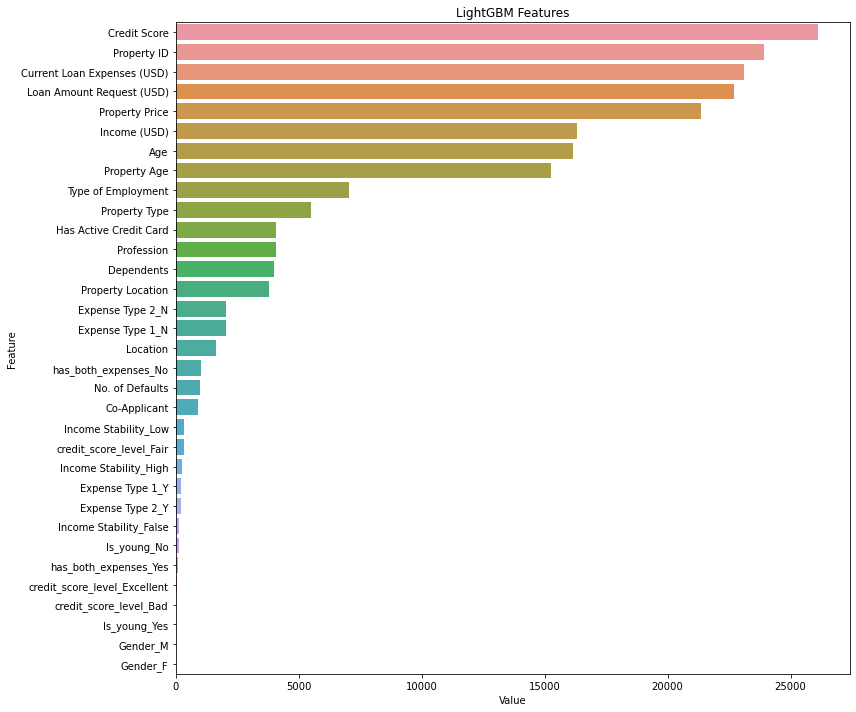

In [68]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), train_x.columns), reverse = True)[:50], 
                           columns = ['Value','Feature'])
plt.figure(figsize = (12, 10))
sns.barplot(x = "Value", y = "Feature", data = feature_imp.sort_values(by = "Value", ascending = False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

# Model with Selected Features

In [69]:
# Best Features

train_x = train[['Loan Amount Request (USD)', 'Credit Score', 'No. of Defaults', 'Has Active Credit Card', 'Property ID',
                'Property Age', 'Property Type', 'Property Location', 'Co-Applicant', 'Property Price',
                'Income Stability_High', 'Income Stability_Low', 'Current Loan Expenses (USD)', 'Expense Type 1_N',
                'Income (USD)', 'Age', 'Type of Employment', 'Profession']]

test = test[['Loan Amount Request (USD)', 'Credit Score', 'No. of Defaults', 'Has Active Credit Card', 'Property ID',
            'Property Age', 'Property Type', 'Property Location', 'Co-Applicant', 'Property Price',
            'Income Stability_High', 'Income Stability_Low', 'Current Loan Expenses (USD)', 'Expense Type 1_N',
            'Income (USD)', 'Age', 'Type of Employment', 'Profession']]

In [70]:
score_r2 = []
pred_list = []
fold = KFold(n_splits = 10, shuffle = True, random_state = 42)

for train_index, test_index in fold.split(train_x):
    X_train, X_test = train_x.iloc[train_index], train_x.iloc[test_index]
    y_train, y_test = train_y[train_index], train_y[test_index]
    
    xgb = XGBRegressor(n_estimators = 106, learning_rate = 0.3, max_depth = 5, n_jobs = -1, random_state = 89)
    lgb = LGBMRegressor(max_depth = 5, n_estimators = 107, random_state = 89)
    cr = CatBoostRegressor(iterations = 1101, reg_lambda = 2, random_state = 89)
    
    model = VotingRegressor(estimators = [('xgb', xgb), ('lgb', lgb), ('cr', cr)], verbose = True)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('R2 Score:', r2_score(y_pred, y_test))
    
    score_r2.append(r2_score(y_pred, y_test))
    predict = model.predict(test)
    pred_list.append(predict)

[Voting] ...................... (1 of 3) Processing xgb, total=   1.2s
[Voting] ...................... (2 of 3) Processing lgb, total=   0.1s
0:	learn: 47328.0399775	total: 4.76ms	remaining: 5.24s
1:	learn: 46436.9215408	total: 9.51ms	remaining: 5.23s
2:	learn: 45563.3287634	total: 14.6ms	remaining: 5.34s
3:	learn: 44724.9433745	total: 19.5ms	remaining: 5.36s
4:	learn: 43907.4218422	total: 24.5ms	remaining: 5.38s
5:	learn: 43121.8311283	total: 29.9ms	remaining: 5.45s
6:	learn: 42384.3494116	total: 36.4ms	remaining: 5.69s
7:	learn: 41633.2920683	total: 41.9ms	remaining: 5.72s
8:	learn: 40914.1952083	total: 47.6ms	remaining: 5.77s
9:	learn: 40234.9837629	total: 53.5ms	remaining: 5.83s
10:	learn: 39580.3668044	total: 58.4ms	remaining: 5.79s
11:	learn: 38963.2364277	total: 63.5ms	remaining: 5.76s
12:	learn: 38353.9233592	total: 68.5ms	remaining: 5.74s
13:	learn: 37768.3288216	total: 73.3ms	remaining: 5.69s
14:	learn: 37205.2662556	total: 77.9ms	remaining: 5.64s
15:	learn: 36670.3313665	tot

154:	learn: 23620.0937334	total: 749ms	remaining: 4.57s
155:	learn: 23611.0931614	total: 754ms	remaining: 4.57s
156:	learn: 23602.9646183	total: 759ms	remaining: 4.57s
157:	learn: 23597.4183411	total: 765ms	remaining: 4.57s
158:	learn: 23587.0629138	total: 769ms	remaining: 4.56s
159:	learn: 23582.3107120	total: 774ms	remaining: 4.55s
160:	learn: 23572.8121953	total: 779ms	remaining: 4.55s
161:	learn: 23567.9977964	total: 784ms	remaining: 4.54s
162:	learn: 23559.6174807	total: 788ms	remaining: 4.54s
163:	learn: 23549.2167807	total: 793ms	remaining: 4.53s
164:	learn: 23541.8691310	total: 798ms	remaining: 4.52s
165:	learn: 23535.8222930	total: 802ms	remaining: 4.52s
166:	learn: 23528.5692798	total: 806ms	remaining: 4.51s
167:	learn: 23521.0168130	total: 811ms	remaining: 4.5s
168:	learn: 23515.9359392	total: 816ms	remaining: 4.5s
169:	learn: 23511.1801243	total: 820ms	remaining: 4.49s
170:	learn: 23504.1199412	total: 825ms	remaining: 4.48s
171:	learn: 23499.9083425	total: 829ms	remaining: 

305:	learn: 22870.0003113	total: 1.46s	remaining: 3.79s
306:	learn: 22864.8800271	total: 1.47s	remaining: 3.79s
307:	learn: 22860.3979428	total: 1.47s	remaining: 3.79s
308:	learn: 22856.4320024	total: 1.48s	remaining: 3.78s
309:	learn: 22850.2253542	total: 1.48s	remaining: 3.78s
310:	learn: 22846.8678880	total: 1.49s	remaining: 3.77s
311:	learn: 22844.4536657	total: 1.49s	remaining: 3.77s
312:	learn: 22839.4707710	total: 1.49s	remaining: 3.76s
313:	learn: 22835.2981106	total: 1.5s	remaining: 3.76s
314:	learn: 22828.7553373	total: 1.5s	remaining: 3.75s
315:	learn: 22825.4877453	total: 1.51s	remaining: 3.75s
316:	learn: 22823.5692989	total: 1.51s	remaining: 3.74s
317:	learn: 22817.2534285	total: 1.52s	remaining: 3.73s
318:	learn: 22812.4813904	total: 1.52s	remaining: 3.73s
319:	learn: 22809.7189091	total: 1.52s	remaining: 3.72s
320:	learn: 22805.6128372	total: 1.53s	remaining: 3.72s
321:	learn: 22801.5592205	total: 1.53s	remaining: 3.71s
322:	learn: 22798.0875732	total: 1.54s	remaining: 

456:	learn: 22272.0353803	total: 2.17s	remaining: 3.06s
457:	learn: 22268.5391241	total: 2.17s	remaining: 3.05s
458:	learn: 22263.3871732	total: 2.18s	remaining: 3.05s
459:	learn: 22258.9743589	total: 2.19s	remaining: 3.05s
460:	learn: 22256.9040520	total: 2.19s	remaining: 3.04s
461:	learn: 22252.8972376	total: 2.19s	remaining: 3.04s
462:	learn: 22251.1646922	total: 2.2s	remaining: 3.03s
463:	learn: 22246.8215733	total: 2.2s	remaining: 3.03s
464:	learn: 22243.5860823	total: 2.21s	remaining: 3.02s
465:	learn: 22238.0860599	total: 2.21s	remaining: 3.02s
466:	learn: 22234.0945641	total: 2.22s	remaining: 3.01s
467:	learn: 22229.5624857	total: 2.22s	remaining: 3.01s
468:	learn: 22223.1105087	total: 2.23s	remaining: 3s
469:	learn: 22220.2287645	total: 2.23s	remaining: 3s
470:	learn: 22214.7149538	total: 2.24s	remaining: 2.99s
471:	learn: 22212.8524919	total: 2.24s	remaining: 2.99s
472:	learn: 22207.6123670	total: 2.25s	remaining: 2.98s
473:	learn: 22204.9288931	total: 2.25s	remaining: 2.98s


609:	learn: 21726.8826752	total: 2.89s	remaining: 2.32s
610:	learn: 21722.2737698	total: 2.89s	remaining: 2.32s
611:	learn: 21719.7853019	total: 2.9s	remaining: 2.31s
612:	learn: 21717.0017609	total: 2.9s	remaining: 2.31s
613:	learn: 21712.6960725	total: 2.91s	remaining: 2.31s
614:	learn: 21709.5906091	total: 2.91s	remaining: 2.3s
615:	learn: 21705.6663894	total: 2.92s	remaining: 2.3s
616:	learn: 21702.1770971	total: 2.92s	remaining: 2.29s
617:	learn: 21700.8292725	total: 2.93s	remaining: 2.29s
618:	learn: 21694.8490856	total: 2.93s	remaining: 2.28s
619:	learn: 21691.1102133	total: 2.94s	remaining: 2.28s
620:	learn: 21685.4179285	total: 2.94s	remaining: 2.27s
621:	learn: 21680.9944561	total: 2.95s	remaining: 2.27s
622:	learn: 21678.2866321	total: 2.95s	remaining: 2.27s
623:	learn: 21677.1585880	total: 2.96s	remaining: 2.26s
624:	learn: 21676.3637818	total: 2.96s	remaining: 2.26s
625:	learn: 21674.5789788	total: 2.97s	remaining: 2.25s
626:	learn: 21672.1457836	total: 2.97s	remaining: 2.

785:	learn: 21201.1396293	total: 3.78s	remaining: 1.51s
786:	learn: 21197.7635488	total: 3.78s	remaining: 1.51s
787:	learn: 21195.7076319	total: 3.79s	remaining: 1.5s
788:	learn: 21192.3309133	total: 3.8s	remaining: 1.5s
789:	learn: 21190.4639641	total: 3.8s	remaining: 1.5s
790:	learn: 21188.2084185	total: 3.81s	remaining: 1.49s
791:	learn: 21185.5387088	total: 3.81s	remaining: 1.49s
792:	learn: 21181.0766530	total: 3.82s	remaining: 1.48s
793:	learn: 21178.0216842	total: 3.82s	remaining: 1.48s
794:	learn: 21176.5572431	total: 3.83s	remaining: 1.47s
795:	learn: 21173.5807380	total: 3.84s	remaining: 1.47s
796:	learn: 21170.2695513	total: 3.84s	remaining: 1.47s
797:	learn: 21167.8477449	total: 3.85s	remaining: 1.46s
798:	learn: 21166.0365307	total: 3.85s	remaining: 1.46s
799:	learn: 21164.4336150	total: 3.86s	remaining: 1.45s
800:	learn: 21162.0128146	total: 3.86s	remaining: 1.45s
801:	learn: 21160.1112372	total: 3.87s	remaining: 1.44s
802:	learn: 21158.5962148	total: 3.87s	remaining: 1.4

958:	learn: 20759.6261453	total: 4.67s	remaining: 692ms
959:	learn: 20756.2389308	total: 4.68s	remaining: 687ms
960:	learn: 20753.3458241	total: 4.68s	remaining: 683ms
961:	learn: 20751.7003149	total: 4.69s	remaining: 678ms
962:	learn: 20749.4035985	total: 4.7s	remaining: 673ms
963:	learn: 20745.7437428	total: 4.7s	remaining: 668ms
964:	learn: 20743.5589132	total: 4.71s	remaining: 664ms
965:	learn: 20740.7500887	total: 4.72s	remaining: 659ms
966:	learn: 20739.7712252	total: 4.72s	remaining: 654ms
967:	learn: 20736.1837983	total: 4.73s	remaining: 650ms
968:	learn: 20735.1734676	total: 4.74s	remaining: 646ms
969:	learn: 20732.9161117	total: 4.75s	remaining: 641ms
970:	learn: 20730.3584888	total: 4.75s	remaining: 637ms
971:	learn: 20725.6518004	total: 4.76s	remaining: 632ms
972:	learn: 20723.6874571	total: 4.77s	remaining: 627ms
973:	learn: 20722.5417860	total: 4.78s	remaining: 623ms
974:	learn: 20720.2358971	total: 4.78s	remaining: 618ms
975:	learn: 20716.7138204	total: 4.79s	remaining: 

[Voting] ...................... (1 of 3) Processing xgb, total=   1.4s
[Voting] ...................... (2 of 3) Processing lgb, total=   0.1s
0:	learn: 47192.0502818	total: 4.89ms	remaining: 5.38s
1:	learn: 46296.8070462	total: 9.69ms	remaining: 5.32s
2:	learn: 45436.3476323	total: 14.5ms	remaining: 5.32s
3:	learn: 44599.7367619	total: 19.6ms	remaining: 5.37s
4:	learn: 43773.4481078	total: 24.3ms	remaining: 5.32s
5:	learn: 42990.7793544	total: 28.9ms	remaining: 5.28s
6:	learn: 42223.0279444	total: 34.7ms	remaining: 5.43s
7:	learn: 41479.2505249	total: 40ms	remaining: 5.46s
8:	learn: 40757.0838391	total: 47.1ms	remaining: 5.71s
9:	learn: 40091.0696944	total: 52.3ms	remaining: 5.71s
10:	learn: 39434.9313030	total: 57.3ms	remaining: 5.68s
11:	learn: 38824.7633804	total: 62.3ms	remaining: 5.65s
12:	learn: 38218.4851574	total: 66.8ms	remaining: 5.59s
13:	learn: 37636.6663251	total: 71.2ms	remaining: 5.53s
14:	learn: 37072.9156016	total: 75.9ms	remaining: 5.49s
15:	learn: 36539.3855901	total

157:	learn: 23661.5653251	total: 753ms	remaining: 4.49s
158:	learn: 23651.3730453	total: 759ms	remaining: 4.5s
159:	learn: 23646.0203360	total: 764ms	remaining: 4.5s
160:	learn: 23640.9593232	total: 770ms	remaining: 4.5s
161:	learn: 23637.1193382	total: 776ms	remaining: 4.5s
162:	learn: 23631.0604173	total: 781ms	remaining: 4.5s
163:	learn: 23620.6936269	total: 787ms	remaining: 4.5s
164:	learn: 23613.6046926	total: 793ms	remaining: 4.5s
165:	learn: 23608.3862841	total: 799ms	remaining: 4.5s
166:	learn: 23601.3279901	total: 804ms	remaining: 4.5s
167:	learn: 23596.0778344	total: 810ms	remaining: 4.5s
168:	learn: 23587.9581790	total: 815ms	remaining: 4.5s
169:	learn: 23579.5713402	total: 821ms	remaining: 4.5s
170:	learn: 23573.9838699	total: 826ms	remaining: 4.49s
171:	learn: 23569.2668085	total: 832ms	remaining: 4.49s
172:	learn: 23559.6054530	total: 837ms	remaining: 4.49s
173:	learn: 23555.1486911	total: 843ms	remaining: 4.49s
174:	learn: 23551.9581850	total: 848ms	remaining: 4.49s
175:

308:	learn: 22934.9328886	total: 1.66s	remaining: 4.25s
309:	learn: 22929.8919917	total: 1.66s	remaining: 4.25s
310:	learn: 22926.0014128	total: 1.67s	remaining: 4.24s
311:	learn: 22922.1102093	total: 1.67s	remaining: 4.23s
312:	learn: 22914.2792469	total: 1.68s	remaining: 4.23s
313:	learn: 22908.7945409	total: 1.68s	remaining: 4.22s
314:	learn: 22904.7176669	total: 1.69s	remaining: 4.21s
315:	learn: 22901.8987520	total: 1.69s	remaining: 4.21s
316:	learn: 22896.3416942	total: 1.7s	remaining: 4.2s
317:	learn: 22889.6168811	total: 1.7s	remaining: 4.19s
318:	learn: 22887.0486914	total: 1.71s	remaining: 4.18s
319:	learn: 22879.3970239	total: 1.71s	remaining: 4.18s
320:	learn: 22874.1872397	total: 1.72s	remaining: 4.17s
321:	learn: 22869.7356468	total: 1.72s	remaining: 4.16s
322:	learn: 22867.3357475	total: 1.73s	remaining: 4.16s
323:	learn: 22862.5788287	total: 1.73s	remaining: 4.15s
324:	learn: 22857.2742929	total: 1.73s	remaining: 4.14s
325:	learn: 22848.5345632	total: 1.74s	remaining: 4

461:	learn: 22318.1334251	total: 2.37s	remaining: 3.28s
462:	learn: 22316.1401654	total: 2.38s	remaining: 3.27s
463:	learn: 22311.0949798	total: 2.38s	remaining: 3.27s
464:	learn: 22306.5269161	total: 2.39s	remaining: 3.27s
465:	learn: 22304.2306781	total: 2.39s	remaining: 3.26s
466:	learn: 22298.3469327	total: 2.4s	remaining: 3.25s
467:	learn: 22294.7152420	total: 2.4s	remaining: 3.25s
468:	learn: 22292.3049358	total: 2.41s	remaining: 3.24s
469:	learn: 22289.1516900	total: 2.41s	remaining: 3.24s
470:	learn: 22283.8970377	total: 2.42s	remaining: 3.23s
471:	learn: 22282.1555996	total: 2.42s	remaining: 3.23s
472:	learn: 22279.5202687	total: 2.43s	remaining: 3.22s
473:	learn: 22277.0217969	total: 2.43s	remaining: 3.21s
474:	learn: 22275.0674945	total: 2.44s	remaining: 3.21s
475:	learn: 22273.3241882	total: 2.44s	remaining: 3.2s
476:	learn: 22268.5555003	total: 2.44s	remaining: 3.2s
477:	learn: 22263.8405724	total: 2.45s	remaining: 3.19s
478:	learn: 22257.9845537	total: 2.45s	remaining: 3.

611:	learn: 21769.4055109	total: 3.08s	remaining: 2.46s
612:	learn: 21765.4760516	total: 3.08s	remaining: 2.46s
613:	learn: 21762.5434351	total: 3.09s	remaining: 2.45s
614:	learn: 21759.7080191	total: 3.1s	remaining: 2.45s
615:	learn: 21757.0087370	total: 3.1s	remaining: 2.44s
616:	learn: 21753.2909174	total: 3.1s	remaining: 2.44s
617:	learn: 21750.1063447	total: 3.11s	remaining: 2.43s
618:	learn: 21746.6883304	total: 3.11s	remaining: 2.42s
619:	learn: 21742.5863092	total: 3.12s	remaining: 2.42s
620:	learn: 21736.5359810	total: 3.12s	remaining: 2.41s
621:	learn: 21734.5443677	total: 3.13s	remaining: 2.41s
622:	learn: 21732.8182606	total: 3.13s	remaining: 2.4s
623:	learn: 21731.0070048	total: 3.14s	remaining: 2.4s
624:	learn: 21726.2891359	total: 3.14s	remaining: 2.39s
625:	learn: 21721.7419125	total: 3.15s	remaining: 2.39s
626:	learn: 21718.5037985	total: 3.15s	remaining: 2.38s
627:	learn: 21717.5470802	total: 3.15s	remaining: 2.38s
628:	learn: 21714.0950864	total: 3.16s	remaining: 2.3

765:	learn: 21283.7234552	total: 3.79s	remaining: 1.66s
766:	learn: 21281.8624151	total: 3.8s	remaining: 1.65s
767:	learn: 21278.8245220	total: 3.81s	remaining: 1.65s
768:	learn: 21274.5200500	total: 3.81s	remaining: 1.64s
769:	learn: 21272.2569500	total: 3.81s	remaining: 1.64s
770:	learn: 21270.3241057	total: 3.82s	remaining: 1.63s
771:	learn: 21268.0210575	total: 3.82s	remaining: 1.63s
772:	learn: 21266.1769653	total: 3.83s	remaining: 1.62s
773:	learn: 21264.6325755	total: 3.83s	remaining: 1.62s
774:	learn: 21260.6888064	total: 3.84s	remaining: 1.61s
775:	learn: 21259.1143049	total: 3.84s	remaining: 1.61s
776:	learn: 21256.8985534	total: 3.85s	remaining: 1.6s
777:	learn: 21253.3908717	total: 3.85s	remaining: 1.6s
778:	learn: 21250.3276075	total: 3.85s	remaining: 1.59s
779:	learn: 21247.3467116	total: 3.86s	remaining: 1.59s
780:	learn: 21246.7425874	total: 3.86s	remaining: 1.58s
781:	learn: 21243.3322105	total: 3.87s	remaining: 1.58s
782:	learn: 21238.1000290	total: 3.87s	remaining: 1

918:	learn: 20868.0023197	total: 4.51s	remaining: 893ms
919:	learn: 20863.4926676	total: 4.51s	remaining: 888ms
920:	learn: 20859.3411884	total: 4.52s	remaining: 883ms
921:	learn: 20858.1522250	total: 4.52s	remaining: 878ms
922:	learn: 20857.3568870	total: 4.53s	remaining: 873ms
923:	learn: 20855.0663778	total: 4.53s	remaining: 868ms
924:	learn: 20850.6146026	total: 4.54s	remaining: 863ms
925:	learn: 20847.5211817	total: 4.54s	remaining: 858ms
926:	learn: 20845.9788205	total: 4.55s	remaining: 853ms
927:	learn: 20843.5173485	total: 4.55s	remaining: 848ms
928:	learn: 20841.1227711	total: 4.55s	remaining: 843ms
929:	learn: 20838.0818323	total: 4.56s	remaining: 838ms
930:	learn: 20837.3264553	total: 4.56s	remaining: 833ms
931:	learn: 20835.0525244	total: 4.57s	remaining: 828ms
932:	learn: 20832.1361231	total: 4.57s	remaining: 823ms
933:	learn: 20828.5884513	total: 4.58s	remaining: 819ms
934:	learn: 20824.3016219	total: 4.58s	remaining: 814ms
935:	learn: 20819.3652226	total: 4.59s	remaining

1068:	learn: 20504.0281382	total: 5.22s	remaining: 156ms
1069:	learn: 20499.3832807	total: 5.22s	remaining: 151ms
1070:	learn: 20495.3338810	total: 5.23s	remaining: 146ms
1071:	learn: 20491.8671779	total: 5.24s	remaining: 142ms
1072:	learn: 20489.5384201	total: 5.24s	remaining: 137ms
1073:	learn: 20486.2643127	total: 5.25s	remaining: 132ms
1074:	learn: 20483.5625080	total: 5.25s	remaining: 127ms
1075:	learn: 20481.8710610	total: 5.26s	remaining: 122ms
1076:	learn: 20480.0350410	total: 5.26s	remaining: 117ms
1077:	learn: 20477.6694329	total: 5.27s	remaining: 112ms
1078:	learn: 20473.6163396	total: 5.27s	remaining: 107ms
1079:	learn: 20470.4882747	total: 5.28s	remaining: 103ms
1080:	learn: 20468.4298592	total: 5.28s	remaining: 97.7ms
1081:	learn: 20466.9204906	total: 5.29s	remaining: 92.8ms
1082:	learn: 20464.3133654	total: 5.29s	remaining: 87.9ms
1083:	learn: 20462.9863250	total: 5.29s	remaining: 83ms
1084:	learn: 20460.8597396	total: 5.3s	remaining: 78.1ms
1085:	learn: 20458.9244330	to

117:	learn: 23910.1092159	total: 569ms	remaining: 4.74s
118:	learn: 23900.0333548	total: 574ms	remaining: 4.74s
119:	learn: 23889.9438478	total: 579ms	remaining: 4.74s
120:	learn: 23881.4359809	total: 585ms	remaining: 4.74s
121:	learn: 23869.4952511	total: 590ms	remaining: 4.73s
122:	learn: 23851.1497363	total: 595ms	remaining: 4.73s
123:	learn: 23836.9319541	total: 599ms	remaining: 4.72s
124:	learn: 23826.1409558	total: 604ms	remaining: 4.71s
125:	learn: 23817.5046124	total: 608ms	remaining: 4.71s
126:	learn: 23804.7289016	total: 613ms	remaining: 4.7s
127:	learn: 23797.0625460	total: 618ms	remaining: 4.69s
128:	learn: 23789.7389254	total: 622ms	remaining: 4.69s
129:	learn: 23783.8421082	total: 627ms	remaining: 4.68s
130:	learn: 23778.3229029	total: 631ms	remaining: 4.67s
131:	learn: 23765.9263956	total: 636ms	remaining: 4.67s
132:	learn: 23757.4450016	total: 640ms	remaining: 4.66s
133:	learn: 23741.6137365	total: 645ms	remaining: 4.65s
134:	learn: 23734.3890333	total: 649ms	remaining:

270:	learn: 22945.8484124	total: 1.28s	remaining: 3.93s
271:	learn: 22942.1330730	total: 1.29s	remaining: 3.92s
272:	learn: 22937.9424842	total: 1.29s	remaining: 3.92s
273:	learn: 22933.1010621	total: 1.3s	remaining: 3.92s
274:	learn: 22927.9500038	total: 1.3s	remaining: 3.92s
275:	learn: 22923.9670021	total: 1.31s	remaining: 3.91s
276:	learn: 22920.5240849	total: 1.31s	remaining: 3.91s
277:	learn: 22917.7215408	total: 1.32s	remaining: 3.91s
278:	learn: 22913.5220354	total: 1.32s	remaining: 3.9s
279:	learn: 22908.9737073	total: 1.33s	remaining: 3.9s
280:	learn: 22906.3001291	total: 1.33s	remaining: 3.89s
281:	learn: 22899.2877894	total: 1.34s	remaining: 3.89s
282:	learn: 22895.0927797	total: 1.34s	remaining: 3.88s
283:	learn: 22890.8859324	total: 1.35s	remaining: 3.88s
284:	learn: 22887.2489978	total: 1.35s	remaining: 3.88s
285:	learn: 22881.0633546	total: 1.36s	remaining: 3.87s
286:	learn: 22878.1447388	total: 1.36s	remaining: 3.87s
287:	learn: 22875.1149216	total: 1.37s	remaining: 3.

421:	learn: 22334.6141704	total: 1.99s	remaining: 3.2s
422:	learn: 22331.8694916	total: 1.99s	remaining: 3.2s
423:	learn: 22328.5489365	total: 2s	remaining: 3.19s
424:	learn: 22325.2641927	total: 2s	remaining: 3.19s
425:	learn: 22321.9422498	total: 2.01s	remaining: 3.18s
426:	learn: 22317.8962113	total: 2.01s	remaining: 3.18s
427:	learn: 22312.8607462	total: 2.02s	remaining: 3.17s
428:	learn: 22308.7072169	total: 2.02s	remaining: 3.17s
429:	learn: 22306.8152745	total: 2.03s	remaining: 3.17s
430:	learn: 22304.4673373	total: 2.03s	remaining: 3.16s
431:	learn: 22300.4791003	total: 2.04s	remaining: 3.16s
432:	learn: 22297.4711238	total: 2.04s	remaining: 3.15s
433:	learn: 22293.5755202	total: 2.05s	remaining: 3.15s
434:	learn: 22290.9839756	total: 2.05s	remaining: 3.14s
435:	learn: 22288.6171597	total: 2.06s	remaining: 3.14s
436:	learn: 22286.3180751	total: 2.06s	remaining: 3.13s
437:	learn: 22281.9982778	total: 2.07s	remaining: 3.13s
438:	learn: 22278.2040980	total: 2.07s	remaining: 3.12s


572:	learn: 21787.4115570	total: 2.7s	remaining: 2.49s
573:	learn: 21783.7146927	total: 2.71s	remaining: 2.48s
574:	learn: 21780.9595702	total: 2.71s	remaining: 2.48s
575:	learn: 21777.2661739	total: 2.72s	remaining: 2.48s
576:	learn: 21774.8738992	total: 2.72s	remaining: 2.47s
577:	learn: 21769.4400767	total: 2.73s	remaining: 2.47s
578:	learn: 21766.5844398	total: 2.73s	remaining: 2.46s
579:	learn: 21762.2344611	total: 2.73s	remaining: 2.46s
580:	learn: 21759.5635176	total: 2.74s	remaining: 2.45s
581:	learn: 21757.4478594	total: 2.74s	remaining: 2.45s
582:	learn: 21753.2386624	total: 2.75s	remaining: 2.44s
583:	learn: 21748.1910831	total: 2.75s	remaining: 2.44s
584:	learn: 21745.3113232	total: 2.76s	remaining: 2.43s
585:	learn: 21741.5368117	total: 2.76s	remaining: 2.43s
586:	learn: 21738.2314818	total: 2.77s	remaining: 2.42s
587:	learn: 21733.5078205	total: 2.77s	remaining: 2.42s
588:	learn: 21728.2825596	total: 2.78s	remaining: 2.41s
589:	learn: 21726.7878825	total: 2.78s	remaining:

723:	learn: 21325.0580655	total: 3.41s	remaining: 1.78s
724:	learn: 21323.5846550	total: 3.42s	remaining: 1.77s
725:	learn: 21320.6993255	total: 3.42s	remaining: 1.77s
726:	learn: 21318.6036083	total: 3.43s	remaining: 1.76s
727:	learn: 21315.0938929	total: 3.43s	remaining: 1.76s
728:	learn: 21312.4170553	total: 3.44s	remaining: 1.75s
729:	learn: 21310.4503212	total: 3.44s	remaining: 1.75s
730:	learn: 21308.2620201	total: 3.45s	remaining: 1.75s
731:	learn: 21304.8702722	total: 3.45s	remaining: 1.74s
732:	learn: 21303.3284828	total: 3.46s	remaining: 1.74s
733:	learn: 21301.7351597	total: 3.46s	remaining: 1.73s
734:	learn: 21300.0203465	total: 3.46s	remaining: 1.73s
735:	learn: 21297.9135409	total: 3.47s	remaining: 1.72s
736:	learn: 21292.6480247	total: 3.48s	remaining: 1.72s
737:	learn: 21289.7611977	total: 3.48s	remaining: 1.71s
738:	learn: 21288.0194434	total: 3.48s	remaining: 1.71s
739:	learn: 21283.4915313	total: 3.49s	remaining: 1.7s
740:	learn: 21280.6721534	total: 3.49s	remaining:

875:	learn: 20946.0297384	total: 4.13s	remaining: 1.06s
876:	learn: 20944.4227080	total: 4.13s	remaining: 1.06s
877:	learn: 20941.6398714	total: 4.14s	remaining: 1.05s
878:	learn: 20940.4695053	total: 4.14s	remaining: 1.05s
879:	learn: 20938.4784290	total: 4.15s	remaining: 1.04s
880:	learn: 20934.5971194	total: 4.16s	remaining: 1.04s
881:	learn: 20930.7651095	total: 4.16s	remaining: 1.03s
882:	learn: 20929.6807021	total: 4.17s	remaining: 1.03s
883:	learn: 20928.6598028	total: 4.17s	remaining: 1.02s
884:	learn: 20925.7354413	total: 4.18s	remaining: 1.02s
885:	learn: 20923.0902238	total: 4.18s	remaining: 1.01s
886:	learn: 20921.3347174	total: 4.18s	remaining: 1.01s
887:	learn: 20920.6258158	total: 4.19s	remaining: 1s
888:	learn: 20917.2697914	total: 4.2s	remaining: 1s
889:	learn: 20914.0956620	total: 4.2s	remaining: 996ms
890:	learn: 20912.6325898	total: 4.2s	remaining: 991ms
891:	learn: 20909.6105187	total: 4.21s	remaining: 986ms
892:	learn: 20906.3751823	total: 4.21s	remaining: 981ms
8

1056:	learn: 20518.4385485	total: 5.03s	remaining: 210ms
1057:	learn: 20516.4639892	total: 5.04s	remaining: 205ms
1058:	learn: 20514.9567536	total: 5.04s	remaining: 200ms
1059:	learn: 20511.2791519	total: 5.05s	remaining: 195ms
1060:	learn: 20508.8778457	total: 5.06s	remaining: 191ms
1061:	learn: 20504.5602759	total: 5.06s	remaining: 186ms
1062:	learn: 20500.0993435	total: 5.07s	remaining: 181ms
1063:	learn: 20496.9566068	total: 5.07s	remaining: 176ms
1064:	learn: 20495.5616203	total: 5.08s	remaining: 172ms
1065:	learn: 20493.3347152	total: 5.08s	remaining: 167ms
1066:	learn: 20492.5608081	total: 5.09s	remaining: 162ms
1067:	learn: 20491.6828960	total: 5.09s	remaining: 157ms
1068:	learn: 20487.4307851	total: 5.1s	remaining: 153ms
1069:	learn: 20485.4214319	total: 5.1s	remaining: 148ms
1070:	learn: 20483.1151975	total: 5.11s	remaining: 143ms
1071:	learn: 20480.8199557	total: 5.11s	remaining: 138ms
1072:	learn: 20478.1122955	total: 5.12s	remaining: 134ms
1073:	learn: 20476.4225983	total:

110:	learn: 24210.8396584	total: 736ms	remaining: 6.57s
111:	learn: 24193.0550238	total: 742ms	remaining: 6.55s
112:	learn: 24181.2378136	total: 749ms	remaining: 6.55s
113:	learn: 24173.2353918	total: 755ms	remaining: 6.54s
114:	learn: 24162.4141556	total: 761ms	remaining: 6.53s
115:	learn: 24146.6158618	total: 767ms	remaining: 6.51s
116:	learn: 24134.4467576	total: 773ms	remaining: 6.5s
117:	learn: 24121.2406811	total: 779ms	remaining: 6.49s
118:	learn: 24110.8625116	total: 786ms	remaining: 6.48s
119:	learn: 24096.2908232	total: 792ms	remaining: 6.47s
120:	learn: 24085.0544159	total: 798ms	remaining: 6.46s
121:	learn: 24073.0110407	total: 804ms	remaining: 6.45s
122:	learn: 24055.2796557	total: 810ms	remaining: 6.44s
123:	learn: 24044.7632037	total: 815ms	remaining: 6.42s
124:	learn: 24034.7428997	total: 822ms	remaining: 6.42s
125:	learn: 24027.2027936	total: 829ms	remaining: 6.41s
126:	learn: 24015.2524089	total: 834ms	remaining: 6.4s
127:	learn: 24007.3603691	total: 841ms	remaining: 

282:	learn: 23133.9547738	total: 1.63s	remaining: 4.7s
283:	learn: 23131.3721837	total: 1.63s	remaining: 4.69s
284:	learn: 23126.7556192	total: 1.64s	remaining: 4.68s
285:	learn: 23121.6205897	total: 1.64s	remaining: 4.68s
286:	learn: 23113.7279439	total: 1.65s	remaining: 4.67s
287:	learn: 23111.1069137	total: 1.65s	remaining: 4.66s
288:	learn: 23105.6914818	total: 1.66s	remaining: 4.65s
289:	learn: 23099.3721069	total: 1.66s	remaining: 4.64s
290:	learn: 23093.8138418	total: 1.66s	remaining: 4.63s
291:	learn: 23090.7664257	total: 1.67s	remaining: 4.63s
292:	learn: 23088.1407098	total: 1.67s	remaining: 4.62s
293:	learn: 23086.3556193	total: 1.68s	remaining: 4.61s
294:	learn: 23079.5653443	total: 1.68s	remaining: 4.6s
295:	learn: 23073.3309066	total: 1.69s	remaining: 4.59s
296:	learn: 23068.3624632	total: 1.69s	remaining: 4.58s
297:	learn: 23064.9606427	total: 1.7s	remaining: 4.58s
298:	learn: 23058.6703114	total: 1.7s	remaining: 4.57s
299:	learn: 23057.4245031	total: 1.71s	remaining: 4.

446:	learn: 22481.4628171	total: 2.52s	remaining: 3.69s
447:	learn: 22478.4181515	total: 2.53s	remaining: 3.68s
448:	learn: 22472.6982154	total: 2.53s	remaining: 3.68s
449:	learn: 22470.5921468	total: 2.54s	remaining: 3.67s
450:	learn: 22465.2542617	total: 2.54s	remaining: 3.67s
451:	learn: 22463.0862392	total: 2.55s	remaining: 3.66s
452:	learn: 22458.8357432	total: 2.56s	remaining: 3.66s
453:	learn: 22457.1349557	total: 2.56s	remaining: 3.65s
454:	learn: 22453.9364975	total: 2.58s	remaining: 3.66s
455:	learn: 22448.3192445	total: 2.58s	remaining: 3.66s
456:	learn: 22445.2329104	total: 2.59s	remaining: 3.65s
457:	learn: 22443.3379121	total: 2.6s	remaining: 3.65s
458:	learn: 22439.9823537	total: 2.6s	remaining: 3.64s
459:	learn: 22435.6592015	total: 2.62s	remaining: 3.66s
460:	learn: 22430.3057380	total: 2.63s	remaining: 3.65s
461:	learn: 22427.3530352	total: 2.64s	remaining: 3.65s
462:	learn: 22423.3900794	total: 2.64s	remaining: 3.64s
463:	learn: 22421.7585437	total: 2.65s	remaining: 

620:	learn: 21901.9460672	total: 3.42s	remaining: 2.64s
621:	learn: 21900.2678651	total: 3.42s	remaining: 2.63s
622:	learn: 21897.0038542	total: 3.43s	remaining: 2.63s
623:	learn: 21893.7376846	total: 3.43s	remaining: 2.62s
624:	learn: 21889.8621877	total: 3.44s	remaining: 2.62s
625:	learn: 21887.1178221	total: 3.44s	remaining: 2.61s
626:	learn: 21880.8598153	total: 3.45s	remaining: 2.6s
627:	learn: 21879.4058968	total: 3.45s	remaining: 2.6s
628:	learn: 21875.8382852	total: 3.46s	remaining: 2.59s
629:	learn: 21870.5372065	total: 3.46s	remaining: 2.59s
630:	learn: 21868.0078616	total: 3.46s	remaining: 2.58s
631:	learn: 21865.6433646	total: 3.47s	remaining: 2.58s
632:	learn: 21862.7415410	total: 3.47s	remaining: 2.57s
633:	learn: 21860.8583439	total: 3.48s	remaining: 2.56s
634:	learn: 21858.9375251	total: 3.48s	remaining: 2.56s
635:	learn: 21856.0495496	total: 3.49s	remaining: 2.55s
636:	learn: 21854.3813577	total: 3.49s	remaining: 2.54s
637:	learn: 21847.8339706	total: 3.5s	remaining: 2

796:	learn: 21357.4794581	total: 4.31s	remaining: 1.64s
797:	learn: 21354.2357467	total: 4.32s	remaining: 1.64s
798:	learn: 21350.3338017	total: 4.32s	remaining: 1.63s
799:	learn: 21349.0229769	total: 4.33s	remaining: 1.63s
800:	learn: 21347.1382044	total: 4.33s	remaining: 1.62s
801:	learn: 21344.1765564	total: 4.34s	remaining: 1.62s
802:	learn: 21341.5686520	total: 4.34s	remaining: 1.61s
803:	learn: 21339.5430020	total: 4.35s	remaining: 1.6s
804:	learn: 21335.9483188	total: 4.35s	remaining: 1.6s
805:	learn: 21334.1153087	total: 4.36s	remaining: 1.59s
806:	learn: 21332.0311568	total: 4.36s	remaining: 1.59s
807:	learn: 21328.0269843	total: 4.37s	remaining: 1.58s
808:	learn: 21325.2317880	total: 4.37s	remaining: 1.58s
809:	learn: 21322.0509974	total: 4.38s	remaining: 1.57s
810:	learn: 21318.0934034	total: 4.38s	remaining: 1.57s
811:	learn: 21316.7154174	total: 4.38s	remaining: 1.56s
812:	learn: 21311.9129548	total: 4.39s	remaining: 1.55s
813:	learn: 21306.7826884	total: 4.39s	remaining: 

980:	learn: 20856.5140807	total: 5.2s	remaining: 636ms
981:	learn: 20854.7997876	total: 5.2s	remaining: 630ms
982:	learn: 20852.2922867	total: 5.21s	remaining: 625ms
983:	learn: 20849.7996460	total: 5.21s	remaining: 620ms
984:	learn: 20847.5514662	total: 5.22s	remaining: 615ms
985:	learn: 20845.9575844	total: 5.22s	remaining: 609ms
986:	learn: 20841.3386314	total: 5.23s	remaining: 604ms
987:	learn: 20839.8429921	total: 5.23s	remaining: 598ms
988:	learn: 20838.2841492	total: 5.24s	remaining: 593ms
989:	learn: 20835.5566113	total: 5.24s	remaining: 588ms
990:	learn: 20834.6390630	total: 5.25s	remaining: 582ms
991:	learn: 20832.1054531	total: 5.25s	remaining: 577ms
992:	learn: 20829.8315643	total: 5.26s	remaining: 572ms
993:	learn: 20828.7838883	total: 5.26s	remaining: 566ms
994:	learn: 20825.3642214	total: 5.26s	remaining: 561ms
995:	learn: 20821.0945607	total: 5.27s	remaining: 556ms
996:	learn: 20819.3313901	total: 5.27s	remaining: 550ms
997:	learn: 20818.7813719	total: 5.28s	remaining: 

43:	learn: 27855.0621042	total: 215ms	remaining: 5.15s
44:	learn: 27700.4843160	total: 220ms	remaining: 5.15s
45:	learn: 27537.4718791	total: 225ms	remaining: 5.16s
46:	learn: 27390.2317375	total: 230ms	remaining: 5.16s
47:	learn: 27252.7386955	total: 235ms	remaining: 5.16s
48:	learn: 27104.0063307	total: 240ms	remaining: 5.16s
49:	learn: 26969.2835347	total: 245ms	remaining: 5.16s
50:	learn: 26843.7665631	total: 250ms	remaining: 5.15s
51:	learn: 26733.1865272	total: 255ms	remaining: 5.14s
52:	learn: 26620.4268203	total: 260ms	remaining: 5.13s
53:	learn: 26513.4909756	total: 264ms	remaining: 5.13s
54:	learn: 26412.8027064	total: 269ms	remaining: 5.12s
55:	learn: 26303.5396393	total: 274ms	remaining: 5.11s
56:	learn: 26216.0252468	total: 279ms	remaining: 5.11s
57:	learn: 26111.0969610	total: 284ms	remaining: 5.11s
58:	learn: 26023.8144045	total: 288ms	remaining: 5.09s
59:	learn: 25949.8572064	total: 293ms	remaining: 5.08s
60:	learn: 25862.2277373	total: 298ms	remaining: 5.08s
61:	learn:

192:	learn: 23331.0853550	total: 925ms	remaining: 4.35s
193:	learn: 23324.5411448	total: 930ms	remaining: 4.35s
194:	learn: 23320.3687778	total: 935ms	remaining: 4.35s
195:	learn: 23311.0032464	total: 940ms	remaining: 4.34s
196:	learn: 23303.7611494	total: 945ms	remaining: 4.33s
197:	learn: 23298.9581202	total: 950ms	remaining: 4.33s
198:	learn: 23290.3092062	total: 955ms	remaining: 4.33s
199:	learn: 23282.8802211	total: 959ms	remaining: 4.32s
200:	learn: 23277.6513542	total: 964ms	remaining: 4.32s
201:	learn: 23272.6976633	total: 969ms	remaining: 4.31s
202:	learn: 23263.4408907	total: 973ms	remaining: 4.3s
203:	learn: 23257.8164586	total: 978ms	remaining: 4.3s
204:	learn: 23253.9305308	total: 982ms	remaining: 4.29s
205:	learn: 23248.9644801	total: 988ms	remaining: 4.29s
206:	learn: 23242.1175581	total: 992ms	remaining: 4.28s
207:	learn: 23234.2951679	total: 996ms	remaining: 4.28s
208:	learn: 23229.2720379	total: 1s	remaining: 4.27s
209:	learn: 23225.1162437	total: 1s	remaining: 4.26s


342:	learn: 22640.0909274	total: 1.64s	remaining: 3.62s
343:	learn: 22635.7569922	total: 1.64s	remaining: 3.61s
344:	learn: 22629.6838759	total: 1.65s	remaining: 3.61s
345:	learn: 22624.9029686	total: 1.65s	remaining: 3.61s
346:	learn: 22618.8108443	total: 1.66s	remaining: 3.6s
347:	learn: 22616.1166801	total: 1.66s	remaining: 3.6s
348:	learn: 22611.8137615	total: 1.67s	remaining: 3.59s
349:	learn: 22605.3055920	total: 1.67s	remaining: 3.59s
350:	learn: 22603.2827066	total: 1.68s	remaining: 3.58s
351:	learn: 22600.3006233	total: 1.68s	remaining: 3.58s
352:	learn: 22594.0472816	total: 1.69s	remaining: 3.57s
353:	learn: 22590.0636592	total: 1.69s	remaining: 3.57s
354:	learn: 22587.1451445	total: 1.7s	remaining: 3.56s
355:	learn: 22581.4974275	total: 1.7s	remaining: 3.56s
356:	learn: 22576.8007731	total: 1.7s	remaining: 3.55s
357:	learn: 22573.6602766	total: 1.71s	remaining: 3.55s
358:	learn: 22570.5745868	total: 1.71s	remaining: 3.54s
359:	learn: 22568.2369423	total: 1.72s	remaining: 3.5

491:	learn: 22091.8258281	total: 2.35s	remaining: 2.9s
492:	learn: 22086.5504125	total: 2.35s	remaining: 2.9s
493:	learn: 22082.6773987	total: 2.36s	remaining: 2.9s
494:	learn: 22077.7772198	total: 2.36s	remaining: 2.89s
495:	learn: 22074.9329938	total: 2.37s	remaining: 2.89s
496:	learn: 22070.9479426	total: 2.37s	remaining: 2.88s
497:	learn: 22067.2796423	total: 2.38s	remaining: 2.88s
498:	learn: 22062.9781621	total: 2.38s	remaining: 2.87s
499:	learn: 22059.1309137	total: 2.38s	remaining: 2.87s
500:	learn: 22054.9071272	total: 2.39s	remaining: 2.86s
501:	learn: 22052.7289905	total: 2.39s	remaining: 2.86s
502:	learn: 22048.9068683	total: 2.4s	remaining: 2.85s
503:	learn: 22045.6410073	total: 2.4s	remaining: 2.85s
504:	learn: 22042.0396108	total: 2.41s	remaining: 2.84s
505:	learn: 22039.7685234	total: 2.41s	remaining: 2.84s
506:	learn: 22037.7730010	total: 2.42s	remaining: 2.83s
507:	learn: 22033.2180309	total: 2.42s	remaining: 2.83s
508:	learn: 22030.5061150	total: 2.43s	remaining: 2.8

642:	learn: 21554.2267454	total: 3.06s	remaining: 2.18s
643:	learn: 21552.5028461	total: 3.06s	remaining: 2.17s
644:	learn: 21549.4895873	total: 3.07s	remaining: 2.17s
645:	learn: 21546.4406524	total: 3.08s	remaining: 2.17s
646:	learn: 21542.4369943	total: 3.08s	remaining: 2.16s
647:	learn: 21535.6167945	total: 3.08s	remaining: 2.16s
648:	learn: 21532.4267855	total: 3.09s	remaining: 2.15s
649:	learn: 21529.9423117	total: 3.09s	remaining: 2.15s
650:	learn: 21528.0205587	total: 3.1s	remaining: 2.14s
651:	learn: 21523.4706933	total: 3.1s	remaining: 2.14s
652:	learn: 21520.0289463	total: 3.11s	remaining: 2.13s
653:	learn: 21514.4499985	total: 3.11s	remaining: 2.13s
654:	learn: 21511.1598723	total: 3.12s	remaining: 2.12s
655:	learn: 21508.2085684	total: 3.12s	remaining: 2.12s
656:	learn: 21506.2230130	total: 3.13s	remaining: 2.11s
657:	learn: 21503.4752297	total: 3.13s	remaining: 2.11s
658:	learn: 21499.4792754	total: 3.14s	remaining: 2.1s
659:	learn: 21496.8872687	total: 3.14s	remaining: 2

790:	learn: 21100.1460391	total: 3.77s	remaining: 1.48s
791:	learn: 21097.2643738	total: 3.78s	remaining: 1.47s
792:	learn: 21095.5872976	total: 3.78s	remaining: 1.47s
793:	learn: 21089.8559077	total: 3.79s	remaining: 1.47s
794:	learn: 21087.1868830	total: 3.79s	remaining: 1.46s
795:	learn: 21085.8992202	total: 3.8s	remaining: 1.46s
796:	learn: 21082.2479340	total: 3.8s	remaining: 1.45s
797:	learn: 21077.1105964	total: 3.81s	remaining: 1.45s
798:	learn: 21074.0789462	total: 3.81s	remaining: 1.44s
799:	learn: 21071.8648025	total: 3.82s	remaining: 1.44s
800:	learn: 21069.5491554	total: 3.82s	remaining: 1.43s
801:	learn: 21067.5252454	total: 3.83s	remaining: 1.43s
802:	learn: 21064.7999416	total: 3.83s	remaining: 1.42s
803:	learn: 21062.6651000	total: 3.83s	remaining: 1.42s
804:	learn: 21060.0306014	total: 3.84s	remaining: 1.41s
805:	learn: 21056.3002462	total: 3.84s	remaining: 1.41s
806:	learn: 21054.2022872	total: 3.85s	remaining: 1.4s
807:	learn: 21053.4623077	total: 3.85s	remaining: 1

938:	learn: 20717.9937216	total: 4.48s	remaining: 773ms
939:	learn: 20716.0451900	total: 4.49s	remaining: 769ms
940:	learn: 20714.5648983	total: 4.49s	remaining: 764ms
941:	learn: 20711.8643745	total: 4.5s	remaining: 759ms
942:	learn: 20710.5131347	total: 4.5s	remaining: 755ms
943:	learn: 20709.1415443	total: 4.51s	remaining: 750ms
944:	learn: 20706.4404781	total: 4.51s	remaining: 745ms
945:	learn: 20703.3367995	total: 4.52s	remaining: 740ms
946:	learn: 20701.2581565	total: 4.52s	remaining: 735ms
947:	learn: 20699.2557548	total: 4.53s	remaining: 730ms
948:	learn: 20695.3447596	total: 4.53s	remaining: 726ms
949:	learn: 20692.8893084	total: 4.54s	remaining: 721ms
950:	learn: 20688.3935862	total: 4.54s	remaining: 716ms
951:	learn: 20687.4965899	total: 4.54s	remaining: 711ms
952:	learn: 20683.3325868	total: 4.55s	remaining: 707ms
953:	learn: 20682.1936027	total: 4.55s	remaining: 702ms
954:	learn: 20679.4947895	total: 4.56s	remaining: 697ms
955:	learn: 20678.1211063	total: 4.56s	remaining: 

1087:	learn: 20386.6027966	total: 5.2s	remaining: 62.1ms
1088:	learn: 20384.6616764	total: 5.2s	remaining: 57.3ms
1089:	learn: 20383.1026133	total: 5.21s	remaining: 52.5ms
1090:	learn: 20381.3116806	total: 5.21s	remaining: 47.8ms
1091:	learn: 20379.8975329	total: 5.22s	remaining: 43ms
1092:	learn: 20377.1910232	total: 5.22s	remaining: 38.2ms
1093:	learn: 20376.0426574	total: 5.23s	remaining: 33.4ms
1094:	learn: 20373.9976337	total: 5.23s	remaining: 28.7ms
1095:	learn: 20372.9587171	total: 5.24s	remaining: 23.9ms
1096:	learn: 20370.5279805	total: 5.24s	remaining: 19.1ms
1097:	learn: 20368.6610686	total: 5.25s	remaining: 14.3ms
1098:	learn: 20367.1809314	total: 5.25s	remaining: 9.55ms
1099:	learn: 20363.9869721	total: 5.25s	remaining: 4.78ms
1100:	learn: 20361.0237066	total: 5.26s	remaining: 0us
[Voting] ....................... (3 of 3) Processing cr, total=   5.6s
R2 Score: 0.618859433285659
[Voting] ...................... (1 of 3) Processing xgb, total=   1.4s
[Voting] ................

130:	learn: 23687.7077141	total: 868ms	remaining: 6.43s
131:	learn: 23679.0214180	total: 875ms	remaining: 6.42s
132:	learn: 23670.0576631	total: 888ms	remaining: 6.46s
133:	learn: 23662.9800848	total: 894ms	remaining: 6.45s
134:	learn: 23653.5647564	total: 900ms	remaining: 6.44s
135:	learn: 23644.4338552	total: 906ms	remaining: 6.43s
136:	learn: 23636.5978866	total: 912ms	remaining: 6.42s
137:	learn: 23629.0603458	total: 918ms	remaining: 6.41s
138:	learn: 23616.8244889	total: 924ms	remaining: 6.4s
139:	learn: 23607.7994136	total: 931ms	remaining: 6.39s
140:	learn: 23600.1629730	total: 937ms	remaining: 6.38s
141:	learn: 23589.8778378	total: 942ms	remaining: 6.36s
142:	learn: 23583.1128822	total: 948ms	remaining: 6.35s
143:	learn: 23576.3429544	total: 954ms	remaining: 6.34s
144:	learn: 23569.8008026	total: 960ms	remaining: 6.33s
145:	learn: 23558.3826620	total: 965ms	remaining: 6.31s
146:	learn: 23545.0576440	total: 971ms	remaining: 6.3s
147:	learn: 23538.6006508	total: 977ms	remaining: 

302:	learn: 22750.4583616	total: 1.94s	remaining: 5.12s
303:	learn: 22746.3113158	total: 1.95s	remaining: 5.11s
304:	learn: 22739.0242727	total: 1.96s	remaining: 5.1s
305:	learn: 22735.4769722	total: 1.96s	remaining: 5.1s
306:	learn: 22733.0405413	total: 1.97s	remaining: 5.09s
307:	learn: 22727.8710851	total: 1.97s	remaining: 5.08s
308:	learn: 22724.3328056	total: 1.98s	remaining: 5.07s
309:	learn: 22716.7364108	total: 1.98s	remaining: 5.06s
310:	learn: 22712.8805945	total: 1.99s	remaining: 5.05s
311:	learn: 22710.7833567	total: 1.99s	remaining: 5.04s
312:	learn: 22702.9178262	total: 2s	remaining: 5.03s
313:	learn: 22699.1347741	total: 2s	remaining: 5.02s
314:	learn: 22694.2950928	total: 2.01s	remaining: 5.01s
315:	learn: 22691.0603203	total: 2.01s	remaining: 5s
316:	learn: 22687.6678895	total: 2.02s	remaining: 4.98s
317:	learn: 22680.4232357	total: 2.02s	remaining: 4.97s
318:	learn: 22676.2688443	total: 2.02s	remaining: 4.96s
319:	learn: 22672.0960994	total: 2.03s	remaining: 4.95s
320

453:	learn: 22131.2482621	total: 2.66s	remaining: 3.79s
454:	learn: 22128.6041942	total: 2.67s	remaining: 3.79s
455:	learn: 22124.2825933	total: 2.67s	remaining: 3.78s
456:	learn: 22120.7668843	total: 2.68s	remaining: 3.77s
457:	learn: 22116.4287086	total: 2.68s	remaining: 3.77s
458:	learn: 22111.0081241	total: 2.69s	remaining: 3.76s
459:	learn: 22107.4902713	total: 2.69s	remaining: 3.75s
460:	learn: 22104.9578791	total: 2.69s	remaining: 3.74s
461:	learn: 22101.8852843	total: 2.7s	remaining: 3.73s
462:	learn: 22097.7025683	total: 2.71s	remaining: 3.73s
463:	learn: 22092.9379763	total: 2.71s	remaining: 3.72s
464:	learn: 22090.4989690	total: 2.71s	remaining: 3.71s
465:	learn: 22087.5657004	total: 2.72s	remaining: 3.71s
466:	learn: 22084.7049036	total: 2.72s	remaining: 3.7s
467:	learn: 22081.0154748	total: 2.73s	remaining: 3.69s
468:	learn: 22078.9031834	total: 2.73s	remaining: 3.68s
469:	learn: 22075.4080102	total: 2.74s	remaining: 3.68s
470:	learn: 22072.0766548	total: 2.74s	remaining: 

618:	learn: 21564.7182004	total: 3.56s	remaining: 2.77s
619:	learn: 21559.9695687	total: 3.56s	remaining: 2.76s
620:	learn: 21553.7341059	total: 3.57s	remaining: 2.76s
621:	learn: 21549.2443090	total: 3.57s	remaining: 2.75s
622:	learn: 21546.8703326	total: 3.58s	remaining: 2.75s
623:	learn: 21545.3884904	total: 3.58s	remaining: 2.74s
624:	learn: 21543.2021026	total: 3.59s	remaining: 2.73s
625:	learn: 21540.4019552	total: 3.6s	remaining: 2.73s
626:	learn: 21537.4748491	total: 3.6s	remaining: 2.72s
627:	learn: 21534.2420609	total: 3.61s	remaining: 2.72s
628:	learn: 21528.7801685	total: 3.61s	remaining: 2.71s
629:	learn: 21525.7017464	total: 3.62s	remaining: 2.71s
630:	learn: 21523.9954839	total: 3.62s	remaining: 2.7s
631:	learn: 21519.9475681	total: 3.63s	remaining: 2.69s
632:	learn: 21515.4826178	total: 3.63s	remaining: 2.69s
633:	learn: 21512.1067847	total: 3.64s	remaining: 2.68s
634:	learn: 21506.2748607	total: 3.65s	remaining: 2.67s
635:	learn: 21504.6183048	total: 3.65s	remaining: 2

796:	learn: 21053.3389771	total: 4.45s	remaining: 1.7s
797:	learn: 21048.6496983	total: 4.45s	remaining: 1.69s
798:	learn: 21046.4680132	total: 4.46s	remaining: 1.69s
799:	learn: 21045.5975287	total: 4.46s	remaining: 1.68s
800:	learn: 21043.3693908	total: 4.47s	remaining: 1.67s
801:	learn: 21041.7961236	total: 4.47s	remaining: 1.67s
802:	learn: 21040.3894500	total: 4.48s	remaining: 1.66s
803:	learn: 21039.4930235	total: 4.48s	remaining: 1.66s
804:	learn: 21037.6248835	total: 4.49s	remaining: 1.65s
805:	learn: 21035.7362782	total: 4.49s	remaining: 1.64s
806:	learn: 21032.4327941	total: 4.5s	remaining: 1.64s
807:	learn: 21027.9288640	total: 4.5s	remaining: 1.63s
808:	learn: 21027.3589595	total: 4.51s	remaining: 1.63s
809:	learn: 21026.8122324	total: 4.51s	remaining: 1.62s
810:	learn: 21023.3521825	total: 4.52s	remaining: 1.61s
811:	learn: 21020.4936519	total: 4.52s	remaining: 1.61s
812:	learn: 21017.2933229	total: 4.53s	remaining: 1.6s
813:	learn: 21013.5438929	total: 4.53s	remaining: 1.

976:	learn: 20608.8315454	total: 5.33s	remaining: 677ms
977:	learn: 20604.9382131	total: 5.34s	remaining: 672ms
978:	learn: 20600.3536218	total: 5.34s	remaining: 666ms
979:	learn: 20596.7583405	total: 5.35s	remaining: 661ms
980:	learn: 20593.8941829	total: 5.35s	remaining: 655ms
981:	learn: 20590.3212194	total: 5.36s	remaining: 649ms
982:	learn: 20588.2994261	total: 5.36s	remaining: 644ms
983:	learn: 20583.5944517	total: 5.37s	remaining: 638ms
984:	learn: 20581.0107922	total: 5.37s	remaining: 633ms
985:	learn: 20578.5700436	total: 5.38s	remaining: 627ms
986:	learn: 20577.6573468	total: 5.38s	remaining: 622ms
987:	learn: 20574.7488663	total: 5.39s	remaining: 616ms
988:	learn: 20573.4440000	total: 5.39s	remaining: 611ms
989:	learn: 20569.4707790	total: 5.4s	remaining: 605ms
990:	learn: 20566.2121155	total: 5.4s	remaining: 600ms
991:	learn: 20564.9709524	total: 5.41s	remaining: 594ms
992:	learn: 20560.6941173	total: 5.41s	remaining: 588ms
993:	learn: 20558.0770557	total: 5.42s	remaining: 

40:	learn: 28366.4034971	total: 204ms	remaining: 5.28s
41:	learn: 28184.3747158	total: 209ms	remaining: 5.28s
42:	learn: 28011.6950807	total: 215ms	remaining: 5.29s
43:	learn: 27846.7843991	total: 220ms	remaining: 5.29s
44:	learn: 27688.2710476	total: 225ms	remaining: 5.28s
45:	learn: 27539.2512544	total: 230ms	remaining: 5.28s
46:	learn: 27394.7858581	total: 236ms	remaining: 5.28s
47:	learn: 27258.5130603	total: 241ms	remaining: 5.28s
48:	learn: 27109.3330714	total: 245ms	remaining: 5.27s
49:	learn: 26978.6218001	total: 250ms	remaining: 5.26s
50:	learn: 26837.2834017	total: 255ms	remaining: 5.25s
51:	learn: 26722.7867446	total: 260ms	remaining: 5.24s
52:	learn: 26614.7451107	total: 265ms	remaining: 5.23s
53:	learn: 26511.7473303	total: 270ms	remaining: 5.23s
54:	learn: 26418.4373555	total: 275ms	remaining: 5.22s
55:	learn: 26299.7281941	total: 279ms	remaining: 5.21s
56:	learn: 26205.2733277	total: 284ms	remaining: 5.21s
57:	learn: 26104.8027956	total: 289ms	remaining: 5.2s
58:	learn: 

189:	learn: 23404.1644301	total: 919ms	remaining: 4.4s
190:	learn: 23395.8795511	total: 924ms	remaining: 4.4s
191:	learn: 23391.0118641	total: 929ms	remaining: 4.4s
192:	learn: 23384.8858763	total: 934ms	remaining: 4.4s
193:	learn: 23380.2915165	total: 939ms	remaining: 4.39s
194:	learn: 23376.4495899	total: 944ms	remaining: 4.38s
195:	learn: 23369.9236257	total: 948ms	remaining: 4.38s
196:	learn: 23364.2509613	total: 953ms	remaining: 4.37s
197:	learn: 23353.7532409	total: 957ms	remaining: 4.37s
198:	learn: 23346.2154227	total: 962ms	remaining: 4.36s
199:	learn: 23338.9065718	total: 967ms	remaining: 4.36s
200:	learn: 23333.1561325	total: 972ms	remaining: 4.35s
201:	learn: 23327.2196168	total: 977ms	remaining: 4.35s
202:	learn: 23319.4100641	total: 982ms	remaining: 4.34s
203:	learn: 23314.0686528	total: 986ms	remaining: 4.33s
204:	learn: 23309.8120896	total: 991ms	remaining: 4.33s
205:	learn: 23306.6127058	total: 995ms	remaining: 4.32s
206:	learn: 23299.9934499	total: 1s	remaining: 4.32s

337:	learn: 22697.3205558	total: 1.63s	remaining: 3.68s
338:	learn: 22692.6202473	total: 1.64s	remaining: 3.67s
339:	learn: 22688.5618903	total: 1.64s	remaining: 3.67s
340:	learn: 22683.9139791	total: 1.65s	remaining: 3.67s
341:	learn: 22679.5544892	total: 1.65s	remaining: 3.66s
342:	learn: 22675.4783624	total: 1.66s	remaining: 3.66s
343:	learn: 22672.0206634	total: 1.66s	remaining: 3.65s
344:	learn: 22668.2541083	total: 1.66s	remaining: 3.65s
345:	learn: 22665.0528354	total: 1.67s	remaining: 3.64s
346:	learn: 22663.4826314	total: 1.67s	remaining: 3.64s
347:	learn: 22659.0447779	total: 1.68s	remaining: 3.63s
348:	learn: 22655.6125569	total: 1.68s	remaining: 3.63s
349:	learn: 22651.4774487	total: 1.69s	remaining: 3.62s
350:	learn: 22648.3175843	total: 1.69s	remaining: 3.62s
351:	learn: 22644.6549987	total: 1.7s	remaining: 3.61s
352:	learn: 22639.4816551	total: 1.7s	remaining: 3.61s
353:	learn: 22634.9224552	total: 1.71s	remaining: 3.6s
354:	learn: 22629.1948080	total: 1.71s	remaining: 3

486:	learn: 22149.1135314	total: 2.34s	remaining: 2.95s
487:	learn: 22140.8477122	total: 2.35s	remaining: 2.95s
488:	learn: 22136.3892367	total: 2.35s	remaining: 2.94s
489:	learn: 22133.3728759	total: 2.36s	remaining: 2.94s
490:	learn: 22128.9083719	total: 2.36s	remaining: 2.94s
491:	learn: 22126.6769532	total: 2.37s	remaining: 2.93s
492:	learn: 22123.8621239	total: 2.37s	remaining: 2.93s
493:	learn: 22120.7926933	total: 2.38s	remaining: 2.92s
494:	learn: 22119.4566754	total: 2.38s	remaining: 2.92s
495:	learn: 22112.7226770	total: 2.39s	remaining: 2.91s
496:	learn: 22109.9662973	total: 2.39s	remaining: 2.91s
497:	learn: 22106.1773642	total: 2.4s	remaining: 2.9s
498:	learn: 22102.5488163	total: 2.4s	remaining: 2.9s
499:	learn: 22099.8636811	total: 2.4s	remaining: 2.89s
500:	learn: 22096.9413061	total: 2.41s	remaining: 2.89s
501:	learn: 22093.1196555	total: 2.41s	remaining: 2.88s
502:	learn: 22089.7606726	total: 2.42s	remaining: 2.88s
503:	learn: 22087.6169704	total: 2.42s	remaining: 2.8

638:	learn: 21593.1742635	total: 3.06s	remaining: 2.21s
639:	learn: 21590.1313419	total: 3.06s	remaining: 2.21s
640:	learn: 21587.8432915	total: 3.07s	remaining: 2.2s
641:	learn: 21584.2636519	total: 3.08s	remaining: 2.2s
642:	learn: 21582.3284830	total: 3.08s	remaining: 2.19s
643:	learn: 21579.5966514	total: 3.09s	remaining: 2.19s
644:	learn: 21576.5573929	total: 3.09s	remaining: 2.19s
645:	learn: 21572.1822475	total: 3.1s	remaining: 2.18s
646:	learn: 21567.9396159	total: 3.1s	remaining: 2.18s
647:	learn: 21563.8590329	total: 3.11s	remaining: 2.17s
648:	learn: 21561.4624497	total: 3.11s	remaining: 2.17s
649:	learn: 21558.7762779	total: 3.12s	remaining: 2.16s
650:	learn: 21556.6956955	total: 3.12s	remaining: 2.16s
651:	learn: 21552.9019102	total: 3.13s	remaining: 2.15s
652:	learn: 21550.6437353	total: 3.13s	remaining: 2.15s
653:	learn: 21547.7695385	total: 3.13s	remaining: 2.14s
654:	learn: 21545.5270673	total: 3.14s	remaining: 2.14s
655:	learn: 21541.7697911	total: 3.15s	remaining: 2.

786:	learn: 21156.0916537	total: 3.77s	remaining: 1.5s
787:	learn: 21152.2886400	total: 3.78s	remaining: 1.5s
788:	learn: 21148.7296040	total: 3.78s	remaining: 1.5s
789:	learn: 21145.9903101	total: 3.79s	remaining: 1.49s
790:	learn: 21142.0162416	total: 3.79s	remaining: 1.49s
791:	learn: 21138.8714959	total: 3.8s	remaining: 1.48s
792:	learn: 21136.2701853	total: 3.8s	remaining: 1.48s
793:	learn: 21134.2506998	total: 3.81s	remaining: 1.47s
794:	learn: 21129.4838414	total: 3.81s	remaining: 1.47s
795:	learn: 21125.7926452	total: 3.81s	remaining: 1.46s
796:	learn: 21122.0066888	total: 3.82s	remaining: 1.46s
797:	learn: 21120.2847677	total: 3.82s	remaining: 1.45s
798:	learn: 21116.2474227	total: 3.83s	remaining: 1.45s
799:	learn: 21111.2944759	total: 3.83s	remaining: 1.44s
800:	learn: 21109.5252780	total: 3.84s	remaining: 1.44s
801:	learn: 21108.9576529	total: 3.84s	remaining: 1.43s
802:	learn: 21106.0930887	total: 3.85s	remaining: 1.43s
803:	learn: 21104.9055154	total: 3.85s	remaining: 1.4

934:	learn: 20737.9728204	total: 4.48s	remaining: 796ms
935:	learn: 20734.4487515	total: 4.49s	remaining: 791ms
936:	learn: 20731.3746761	total: 4.49s	remaining: 787ms
937:	learn: 20729.1691455	total: 4.5s	remaining: 782ms
938:	learn: 20726.7712929	total: 4.5s	remaining: 777ms
939:	learn: 20723.7641918	total: 4.51s	remaining: 772ms
940:	learn: 20721.8961481	total: 4.51s	remaining: 768ms
941:	learn: 20717.6121562	total: 4.52s	remaining: 763ms
942:	learn: 20712.9403578	total: 4.52s	remaining: 758ms
943:	learn: 20707.8477030	total: 4.53s	remaining: 753ms
944:	learn: 20706.2298035	total: 4.53s	remaining: 748ms
945:	learn: 20703.3706197	total: 4.54s	remaining: 744ms
946:	learn: 20699.7481482	total: 4.54s	remaining: 739ms
947:	learn: 20697.5021125	total: 4.55s	remaining: 734ms
948:	learn: 20696.2353319	total: 4.55s	remaining: 729ms
949:	learn: 20695.4317078	total: 4.56s	remaining: 724ms
950:	learn: 20693.9065348	total: 4.56s	remaining: 719ms
951:	learn: 20689.2988485	total: 4.57s	remaining: 

1082:	learn: 20366.3161795	total: 5.2s	remaining: 86.4ms
1083:	learn: 20365.6436630	total: 5.2s	remaining: 81.6ms
1084:	learn: 20363.4960533	total: 5.21s	remaining: 76.8ms
1085:	learn: 20360.2676825	total: 5.21s	remaining: 72ms
1086:	learn: 20358.9081726	total: 5.22s	remaining: 67.2ms
1087:	learn: 20355.7944785	total: 5.22s	remaining: 62.4ms
1088:	learn: 20353.6218535	total: 5.23s	remaining: 57.6ms
1089:	learn: 20350.6351038	total: 5.23s	remaining: 52.8ms
1090:	learn: 20349.1401631	total: 5.24s	remaining: 48ms
1091:	learn: 20346.8308183	total: 5.24s	remaining: 43.2ms
1092:	learn: 20343.7503206	total: 5.25s	remaining: 38.4ms
1093:	learn: 20341.0907973	total: 5.25s	remaining: 33.6ms
1094:	learn: 20338.4376714	total: 5.25s	remaining: 28.8ms
1095:	learn: 20335.4727185	total: 5.26s	remaining: 24ms
1096:	learn: 20331.8572523	total: 5.26s	remaining: 19.2ms
1097:	learn: 20330.4754433	total: 5.27s	remaining: 14.4ms
1098:	learn: 20325.6096417	total: 5.27s	remaining: 9.6ms
1099:	learn: 20323.0750

135:	learn: 23796.0256906	total: 745ms	remaining: 5.29s
136:	learn: 23787.8001612	total: 750ms	remaining: 5.28s
137:	learn: 23778.7977125	total: 755ms	remaining: 5.27s
138:	learn: 23767.6689681	total: 760ms	remaining: 5.26s
139:	learn: 23758.9213968	total: 765ms	remaining: 5.25s
140:	learn: 23751.9982757	total: 773ms	remaining: 5.26s
141:	learn: 23743.6346815	total: 780ms	remaining: 5.27s
142:	learn: 23736.4951543	total: 784ms	remaining: 5.25s
143:	learn: 23728.9915569	total: 789ms	remaining: 5.24s
144:	learn: 23721.6154617	total: 794ms	remaining: 5.23s
145:	learn: 23708.9927909	total: 800ms	remaining: 5.23s
146:	learn: 23695.5931572	total: 804ms	remaining: 5.22s
147:	learn: 23689.8453156	total: 809ms	remaining: 5.21s
148:	learn: 23681.7023842	total: 815ms	remaining: 5.2s
149:	learn: 23670.7183235	total: 819ms	remaining: 5.19s
150:	learn: 23665.5885817	total: 824ms	remaining: 5.18s
151:	learn: 23659.7507964	total: 829ms	remaining: 5.18s
152:	learn: 23652.3092817	total: 834ms	remaining:

285:	learn: 22947.0796251	total: 1.84s	remaining: 5.25s
286:	learn: 22942.3168621	total: 1.85s	remaining: 5.24s
287:	learn: 22938.7612101	total: 1.85s	remaining: 5.24s
288:	learn: 22934.3200778	total: 1.86s	remaining: 5.23s
289:	learn: 22929.3943351	total: 1.87s	remaining: 5.22s
290:	learn: 22923.4530848	total: 1.87s	remaining: 5.21s
291:	learn: 22920.8061680	total: 1.88s	remaining: 5.2s
292:	learn: 22915.7322102	total: 1.88s	remaining: 5.19s
293:	learn: 22911.8706896	total: 1.89s	remaining: 5.18s
294:	learn: 22906.1511731	total: 1.91s	remaining: 5.22s
295:	learn: 22900.5000113	total: 1.92s	remaining: 5.21s
296:	learn: 22895.7501489	total: 1.92s	remaining: 5.21s
297:	learn: 22890.5132790	total: 1.93s	remaining: 5.2s
298:	learn: 22886.6255153	total: 1.93s	remaining: 5.19s
299:	learn: 22885.0218343	total: 1.94s	remaining: 5.18s
300:	learn: 22880.8367563	total: 1.95s	remaining: 5.17s
301:	learn: 22878.0867229	total: 1.95s	remaining: 5.16s
302:	learn: 22870.7010449	total: 1.96s	remaining: 

446:	learn: 22317.3209979	total: 2.92s	remaining: 4.27s
447:	learn: 22312.1027092	total: 2.94s	remaining: 4.28s
448:	learn: 22305.5046869	total: 2.94s	remaining: 4.27s
449:	learn: 22302.7904073	total: 2.95s	remaining: 4.26s
450:	learn: 22299.3967976	total: 2.95s	remaining: 4.26s
451:	learn: 22295.5827195	total: 2.96s	remaining: 4.25s
452:	learn: 22292.9224354	total: 2.96s	remaining: 4.24s
453:	learn: 22287.7389276	total: 2.97s	remaining: 4.23s
454:	learn: 22283.5249572	total: 2.98s	remaining: 4.23s
455:	learn: 22279.5874292	total: 2.98s	remaining: 4.22s
456:	learn: 22273.3878550	total: 2.99s	remaining: 4.21s
457:	learn: 22270.4601873	total: 2.99s	remaining: 4.2s
458:	learn: 22266.8270070	total: 3s	remaining: 4.2s
459:	learn: 22261.6475047	total: 3.01s	remaining: 4.19s
460:	learn: 22259.4090102	total: 3.01s	remaining: 4.18s
461:	learn: 22257.0242935	total: 3.02s	remaining: 4.17s
462:	learn: 22254.6107463	total: 3.02s	remaining: 4.17s
463:	learn: 22252.7901828	total: 3.03s	remaining: 4.1

607:	learn: 21725.7524745	total: 3.82s	remaining: 3.09s
608:	learn: 21721.5115426	total: 3.82s	remaining: 3.09s
609:	learn: 21717.3423918	total: 3.83s	remaining: 3.08s
610:	learn: 21711.6581952	total: 3.83s	remaining: 3.07s
611:	learn: 21705.5930986	total: 3.84s	remaining: 3.07s
612:	learn: 21703.1845068	total: 3.84s	remaining: 3.06s
613:	learn: 21702.3156073	total: 3.85s	remaining: 3.05s
614:	learn: 21700.0552960	total: 3.85s	remaining: 3.04s
615:	learn: 21696.8662551	total: 3.86s	remaining: 3.04s
616:	learn: 21693.6716578	total: 3.86s	remaining: 3.03s
617:	learn: 21689.0374686	total: 3.87s	remaining: 3.02s
618:	learn: 21687.1234549	total: 3.87s	remaining: 3.01s
619:	learn: 21683.9864171	total: 3.87s	remaining: 3s
620:	learn: 21682.8349782	total: 3.88s	remaining: 3s
621:	learn: 21678.6405361	total: 3.88s	remaining: 2.99s
622:	learn: 21675.0883059	total: 3.89s	remaining: 2.98s
623:	learn: 21669.7084615	total: 3.89s	remaining: 2.98s
624:	learn: 21666.1737653	total: 3.9s	remaining: 2.97s

768:	learn: 21207.7101937	total: 4.72s	remaining: 2.04s
769:	learn: 21204.3883687	total: 4.72s	remaining: 2.03s
770:	learn: 21200.2097314	total: 4.73s	remaining: 2.02s
771:	learn: 21197.1767092	total: 4.74s	remaining: 2.02s
772:	learn: 21195.0305332	total: 4.74s	remaining: 2.01s
773:	learn: 21191.8183633	total: 4.75s	remaining: 2s
774:	learn: 21189.6586805	total: 4.75s	remaining: 2s
775:	learn: 21186.8439082	total: 4.76s	remaining: 1.99s
776:	learn: 21182.4663016	total: 4.76s	remaining: 1.99s
777:	learn: 21181.1529294	total: 4.77s	remaining: 1.98s
778:	learn: 21177.9333680	total: 4.78s	remaining: 1.97s
779:	learn: 21175.0603083	total: 4.78s	remaining: 1.97s
780:	learn: 21169.8049297	total: 4.79s	remaining: 1.96s
781:	learn: 21167.9035423	total: 4.79s	remaining: 1.96s
782:	learn: 21165.0687856	total: 4.8s	remaining: 1.95s
783:	learn: 21163.4185678	total: 4.8s	remaining: 1.94s
784:	learn: 21159.4794466	total: 4.81s	remaining: 1.94s
785:	learn: 21158.5747298	total: 4.82s	remaining: 1.93s


925:	learn: 20804.0968377	total: 5.61s	remaining: 1.06s
926:	learn: 20802.2140918	total: 5.61s	remaining: 1.05s
927:	learn: 20799.5467124	total: 5.62s	remaining: 1.05s
928:	learn: 20796.7282534	total: 5.62s	remaining: 1.04s
929:	learn: 20794.0496867	total: 5.63s	remaining: 1.03s
930:	learn: 20789.5103538	total: 5.63s	remaining: 1.03s
931:	learn: 20787.1288829	total: 5.64s	remaining: 1.02s
932:	learn: 20783.2859684	total: 5.64s	remaining: 1.02s
933:	learn: 20780.4903929	total: 5.65s	remaining: 1.01s
934:	learn: 20778.7907061	total: 5.65s	remaining: 1s
935:	learn: 20776.4851913	total: 5.66s	remaining: 997ms
936:	learn: 20774.4172737	total: 5.66s	remaining: 991ms
937:	learn: 20773.4342110	total: 5.67s	remaining: 985ms
938:	learn: 20769.8030927	total: 5.67s	remaining: 979ms
939:	learn: 20767.9182518	total: 5.68s	remaining: 973ms
940:	learn: 20766.9767617	total: 5.68s	remaining: 966ms
941:	learn: 20765.2155549	total: 5.69s	remaining: 960ms
942:	learn: 20761.9262440	total: 5.69s	remaining: 9

1095:	learn: 20385.5138914	total: 6.5s	remaining: 29.6ms
1096:	learn: 20383.5973697	total: 6.5s	remaining: 23.7ms
1097:	learn: 20381.7527427	total: 6.51s	remaining: 17.8ms
1098:	learn: 20380.5225551	total: 6.51s	remaining: 11.9ms
1099:	learn: 20378.0272856	total: 6.52s	remaining: 5.93ms
1100:	learn: 20376.3048165	total: 6.53s	remaining: 0us
[Voting] ....................... (3 of 3) Processing cr, total=   6.9s
R2 Score: 0.6730930465801579
[Voting] ...................... (1 of 3) Processing xgb, total=   1.4s
[Voting] ...................... (2 of 3) Processing lgb, total=   0.1s
0:	learn: 47204.7479366	total: 5.9ms	remaining: 6.49s
1:	learn: 46311.9219230	total: 11.5ms	remaining: 6.33s
2:	learn: 45437.7199915	total: 16.9ms	remaining: 6.2s
3:	learn: 44596.6438224	total: 22.4ms	remaining: 6.15s
4:	learn: 43777.9107978	total: 27.8ms	remaining: 6.1s
5:	learn: 42992.0213132	total: 33ms	remaining: 6.02s
6:	learn: 42241.7075998	total: 38.9ms	remaining: 6.08s
7:	learn: 41491.0200620	total: 43.8

169:	learn: 23489.1957201	total: 906ms	remaining: 4.96s
170:	learn: 23481.2954990	total: 911ms	remaining: 4.95s
171:	learn: 23476.9450888	total: 916ms	remaining: 4.95s
172:	learn: 23471.7230705	total: 920ms	remaining: 4.94s
173:	learn: 23467.3892246	total: 925ms	remaining: 4.93s
174:	learn: 23463.4206332	total: 930ms	remaining: 4.92s
175:	learn: 23458.4970289	total: 934ms	remaining: 4.91s
176:	learn: 23448.3634049	total: 939ms	remaining: 4.9s
177:	learn: 23444.0857220	total: 944ms	remaining: 4.89s
178:	learn: 23438.1782135	total: 949ms	remaining: 4.89s
179:	learn: 23433.8520499	total: 955ms	remaining: 4.88s
180:	learn: 23428.7141166	total: 959ms	remaining: 4.88s
181:	learn: 23418.6161960	total: 964ms	remaining: 4.87s
182:	learn: 23412.6944753	total: 969ms	remaining: 4.86s
183:	learn: 23407.1246480	total: 974ms	remaining: 4.86s
184:	learn: 23401.8860482	total: 979ms	remaining: 4.85s
185:	learn: 23394.5538386	total: 984ms	remaining: 4.84s
186:	learn: 23388.9112674	total: 989ms	remaining:

335:	learn: 22706.8887557	total: 1.8s	remaining: 4.1s
336:	learn: 22703.0448257	total: 1.81s	remaining: 4.1s
337:	learn: 22699.2521018	total: 1.81s	remaining: 4.09s
338:	learn: 22695.6148217	total: 1.82s	remaining: 4.09s
339:	learn: 22691.2758618	total: 1.82s	remaining: 4.08s
340:	learn: 22685.3008017	total: 1.83s	remaining: 4.07s
341:	learn: 22681.7050504	total: 1.83s	remaining: 4.07s
342:	learn: 22678.4798407	total: 1.84s	remaining: 4.07s
343:	learn: 22674.3590964	total: 1.84s	remaining: 4.06s
344:	learn: 22670.9845898	total: 1.85s	remaining: 4.05s
345:	learn: 22667.4950862	total: 1.85s	remaining: 4.05s
346:	learn: 22664.5783648	total: 1.86s	remaining: 4.04s
347:	learn: 22660.6860740	total: 1.86s	remaining: 4.04s
348:	learn: 22656.7271157	total: 1.87s	remaining: 4.03s
349:	learn: 22653.2900290	total: 1.87s	remaining: 4.02s
350:	learn: 22649.4917655	total: 1.88s	remaining: 4.02s
351:	learn: 22645.1505240	total: 1.89s	remaining: 4.01s
352:	learn: 22638.2082107	total: 1.89s	remaining: 4

512:	learn: 22061.0722133	total: 2.69s	remaining: 3.09s
513:	learn: 22059.2810239	total: 2.7s	remaining: 3.08s
514:	learn: 22056.0250255	total: 2.7s	remaining: 3.08s
515:	learn: 22051.9204789	total: 2.71s	remaining: 3.07s
516:	learn: 22050.0575328	total: 2.71s	remaining: 3.06s
517:	learn: 22048.3783219	total: 2.72s	remaining: 3.06s
518:	learn: 22045.0193631	total: 2.72s	remaining: 3.05s
519:	learn: 22042.6381530	total: 2.73s	remaining: 3.05s
520:	learn: 22040.7471754	total: 2.73s	remaining: 3.04s
521:	learn: 22037.0545734	total: 2.74s	remaining: 3.04s
522:	learn: 22033.5006823	total: 2.74s	remaining: 3.03s
523:	learn: 22030.8766304	total: 2.75s	remaining: 3.03s
524:	learn: 22024.4929373	total: 2.75s	remaining: 3.02s
525:	learn: 22021.6088973	total: 2.76s	remaining: 3.02s
526:	learn: 22018.0640121	total: 2.76s	remaining: 3.01s
527:	learn: 22015.1502030	total: 2.77s	remaining: 3s
528:	learn: 22011.9771940	total: 2.77s	remaining: 3s
529:	learn: 22007.7715168	total: 2.78s	remaining: 2.99s


685:	learn: 21511.5781124	total: 3.6s	remaining: 2.18s
686:	learn: 21507.3050524	total: 3.61s	remaining: 2.17s
687:	learn: 21503.0131449	total: 3.62s	remaining: 2.17s
688:	learn: 21501.4916995	total: 3.62s	remaining: 2.16s
689:	learn: 21497.6621762	total: 3.63s	remaining: 2.16s
690:	learn: 21491.8970929	total: 3.63s	remaining: 2.15s
691:	learn: 21487.8152295	total: 3.64s	remaining: 2.15s
692:	learn: 21486.2264462	total: 3.64s	remaining: 2.14s
693:	learn: 21483.9027165	total: 3.65s	remaining: 2.14s
694:	learn: 21481.5406320	total: 3.65s	remaining: 2.13s
695:	learn: 21480.7850837	total: 3.66s	remaining: 2.13s
696:	learn: 21478.3212619	total: 3.66s	remaining: 2.12s
697:	learn: 21475.0515328	total: 3.67s	remaining: 2.12s
698:	learn: 21470.6780354	total: 3.67s	remaining: 2.11s
699:	learn: 21468.3129172	total: 3.68s	remaining: 2.11s
700:	learn: 21465.5875575	total: 3.68s	remaining: 2.1s
701:	learn: 21459.5660296	total: 3.69s	remaining: 2.1s
702:	learn: 21457.8195691	total: 3.69s	remaining: 2

844:	learn: 21070.3569040	total: 4.5s	remaining: 1.36s
845:	learn: 21066.7664632	total: 4.5s	remaining: 1.36s
846:	learn: 21063.3907603	total: 4.51s	remaining: 1.35s
847:	learn: 21058.8484775	total: 4.51s	remaining: 1.35s
848:	learn: 21057.2652601	total: 4.52s	remaining: 1.34s
849:	learn: 21054.9605638	total: 4.53s	remaining: 1.34s
850:	learn: 21053.8289149	total: 4.53s	remaining: 1.33s
851:	learn: 21052.0097105	total: 4.54s	remaining: 1.33s
852:	learn: 21047.7895746	total: 4.54s	remaining: 1.32s
853:	learn: 21045.9104661	total: 4.55s	remaining: 1.32s
854:	learn: 21044.0026377	total: 4.56s	remaining: 1.31s
855:	learn: 21041.1963516	total: 4.56s	remaining: 1.31s
856:	learn: 21039.1700567	total: 4.57s	remaining: 1.3s
857:	learn: 21037.1368519	total: 4.57s	remaining: 1.29s
858:	learn: 21033.9694976	total: 4.58s	remaining: 1.29s
859:	learn: 21028.1162518	total: 4.58s	remaining: 1.28s
860:	learn: 21025.6683014	total: 4.59s	remaining: 1.28s
861:	learn: 21022.3644991	total: 4.6s	remaining: 1.

1002:	learn: 20648.1114086	total: 5.4s	remaining: 527ms
1003:	learn: 20644.5618749	total: 5.4s	remaining: 522ms
1004:	learn: 20642.0960073	total: 5.41s	remaining: 517ms
1005:	learn: 20639.4698799	total: 5.41s	remaining: 511ms
1006:	learn: 20638.0832477	total: 5.42s	remaining: 506ms
1007:	learn: 20635.9904471	total: 5.42s	remaining: 501ms
1008:	learn: 20633.8038098	total: 5.43s	remaining: 495ms
1009:	learn: 20631.5206024	total: 5.43s	remaining: 490ms
1010:	learn: 20629.6473824	total: 5.44s	remaining: 484ms
1011:	learn: 20626.4230878	total: 5.45s	remaining: 479ms
1012:	learn: 20624.1877707	total: 5.45s	remaining: 474ms
1013:	learn: 20622.5475001	total: 5.46s	remaining: 468ms
1014:	learn: 20620.1629419	total: 5.46s	remaining: 463ms
1015:	learn: 20617.5817162	total: 5.47s	remaining: 458ms
1016:	learn: 20615.4781853	total: 5.47s	remaining: 452ms
1017:	learn: 20614.1184286	total: 5.48s	remaining: 447ms
1018:	learn: 20613.1000844	total: 5.49s	remaining: 441ms
1019:	learn: 20609.9536942	total:

49:	learn: 26910.7394614	total: 362ms	remaining: 7.62s
50:	learn: 26787.0007799	total: 368ms	remaining: 7.58s
51:	learn: 26669.9615202	total: 377ms	remaining: 7.6s
52:	learn: 26559.3676211	total: 383ms	remaining: 7.57s
53:	learn: 26450.7048072	total: 391ms	remaining: 7.58s
54:	learn: 26356.2861075	total: 399ms	remaining: 7.58s
55:	learn: 26242.0565911	total: 422ms	remaining: 7.88s
56:	learn: 26147.4816358	total: 430ms	remaining: 7.87s
57:	learn: 26044.7510024	total: 438ms	remaining: 7.88s
58:	learn: 25962.1336219	total: 446ms	remaining: 7.88s
59:	learn: 25884.2841717	total: 454ms	remaining: 7.88s
60:	learn: 25798.2489270	total: 462ms	remaining: 7.88s
61:	learn: 25721.5058091	total: 471ms	remaining: 7.89s
62:	learn: 25644.9020072	total: 478ms	remaining: 7.87s
63:	learn: 25574.0289436	total: 486ms	remaining: 7.88s
64:	learn: 25514.3690943	total: 492ms	remaining: 7.84s
65:	learn: 25449.5480273	total: 498ms	remaining: 7.8s
66:	learn: 25395.1789872	total: 503ms	remaining: 7.77s
67:	learn: 2

204:	learn: 23307.9093951	total: 1.45s	remaining: 6.32s
205:	learn: 23303.4199641	total: 1.45s	remaining: 6.3s
206:	learn: 23297.1393866	total: 1.46s	remaining: 6.29s
207:	learn: 23289.4360458	total: 1.46s	remaining: 6.28s
208:	learn: 23281.7620381	total: 1.47s	remaining: 6.27s
209:	learn: 23276.0510005	total: 1.48s	remaining: 6.26s
210:	learn: 23271.8717932	total: 1.48s	remaining: 6.25s
211:	learn: 23265.7907490	total: 1.49s	remaining: 6.24s
212:	learn: 23260.5159649	total: 1.49s	remaining: 6.23s
213:	learn: 23256.5586304	total: 1.5s	remaining: 6.22s
214:	learn: 23253.5246393	total: 1.5s	remaining: 6.21s
215:	learn: 23246.7712383	total: 1.51s	remaining: 6.2s
216:	learn: 23241.1232020	total: 1.52s	remaining: 6.18s
217:	learn: 23236.7726015	total: 1.52s	remaining: 6.17s
218:	learn: 23233.1368043	total: 1.53s	remaining: 6.16s
219:	learn: 23229.4548941	total: 1.54s	remaining: 6.15s
220:	learn: 23225.8493834	total: 1.54s	remaining: 6.14s
221:	learn: 23218.9100107	total: 1.55s	remaining: 6.

375:	learn: 22554.5780032	total: 2.52s	remaining: 4.86s
376:	learn: 22552.6512165	total: 2.53s	remaining: 4.86s
377:	learn: 22546.9158694	total: 2.54s	remaining: 4.85s
378:	learn: 22543.7870507	total: 2.54s	remaining: 4.84s
379:	learn: 22539.6501019	total: 2.55s	remaining: 4.84s
380:	learn: 22535.9679339	total: 2.56s	remaining: 4.83s
381:	learn: 22529.3209782	total: 2.56s	remaining: 4.83s
382:	learn: 22523.2887773	total: 2.57s	remaining: 4.82s
383:	learn: 22519.6010824	total: 2.58s	remaining: 4.82s
384:	learn: 22516.5908246	total: 2.58s	remaining: 4.81s
385:	learn: 22513.8025902	total: 2.59s	remaining: 4.8s
386:	learn: 22509.3579163	total: 2.6s	remaining: 4.79s
387:	learn: 22503.5763687	total: 2.6s	remaining: 4.78s
388:	learn: 22500.9105354	total: 2.61s	remaining: 4.77s
389:	learn: 22494.2708673	total: 2.61s	remaining: 4.77s
390:	learn: 22489.0565354	total: 2.62s	remaining: 4.76s
391:	learn: 22485.5160321	total: 2.63s	remaining: 4.75s
392:	learn: 22482.1289902	total: 2.63s	remaining: 4

545:	learn: 21944.7101189	total: 3.42s	remaining: 3.47s
546:	learn: 21942.2193010	total: 3.42s	remaining: 3.47s
547:	learn: 21939.5566254	total: 3.43s	remaining: 3.46s
548:	learn: 21936.0054472	total: 3.43s	remaining: 3.45s
549:	learn: 21933.5260462	total: 3.44s	remaining: 3.44s
550:	learn: 21929.2312978	total: 3.44s	remaining: 3.44s
551:	learn: 21927.0020822	total: 3.45s	remaining: 3.43s
552:	learn: 21922.5570393	total: 3.45s	remaining: 3.42s
553:	learn: 21919.7061067	total: 3.46s	remaining: 3.41s
554:	learn: 21914.3966455	total: 3.46s	remaining: 3.41s
555:	learn: 21912.5224171	total: 3.47s	remaining: 3.4s
556:	learn: 21906.5935494	total: 3.47s	remaining: 3.39s
557:	learn: 21904.0487295	total: 3.48s	remaining: 3.38s
558:	learn: 21900.6189478	total: 3.48s	remaining: 3.38s
559:	learn: 21896.8915537	total: 3.49s	remaining: 3.37s
560:	learn: 21895.5655383	total: 3.49s	remaining: 3.36s
561:	learn: 21891.5574211	total: 3.5s	remaining: 3.35s
562:	learn: 21889.2419553	total: 3.5s	remaining: 3

694:	learn: 21481.1317118	total: 4.33s	remaining: 2.53s
695:	learn: 21479.1938601	total: 4.34s	remaining: 2.52s
696:	learn: 21476.4404083	total: 4.35s	remaining: 2.52s
697:	learn: 21474.9893885	total: 4.35s	remaining: 2.51s
698:	learn: 21473.0440662	total: 4.36s	remaining: 2.51s
699:	learn: 21469.7994020	total: 4.37s	remaining: 2.5s
700:	learn: 21465.3759196	total: 4.37s	remaining: 2.49s
701:	learn: 21462.0791261	total: 4.38s	remaining: 2.49s
702:	learn: 21460.0012942	total: 4.38s	remaining: 2.48s
703:	learn: 21457.3107038	total: 4.39s	remaining: 2.48s
704:	learn: 21452.9957026	total: 4.4s	remaining: 2.47s
705:	learn: 21449.5203858	total: 4.4s	remaining: 2.46s
706:	learn: 21446.6286395	total: 4.41s	remaining: 2.46s
707:	learn: 21444.5410585	total: 4.42s	remaining: 2.45s
708:	learn: 21441.3644604	total: 4.42s	remaining: 2.44s
709:	learn: 21438.6331912	total: 4.43s	remaining: 2.44s
710:	learn: 21435.7825832	total: 4.43s	remaining: 2.43s
711:	learn: 21433.2051646	total: 4.44s	remaining: 2

862:	learn: 20999.8883002	total: 5.41s	remaining: 1.49s
863:	learn: 20996.5138382	total: 5.42s	remaining: 1.49s
864:	learn: 20992.4031688	total: 5.43s	remaining: 1.48s
865:	learn: 20990.7335142	total: 5.44s	remaining: 1.48s
866:	learn: 20989.1847605	total: 5.45s	remaining: 1.47s
867:	learn: 20987.1550547	total: 5.45s	remaining: 1.46s
868:	learn: 20984.5749191	total: 5.46s	remaining: 1.46s
869:	learn: 20983.3768845	total: 5.47s	remaining: 1.45s
870:	learn: 20980.6466179	total: 5.47s	remaining: 1.45s
871:	learn: 20977.0590974	total: 5.48s	remaining: 1.44s
872:	learn: 20974.7595395	total: 5.49s	remaining: 1.43s
873:	learn: 20971.7875658	total: 5.5s	remaining: 1.43s
874:	learn: 20967.0897466	total: 5.5s	remaining: 1.42s
875:	learn: 20964.2321717	total: 5.51s	remaining: 1.41s
876:	learn: 20961.6343198	total: 5.51s	remaining: 1.41s
877:	learn: 20956.8895819	total: 5.52s	remaining: 1.4s
878:	learn: 20955.7309074	total: 5.53s	remaining: 1.4s
879:	learn: 20954.6507356	total: 5.53s	remaining: 1.

1019:	learn: 20602.2552745	total: 6.32s	remaining: 502ms
1020:	learn: 20600.8189716	total: 6.33s	remaining: 496ms
1021:	learn: 20597.7018967	total: 6.33s	remaining: 489ms
1022:	learn: 20595.0831792	total: 6.34s	remaining: 483ms
1023:	learn: 20593.2226333	total: 6.34s	remaining: 477ms
1024:	learn: 20592.7190932	total: 6.35s	remaining: 471ms
1025:	learn: 20590.3249069	total: 6.35s	remaining: 464ms
1026:	learn: 20588.4097647	total: 6.36s	remaining: 458ms
1027:	learn: 20584.6750949	total: 6.36s	remaining: 452ms
1028:	learn: 20583.2301634	total: 6.37s	remaining: 446ms
1029:	learn: 20579.9436422	total: 6.37s	remaining: 439ms
1030:	learn: 20575.7822557	total: 6.38s	remaining: 433ms
1031:	learn: 20572.9512217	total: 6.38s	remaining: 427ms
1032:	learn: 20571.0895433	total: 6.39s	remaining: 421ms
1033:	learn: 20567.3694860	total: 6.4s	remaining: 414ms
1034:	learn: 20564.3820158	total: 6.4s	remaining: 408ms
1035:	learn: 20562.6425181	total: 6.41s	remaining: 402ms
1036:	learn: 20560.9924508	total:

In [71]:
np.mean(score_r2, 0)

0.6727585017918467

In [72]:
pred = (np.mean(pred_list, 0))

In [73]:
submission = pd.DataFrame({'Customer ID': test.index, 'Loan Sanction Amount (USD)': pred})
submission.to_csv('Voting_2.csv', index=False)

# Ensemble with Mean

In [74]:
df1 = pd.read_csv('Voting_2.csv')
df2 = pd.read_csv('Voting_1.csv')

In [75]:
df = df1.merge(df2, on='Customer ID')

In [76]:
df.columns = ['Customer ID', 'a', 'b']

In [77]:
df['Loan Sanction Amount (USD)'] = (df['a'] + df['b']) / 2

del df['a']
del df['b']

# There are some negative values in our prediction,
# Banks don't give negative loans
# Using RELU activation function to get rid of those negative values and make them 0

df['Loan Sanction Amount (USD)'] = relu(df['Loan Sanction Amount (USD)'])

In [78]:
df.head(6)

,Customer ID,Loan Sanction Amount (USD)
0,C-26247,90298.293597
1,C-35067,65115.370588
2,C-34590,13734.596341
3,C-16668,49088.910837
4,C-12196,65659.471475
5,C-2600,0.000000


In [79]:
df.to_csv('Result.csv')